In [14]:
import pandas as pd
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
submission = pd.read_csv('submission.csv')
test

ForecastId Province_State Country_Region        Date
0               1            NaN    Afghanistan  2020-03-26
1               2            NaN    Afghanistan  2020-03-27
2               3            NaN    Afghanistan  2020-03-28
3               4            NaN    Afghanistan  2020-03-29
4               5            NaN    Afghanistan  2020-03-30
...           ...            ...            ...         ...
13153       13154            NaN       Zimbabwe  2020-05-03
13154       13155            NaN       Zimbabwe  2020-05-04
13155       13156            NaN       Zimbabwe  2020-05-05
13156       13157            NaN       Zimbabwe  2020-05-06
13157       13158            NaN       Zimbabwe  2020-05-07

[13158 rows x 4 columns]

In [15]:
train

Id Province_State Country_Region        Date  ConfirmedCases  \
0          1            NaN    Afghanistan  2020-01-22             0.0   
1          2            NaN    Afghanistan  2020-01-23             0.0   
2          3            NaN    Afghanistan  2020-01-24             0.0   
3          4            NaN    Afghanistan  2020-01-25             0.0   
4          5            NaN    Afghanistan  2020-01-26             0.0   
...      ...            ...            ...         ...             ...   
23557  32708            NaN       Zimbabwe  2020-04-03             9.0   
23558  32709            NaN       Zimbabwe  2020-04-04             9.0   
23559  32710            NaN       Zimbabwe  2020-04-05             9.0   
23560  32711            NaN       Zimbabwe  2020-04-06            10.0   
23561  32712            NaN       Zimbabwe  2020-04-07            11.0   

       Fatalities  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
23557         1.0  
23558         1.0  
23559         1.0  
23560         1.0  
23561         2.0  

[23562 rows x 6 columns]

In [16]:
train.fillna(0)

Id Province_State Country_Region        Date  ConfirmedCases  \
0          1              0    Afghanistan  2020-01-22             0.0   
1          2              0    Afghanistan  2020-01-23             0.0   
2          3              0    Afghanistan  2020-01-24             0.0   
3          4              0    Afghanistan  2020-01-25             0.0   
4          5              0    Afghanistan  2020-01-26             0.0   
...      ...            ...            ...         ...             ...   
23557  32708              0       Zimbabwe  2020-04-03             9.0   
23558  32709              0       Zimbabwe  2020-04-04             9.0   
23559  32710              0       Zimbabwe  2020-04-05             9.0   
23560  32711              0       Zimbabwe  2020-04-06            10.0   
23561  32712              0       Zimbabwe  2020-04-07            11.0   

       Fatalities  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
23557         1.0  
23558         1.0  
23559         1.0  
23560         1.0  
23561         2.0  

[23562 rows x 6 columns]

In [17]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [18]:
train_country_by_date = train.groupby(['Country_Region','Date'])
for i,j in train_country_by_date:
    print(i)

('Afghanistan', Timestamp('2020-01-22 00:00:00'))
('Afghanistan', Timestamp('2020-01-23 00:00:00'))
('Afghanistan', Timestamp('2020-01-24 00:00:00'))
('Afghanistan', Timestamp('2020-01-25 00:00:00'))
('Afghanistan', Timestamp('2020-01-26 00:00:00'))
('Afghanistan', Timestamp('2020-01-27 00:00:00'))
('Afghanistan', Timestamp('2020-01-28 00:00:00'))
('Afghanistan', Timestamp('2020-01-29 00:00:00'))
('Afghanistan', Timestamp('2020-01-30 00:00:00'))
('Afghanistan', Timestamp('2020-01-31 00:00:00'))
('Afghanistan', Timestamp('2020-02-01 00:00:00'))
('Afghanistan', Timestamp('2020-02-02 00:00:00'))
('Afghanistan', Timestamp('2020-02-03 00:00:00'))
('Afghanistan', Timestamp('2020-02-04 00:00:00'))
('Afghanistan', Timestamp('2020-02-05 00:00:00'))
('Afghanistan', Timestamp('2020-02-06 00:00:00'))
('Afghanistan', Timestamp('2020-02-07 00:00:00'))
('Afghanistan', Timestamp('2020-02-08 00:00:00'))
('Afghanistan', Timestamp('2020-02-09 00:00:00'))
('Afghanistan', Timestamp('2020-02-10 00:00:00'))


('Antigua and Barbuda', Timestamp('2020-02-02 00:00:00'))
('Antigua and Barbuda', Timestamp('2020-02-03 00:00:00'))
('Antigua and Barbuda', Timestamp('2020-02-04 00:00:00'))
('Antigua and Barbuda', Timestamp('2020-02-05 00:00:00'))
('Antigua and Barbuda', Timestamp('2020-02-06 00:00:00'))
('Antigua and Barbuda', Timestamp('2020-02-07 00:00:00'))
('Antigua and Barbuda', Timestamp('2020-02-08 00:00:00'))
('Antigua and Barbuda', Timestamp('2020-02-09 00:00:00'))
('Antigua and Barbuda', Timestamp('2020-02-10 00:00:00'))
('Antigua and Barbuda', Timestamp('2020-02-11 00:00:00'))
('Antigua and Barbuda', Timestamp('2020-02-12 00:00:00'))
('Antigua and Barbuda', Timestamp('2020-02-13 00:00:00'))
('Antigua and Barbuda', Timestamp('2020-02-14 00:00:00'))
('Antigua and Barbuda', Timestamp('2020-02-15 00:00:00'))
('Antigua and Barbuda', Timestamp('2020-02-16 00:00:00'))
('Antigua and Barbuda', Timestamp('2020-02-17 00:00:00'))
('Antigua and Barbuda', Timestamp('2020-02-18 00:00:00'))
('Antigua and 

('Austria', Timestamp('2020-03-28 00:00:00'))
('Austria', Timestamp('2020-03-29 00:00:00'))
('Austria', Timestamp('2020-03-30 00:00:00'))
('Austria', Timestamp('2020-03-31 00:00:00'))
('Austria', Timestamp('2020-04-01 00:00:00'))
('Austria', Timestamp('2020-04-02 00:00:00'))
('Austria', Timestamp('2020-04-03 00:00:00'))
('Austria', Timestamp('2020-04-04 00:00:00'))
('Austria', Timestamp('2020-04-05 00:00:00'))
('Austria', Timestamp('2020-04-06 00:00:00'))
('Austria', Timestamp('2020-04-07 00:00:00'))
('Azerbaijan', Timestamp('2020-01-22 00:00:00'))
('Azerbaijan', Timestamp('2020-01-23 00:00:00'))
('Azerbaijan', Timestamp('2020-01-24 00:00:00'))
('Azerbaijan', Timestamp('2020-01-25 00:00:00'))
('Azerbaijan', Timestamp('2020-01-26 00:00:00'))
('Azerbaijan', Timestamp('2020-01-27 00:00:00'))
('Azerbaijan', Timestamp('2020-01-28 00:00:00'))
('Azerbaijan', Timestamp('2020-01-29 00:00:00'))
('Azerbaijan', Timestamp('2020-01-30 00:00:00'))
('Azerbaijan', Timestamp('2020-01-31 00:00:00'))
('Az

('Barbados', Timestamp('2020-02-20 00:00:00'))
('Barbados', Timestamp('2020-02-21 00:00:00'))
('Barbados', Timestamp('2020-02-22 00:00:00'))
('Barbados', Timestamp('2020-02-23 00:00:00'))
('Barbados', Timestamp('2020-02-24 00:00:00'))
('Barbados', Timestamp('2020-02-25 00:00:00'))
('Barbados', Timestamp('2020-02-26 00:00:00'))
('Barbados', Timestamp('2020-02-27 00:00:00'))
('Barbados', Timestamp('2020-02-28 00:00:00'))
('Barbados', Timestamp('2020-02-29 00:00:00'))
('Barbados', Timestamp('2020-03-01 00:00:00'))
('Barbados', Timestamp('2020-03-02 00:00:00'))
('Barbados', Timestamp('2020-03-03 00:00:00'))
('Barbados', Timestamp('2020-03-04 00:00:00'))
('Barbados', Timestamp('2020-03-05 00:00:00'))
('Barbados', Timestamp('2020-03-06 00:00:00'))
('Barbados', Timestamp('2020-03-07 00:00:00'))
('Barbados', Timestamp('2020-03-08 00:00:00'))
('Barbados', Timestamp('2020-03-09 00:00:00'))
('Barbados', Timestamp('2020-03-10 00:00:00'))
('Barbados', Timestamp('2020-03-11 00:00:00'))
('Barbados', 

('Bhutan', Timestamp('2020-03-10 00:00:00'))
('Bhutan', Timestamp('2020-03-11 00:00:00'))
('Bhutan', Timestamp('2020-03-12 00:00:00'))
('Bhutan', Timestamp('2020-03-13 00:00:00'))
('Bhutan', Timestamp('2020-03-14 00:00:00'))
('Bhutan', Timestamp('2020-03-15 00:00:00'))
('Bhutan', Timestamp('2020-03-16 00:00:00'))
('Bhutan', Timestamp('2020-03-17 00:00:00'))
('Bhutan', Timestamp('2020-03-18 00:00:00'))
('Bhutan', Timestamp('2020-03-19 00:00:00'))
('Bhutan', Timestamp('2020-03-20 00:00:00'))
('Bhutan', Timestamp('2020-03-21 00:00:00'))
('Bhutan', Timestamp('2020-03-22 00:00:00'))
('Bhutan', Timestamp('2020-03-23 00:00:00'))
('Bhutan', Timestamp('2020-03-24 00:00:00'))
('Bhutan', Timestamp('2020-03-25 00:00:00'))
('Bhutan', Timestamp('2020-03-26 00:00:00'))
('Bhutan', Timestamp('2020-03-27 00:00:00'))
('Bhutan', Timestamp('2020-03-28 00:00:00'))
('Bhutan', Timestamp('2020-03-29 00:00:00'))
('Bhutan', Timestamp('2020-03-30 00:00:00'))
('Bhutan', Timestamp('2020-03-31 00:00:00'))
('Bhutan',

('Brunei', Timestamp('2020-02-24 00:00:00'))
('Brunei', Timestamp('2020-02-25 00:00:00'))
('Brunei', Timestamp('2020-02-26 00:00:00'))
('Brunei', Timestamp('2020-02-27 00:00:00'))
('Brunei', Timestamp('2020-02-28 00:00:00'))
('Brunei', Timestamp('2020-02-29 00:00:00'))
('Brunei', Timestamp('2020-03-01 00:00:00'))
('Brunei', Timestamp('2020-03-02 00:00:00'))
('Brunei', Timestamp('2020-03-03 00:00:00'))
('Brunei', Timestamp('2020-03-04 00:00:00'))
('Brunei', Timestamp('2020-03-05 00:00:00'))
('Brunei', Timestamp('2020-03-06 00:00:00'))
('Brunei', Timestamp('2020-03-07 00:00:00'))
('Brunei', Timestamp('2020-03-08 00:00:00'))
('Brunei', Timestamp('2020-03-09 00:00:00'))
('Brunei', Timestamp('2020-03-10 00:00:00'))
('Brunei', Timestamp('2020-03-11 00:00:00'))
('Brunei', Timestamp('2020-03-12 00:00:00'))
('Brunei', Timestamp('2020-03-13 00:00:00'))
('Brunei', Timestamp('2020-03-14 00:00:00'))
('Brunei', Timestamp('2020-03-15 00:00:00'))
('Brunei', Timestamp('2020-03-16 00:00:00'))
('Brunei',

('Burundi', Timestamp('2020-03-22 00:00:00'))
('Burundi', Timestamp('2020-03-23 00:00:00'))
('Burundi', Timestamp('2020-03-24 00:00:00'))
('Burundi', Timestamp('2020-03-25 00:00:00'))
('Burundi', Timestamp('2020-03-26 00:00:00'))
('Burundi', Timestamp('2020-03-27 00:00:00'))
('Burundi', Timestamp('2020-03-28 00:00:00'))
('Burundi', Timestamp('2020-03-29 00:00:00'))
('Burundi', Timestamp('2020-03-30 00:00:00'))
('Burundi', Timestamp('2020-03-31 00:00:00'))
('Burundi', Timestamp('2020-04-01 00:00:00'))
('Burundi', Timestamp('2020-04-02 00:00:00'))
('Burundi', Timestamp('2020-04-03 00:00:00'))
('Burundi', Timestamp('2020-04-04 00:00:00'))
('Burundi', Timestamp('2020-04-05 00:00:00'))
('Burundi', Timestamp('2020-04-06 00:00:00'))
('Burundi', Timestamp('2020-04-07 00:00:00'))
('Cabo Verde', Timestamp('2020-01-22 00:00:00'))
('Cabo Verde', Timestamp('2020-01-23 00:00:00'))
('Cabo Verde', Timestamp('2020-01-24 00:00:00'))
('Cabo Verde', Timestamp('2020-01-25 00:00:00'))
('Cabo Verde', Timesta

('Chad', Timestamp('2020-01-23 00:00:00'))
('Chad', Timestamp('2020-01-24 00:00:00'))
('Chad', Timestamp('2020-01-25 00:00:00'))
('Chad', Timestamp('2020-01-26 00:00:00'))
('Chad', Timestamp('2020-01-27 00:00:00'))
('Chad', Timestamp('2020-01-28 00:00:00'))
('Chad', Timestamp('2020-01-29 00:00:00'))
('Chad', Timestamp('2020-01-30 00:00:00'))
('Chad', Timestamp('2020-01-31 00:00:00'))
('Chad', Timestamp('2020-02-01 00:00:00'))
('Chad', Timestamp('2020-02-02 00:00:00'))
('Chad', Timestamp('2020-02-03 00:00:00'))
('Chad', Timestamp('2020-02-04 00:00:00'))
('Chad', Timestamp('2020-02-05 00:00:00'))
('Chad', Timestamp('2020-02-06 00:00:00'))
('Chad', Timestamp('2020-02-07 00:00:00'))
('Chad', Timestamp('2020-02-08 00:00:00'))
('Chad', Timestamp('2020-02-09 00:00:00'))
('Chad', Timestamp('2020-02-10 00:00:00'))
('Chad', Timestamp('2020-02-11 00:00:00'))
('Chad', Timestamp('2020-02-12 00:00:00'))
('Chad', Timestamp('2020-02-13 00:00:00'))
('Chad', Timestamp('2020-02-14 00:00:00'))
('Chad', Ti

('Congo (Kinshasa)', Timestamp('2020-01-31 00:00:00'))
('Congo (Kinshasa)', Timestamp('2020-02-01 00:00:00'))
('Congo (Kinshasa)', Timestamp('2020-02-02 00:00:00'))
('Congo (Kinshasa)', Timestamp('2020-02-03 00:00:00'))
('Congo (Kinshasa)', Timestamp('2020-02-04 00:00:00'))
('Congo (Kinshasa)', Timestamp('2020-02-05 00:00:00'))
('Congo (Kinshasa)', Timestamp('2020-02-06 00:00:00'))
('Congo (Kinshasa)', Timestamp('2020-02-07 00:00:00'))
('Congo (Kinshasa)', Timestamp('2020-02-08 00:00:00'))
('Congo (Kinshasa)', Timestamp('2020-02-09 00:00:00'))
('Congo (Kinshasa)', Timestamp('2020-02-10 00:00:00'))
('Congo (Kinshasa)', Timestamp('2020-02-11 00:00:00'))
('Congo (Kinshasa)', Timestamp('2020-02-12 00:00:00'))
('Congo (Kinshasa)', Timestamp('2020-02-13 00:00:00'))
('Congo (Kinshasa)', Timestamp('2020-02-14 00:00:00'))
('Congo (Kinshasa)', Timestamp('2020-02-15 00:00:00'))
('Congo (Kinshasa)', Timestamp('2020-02-16 00:00:00'))
('Congo (Kinshasa)', Timestamp('2020-02-17 00:00:00'))
('Congo (K

('Cyprus', Timestamp('2020-02-01 00:00:00'))
('Cyprus', Timestamp('2020-02-02 00:00:00'))
('Cyprus', Timestamp('2020-02-03 00:00:00'))
('Cyprus', Timestamp('2020-02-04 00:00:00'))
('Cyprus', Timestamp('2020-02-05 00:00:00'))
('Cyprus', Timestamp('2020-02-06 00:00:00'))
('Cyprus', Timestamp('2020-02-07 00:00:00'))
('Cyprus', Timestamp('2020-02-08 00:00:00'))
('Cyprus', Timestamp('2020-02-09 00:00:00'))
('Cyprus', Timestamp('2020-02-10 00:00:00'))
('Cyprus', Timestamp('2020-02-11 00:00:00'))
('Cyprus', Timestamp('2020-02-12 00:00:00'))
('Cyprus', Timestamp('2020-02-13 00:00:00'))
('Cyprus', Timestamp('2020-02-14 00:00:00'))
('Cyprus', Timestamp('2020-02-15 00:00:00'))
('Cyprus', Timestamp('2020-02-16 00:00:00'))
('Cyprus', Timestamp('2020-02-17 00:00:00'))
('Cyprus', Timestamp('2020-02-18 00:00:00'))
('Cyprus', Timestamp('2020-02-19 00:00:00'))
('Cyprus', Timestamp('2020-02-20 00:00:00'))
('Cyprus', Timestamp('2020-02-21 00:00:00'))
('Cyprus', Timestamp('2020-02-22 00:00:00'))
('Cyprus',

('Djibouti', Timestamp('2020-01-27 00:00:00'))
('Djibouti', Timestamp('2020-01-28 00:00:00'))
('Djibouti', Timestamp('2020-01-29 00:00:00'))
('Djibouti', Timestamp('2020-01-30 00:00:00'))
('Djibouti', Timestamp('2020-01-31 00:00:00'))
('Djibouti', Timestamp('2020-02-01 00:00:00'))
('Djibouti', Timestamp('2020-02-02 00:00:00'))
('Djibouti', Timestamp('2020-02-03 00:00:00'))
('Djibouti', Timestamp('2020-02-04 00:00:00'))
('Djibouti', Timestamp('2020-02-05 00:00:00'))
('Djibouti', Timestamp('2020-02-06 00:00:00'))
('Djibouti', Timestamp('2020-02-07 00:00:00'))
('Djibouti', Timestamp('2020-02-08 00:00:00'))
('Djibouti', Timestamp('2020-02-09 00:00:00'))
('Djibouti', Timestamp('2020-02-10 00:00:00'))
('Djibouti', Timestamp('2020-02-11 00:00:00'))
('Djibouti', Timestamp('2020-02-12 00:00:00'))
('Djibouti', Timestamp('2020-02-13 00:00:00'))
('Djibouti', Timestamp('2020-02-14 00:00:00'))
('Djibouti', Timestamp('2020-02-15 00:00:00'))
('Djibouti', Timestamp('2020-02-16 00:00:00'))
('Djibouti', 

('Ecuador', Timestamp('2020-03-31 00:00:00'))
('Ecuador', Timestamp('2020-04-01 00:00:00'))
('Ecuador', Timestamp('2020-04-02 00:00:00'))
('Ecuador', Timestamp('2020-04-03 00:00:00'))
('Ecuador', Timestamp('2020-04-04 00:00:00'))
('Ecuador', Timestamp('2020-04-05 00:00:00'))
('Ecuador', Timestamp('2020-04-06 00:00:00'))
('Ecuador', Timestamp('2020-04-07 00:00:00'))
('Egypt', Timestamp('2020-01-22 00:00:00'))
('Egypt', Timestamp('2020-01-23 00:00:00'))
('Egypt', Timestamp('2020-01-24 00:00:00'))
('Egypt', Timestamp('2020-01-25 00:00:00'))
('Egypt', Timestamp('2020-01-26 00:00:00'))
('Egypt', Timestamp('2020-01-27 00:00:00'))
('Egypt', Timestamp('2020-01-28 00:00:00'))
('Egypt', Timestamp('2020-01-29 00:00:00'))
('Egypt', Timestamp('2020-01-30 00:00:00'))
('Egypt', Timestamp('2020-01-31 00:00:00'))
('Egypt', Timestamp('2020-02-01 00:00:00'))
('Egypt', Timestamp('2020-02-02 00:00:00'))
('Egypt', Timestamp('2020-02-03 00:00:00'))
('Egypt', Timestamp('2020-02-04 00:00:00'))
('Egypt', Timest

('Estonia', Timestamp('2020-02-15 00:00:00'))
('Estonia', Timestamp('2020-02-16 00:00:00'))
('Estonia', Timestamp('2020-02-17 00:00:00'))
('Estonia', Timestamp('2020-02-18 00:00:00'))
('Estonia', Timestamp('2020-02-19 00:00:00'))
('Estonia', Timestamp('2020-02-20 00:00:00'))
('Estonia', Timestamp('2020-02-21 00:00:00'))
('Estonia', Timestamp('2020-02-22 00:00:00'))
('Estonia', Timestamp('2020-02-23 00:00:00'))
('Estonia', Timestamp('2020-02-24 00:00:00'))
('Estonia', Timestamp('2020-02-25 00:00:00'))
('Estonia', Timestamp('2020-02-26 00:00:00'))
('Estonia', Timestamp('2020-02-27 00:00:00'))
('Estonia', Timestamp('2020-02-28 00:00:00'))
('Estonia', Timestamp('2020-02-29 00:00:00'))
('Estonia', Timestamp('2020-03-01 00:00:00'))
('Estonia', Timestamp('2020-03-02 00:00:00'))
('Estonia', Timestamp('2020-03-03 00:00:00'))
('Estonia', Timestamp('2020-03-04 00:00:00'))
('Estonia', Timestamp('2020-03-05 00:00:00'))
('Estonia', Timestamp('2020-03-06 00:00:00'))
('Estonia', Timestamp('2020-03-07 

('Finland', Timestamp('2020-01-24 00:00:00'))
('Finland', Timestamp('2020-01-25 00:00:00'))
('Finland', Timestamp('2020-01-26 00:00:00'))
('Finland', Timestamp('2020-01-27 00:00:00'))
('Finland', Timestamp('2020-01-28 00:00:00'))
('Finland', Timestamp('2020-01-29 00:00:00'))
('Finland', Timestamp('2020-01-30 00:00:00'))
('Finland', Timestamp('2020-01-31 00:00:00'))
('Finland', Timestamp('2020-02-01 00:00:00'))
('Finland', Timestamp('2020-02-02 00:00:00'))
('Finland', Timestamp('2020-02-03 00:00:00'))
('Finland', Timestamp('2020-02-04 00:00:00'))
('Finland', Timestamp('2020-02-05 00:00:00'))
('Finland', Timestamp('2020-02-06 00:00:00'))
('Finland', Timestamp('2020-02-07 00:00:00'))
('Finland', Timestamp('2020-02-08 00:00:00'))
('Finland', Timestamp('2020-02-09 00:00:00'))
('Finland', Timestamp('2020-02-10 00:00:00'))
('Finland', Timestamp('2020-02-11 00:00:00'))
('Finland', Timestamp('2020-02-12 00:00:00'))
('Finland', Timestamp('2020-02-13 00:00:00'))
('Finland', Timestamp('2020-02-14 

('Gabon', Timestamp('2020-04-03 00:00:00'))
('Gabon', Timestamp('2020-04-04 00:00:00'))
('Gabon', Timestamp('2020-04-05 00:00:00'))
('Gabon', Timestamp('2020-04-06 00:00:00'))
('Gabon', Timestamp('2020-04-07 00:00:00'))
('Gambia', Timestamp('2020-01-22 00:00:00'))
('Gambia', Timestamp('2020-01-23 00:00:00'))
('Gambia', Timestamp('2020-01-24 00:00:00'))
('Gambia', Timestamp('2020-01-25 00:00:00'))
('Gambia', Timestamp('2020-01-26 00:00:00'))
('Gambia', Timestamp('2020-01-27 00:00:00'))
('Gambia', Timestamp('2020-01-28 00:00:00'))
('Gambia', Timestamp('2020-01-29 00:00:00'))
('Gambia', Timestamp('2020-01-30 00:00:00'))
('Gambia', Timestamp('2020-01-31 00:00:00'))
('Gambia', Timestamp('2020-02-01 00:00:00'))
('Gambia', Timestamp('2020-02-02 00:00:00'))
('Gambia', Timestamp('2020-02-03 00:00:00'))
('Gambia', Timestamp('2020-02-04 00:00:00'))
('Gambia', Timestamp('2020-02-05 00:00:00'))
('Gambia', Timestamp('2020-02-06 00:00:00'))
('Gambia', Timestamp('2020-02-07 00:00:00'))
('Gambia', Time

('Germany', Timestamp('2020-03-21 00:00:00'))
('Germany', Timestamp('2020-03-22 00:00:00'))
('Germany', Timestamp('2020-03-23 00:00:00'))
('Germany', Timestamp('2020-03-24 00:00:00'))
('Germany', Timestamp('2020-03-25 00:00:00'))
('Germany', Timestamp('2020-03-26 00:00:00'))
('Germany', Timestamp('2020-03-27 00:00:00'))
('Germany', Timestamp('2020-03-28 00:00:00'))
('Germany', Timestamp('2020-03-29 00:00:00'))
('Germany', Timestamp('2020-03-30 00:00:00'))
('Germany', Timestamp('2020-03-31 00:00:00'))
('Germany', Timestamp('2020-04-01 00:00:00'))
('Germany', Timestamp('2020-04-02 00:00:00'))
('Germany', Timestamp('2020-04-03 00:00:00'))
('Germany', Timestamp('2020-04-04 00:00:00'))
('Germany', Timestamp('2020-04-05 00:00:00'))
('Germany', Timestamp('2020-04-06 00:00:00'))
('Germany', Timestamp('2020-04-07 00:00:00'))
('Ghana', Timestamp('2020-01-22 00:00:00'))
('Ghana', Timestamp('2020-01-23 00:00:00'))
('Ghana', Timestamp('2020-01-24 00:00:00'))
('Ghana', Timestamp('2020-01-25 00:00:00

('Guatemala', Timestamp('2020-03-24 00:00:00'))
('Guatemala', Timestamp('2020-03-25 00:00:00'))
('Guatemala', Timestamp('2020-03-26 00:00:00'))
('Guatemala', Timestamp('2020-03-27 00:00:00'))
('Guatemala', Timestamp('2020-03-28 00:00:00'))
('Guatemala', Timestamp('2020-03-29 00:00:00'))
('Guatemala', Timestamp('2020-03-30 00:00:00'))
('Guatemala', Timestamp('2020-03-31 00:00:00'))
('Guatemala', Timestamp('2020-04-01 00:00:00'))
('Guatemala', Timestamp('2020-04-02 00:00:00'))
('Guatemala', Timestamp('2020-04-03 00:00:00'))
('Guatemala', Timestamp('2020-04-04 00:00:00'))
('Guatemala', Timestamp('2020-04-05 00:00:00'))
('Guatemala', Timestamp('2020-04-06 00:00:00'))
('Guatemala', Timestamp('2020-04-07 00:00:00'))
('Guinea', Timestamp('2020-01-22 00:00:00'))
('Guinea', Timestamp('2020-01-23 00:00:00'))
('Guinea', Timestamp('2020-01-24 00:00:00'))
('Guinea', Timestamp('2020-01-25 00:00:00'))
('Guinea', Timestamp('2020-01-26 00:00:00'))
('Guinea', Timestamp('2020-01-27 00:00:00'))
('Guinea',

('Holy See', Timestamp('2020-02-12 00:00:00'))
('Holy See', Timestamp('2020-02-13 00:00:00'))
('Holy See', Timestamp('2020-02-14 00:00:00'))
('Holy See', Timestamp('2020-02-15 00:00:00'))
('Holy See', Timestamp('2020-02-16 00:00:00'))
('Holy See', Timestamp('2020-02-17 00:00:00'))
('Holy See', Timestamp('2020-02-18 00:00:00'))
('Holy See', Timestamp('2020-02-19 00:00:00'))
('Holy See', Timestamp('2020-02-20 00:00:00'))
('Holy See', Timestamp('2020-02-21 00:00:00'))
('Holy See', Timestamp('2020-02-22 00:00:00'))
('Holy See', Timestamp('2020-02-23 00:00:00'))
('Holy See', Timestamp('2020-02-24 00:00:00'))
('Holy See', Timestamp('2020-02-25 00:00:00'))
('Holy See', Timestamp('2020-02-26 00:00:00'))
('Holy See', Timestamp('2020-02-27 00:00:00'))
('Holy See', Timestamp('2020-02-28 00:00:00'))
('Holy See', Timestamp('2020-02-29 00:00:00'))
('Holy See', Timestamp('2020-03-01 00:00:00'))
('Holy See', Timestamp('2020-03-02 00:00:00'))
('Holy See', Timestamp('2020-03-03 00:00:00'))
('Holy See', 

('Iceland', Timestamp('2020-02-10 00:00:00'))
('Iceland', Timestamp('2020-02-11 00:00:00'))
('Iceland', Timestamp('2020-02-12 00:00:00'))
('Iceland', Timestamp('2020-02-13 00:00:00'))
('Iceland', Timestamp('2020-02-14 00:00:00'))
('Iceland', Timestamp('2020-02-15 00:00:00'))
('Iceland', Timestamp('2020-02-16 00:00:00'))
('Iceland', Timestamp('2020-02-17 00:00:00'))
('Iceland', Timestamp('2020-02-18 00:00:00'))
('Iceland', Timestamp('2020-02-19 00:00:00'))
('Iceland', Timestamp('2020-02-20 00:00:00'))
('Iceland', Timestamp('2020-02-21 00:00:00'))
('Iceland', Timestamp('2020-02-22 00:00:00'))
('Iceland', Timestamp('2020-02-23 00:00:00'))
('Iceland', Timestamp('2020-02-24 00:00:00'))
('Iceland', Timestamp('2020-02-25 00:00:00'))
('Iceland', Timestamp('2020-02-26 00:00:00'))
('Iceland', Timestamp('2020-02-27 00:00:00'))
('Iceland', Timestamp('2020-02-28 00:00:00'))
('Iceland', Timestamp('2020-02-29 00:00:00'))
('Iceland', Timestamp('2020-03-01 00:00:00'))
('Iceland', Timestamp('2020-03-02 

('Iran', Timestamp('2020-01-25 00:00:00'))
('Iran', Timestamp('2020-01-26 00:00:00'))
('Iran', Timestamp('2020-01-27 00:00:00'))
('Iran', Timestamp('2020-01-28 00:00:00'))
('Iran', Timestamp('2020-01-29 00:00:00'))
('Iran', Timestamp('2020-01-30 00:00:00'))
('Iran', Timestamp('2020-01-31 00:00:00'))
('Iran', Timestamp('2020-02-01 00:00:00'))
('Iran', Timestamp('2020-02-02 00:00:00'))
('Iran', Timestamp('2020-02-03 00:00:00'))
('Iran', Timestamp('2020-02-04 00:00:00'))
('Iran', Timestamp('2020-02-05 00:00:00'))
('Iran', Timestamp('2020-02-06 00:00:00'))
('Iran', Timestamp('2020-02-07 00:00:00'))
('Iran', Timestamp('2020-02-08 00:00:00'))
('Iran', Timestamp('2020-02-09 00:00:00'))
('Iran', Timestamp('2020-02-10 00:00:00'))
('Iran', Timestamp('2020-02-11 00:00:00'))
('Iran', Timestamp('2020-02-12 00:00:00'))
('Iran', Timestamp('2020-02-13 00:00:00'))
('Iran', Timestamp('2020-02-14 00:00:00'))
('Iran', Timestamp('2020-02-15 00:00:00'))
('Iran', Timestamp('2020-02-16 00:00:00'))
('Iran', Ti

('Jamaica', Timestamp('2020-01-28 00:00:00'))
('Jamaica', Timestamp('2020-01-29 00:00:00'))
('Jamaica', Timestamp('2020-01-30 00:00:00'))
('Jamaica', Timestamp('2020-01-31 00:00:00'))
('Jamaica', Timestamp('2020-02-01 00:00:00'))
('Jamaica', Timestamp('2020-02-02 00:00:00'))
('Jamaica', Timestamp('2020-02-03 00:00:00'))
('Jamaica', Timestamp('2020-02-04 00:00:00'))
('Jamaica', Timestamp('2020-02-05 00:00:00'))
('Jamaica', Timestamp('2020-02-06 00:00:00'))
('Jamaica', Timestamp('2020-02-07 00:00:00'))
('Jamaica', Timestamp('2020-02-08 00:00:00'))
('Jamaica', Timestamp('2020-02-09 00:00:00'))
('Jamaica', Timestamp('2020-02-10 00:00:00'))
('Jamaica', Timestamp('2020-02-11 00:00:00'))
('Jamaica', Timestamp('2020-02-12 00:00:00'))
('Jamaica', Timestamp('2020-02-13 00:00:00'))
('Jamaica', Timestamp('2020-02-14 00:00:00'))
('Jamaica', Timestamp('2020-02-15 00:00:00'))
('Jamaica', Timestamp('2020-02-16 00:00:00'))
('Jamaica', Timestamp('2020-02-17 00:00:00'))
('Jamaica', Timestamp('2020-02-18 

('Kenya', Timestamp('2020-02-07 00:00:00'))
('Kenya', Timestamp('2020-02-08 00:00:00'))
('Kenya', Timestamp('2020-02-09 00:00:00'))
('Kenya', Timestamp('2020-02-10 00:00:00'))
('Kenya', Timestamp('2020-02-11 00:00:00'))
('Kenya', Timestamp('2020-02-12 00:00:00'))
('Kenya', Timestamp('2020-02-13 00:00:00'))
('Kenya', Timestamp('2020-02-14 00:00:00'))
('Kenya', Timestamp('2020-02-15 00:00:00'))
('Kenya', Timestamp('2020-02-16 00:00:00'))
('Kenya', Timestamp('2020-02-17 00:00:00'))
('Kenya', Timestamp('2020-02-18 00:00:00'))
('Kenya', Timestamp('2020-02-19 00:00:00'))
('Kenya', Timestamp('2020-02-20 00:00:00'))
('Kenya', Timestamp('2020-02-21 00:00:00'))
('Kenya', Timestamp('2020-02-22 00:00:00'))
('Kenya', Timestamp('2020-02-23 00:00:00'))
('Kenya', Timestamp('2020-02-24 00:00:00'))
('Kenya', Timestamp('2020-02-25 00:00:00'))
('Kenya', Timestamp('2020-02-26 00:00:00'))
('Kenya', Timestamp('2020-02-27 00:00:00'))
('Kenya', Timestamp('2020-02-28 00:00:00'))
('Kenya', Timestamp('2020-02-29 

('Kyrgyzstan', Timestamp('2020-02-16 00:00:00'))
('Kyrgyzstan', Timestamp('2020-02-17 00:00:00'))
('Kyrgyzstan', Timestamp('2020-02-18 00:00:00'))
('Kyrgyzstan', Timestamp('2020-02-19 00:00:00'))
('Kyrgyzstan', Timestamp('2020-02-20 00:00:00'))
('Kyrgyzstan', Timestamp('2020-02-21 00:00:00'))
('Kyrgyzstan', Timestamp('2020-02-22 00:00:00'))
('Kyrgyzstan', Timestamp('2020-02-23 00:00:00'))
('Kyrgyzstan', Timestamp('2020-02-24 00:00:00'))
('Kyrgyzstan', Timestamp('2020-02-25 00:00:00'))
('Kyrgyzstan', Timestamp('2020-02-26 00:00:00'))
('Kyrgyzstan', Timestamp('2020-02-27 00:00:00'))
('Kyrgyzstan', Timestamp('2020-02-28 00:00:00'))
('Kyrgyzstan', Timestamp('2020-02-29 00:00:00'))
('Kyrgyzstan', Timestamp('2020-03-01 00:00:00'))
('Kyrgyzstan', Timestamp('2020-03-02 00:00:00'))
('Kyrgyzstan', Timestamp('2020-03-03 00:00:00'))
('Kyrgyzstan', Timestamp('2020-03-04 00:00:00'))
('Kyrgyzstan', Timestamp('2020-03-05 00:00:00'))
('Kyrgyzstan', Timestamp('2020-03-06 00:00:00'))
('Kyrgyzstan', Times

('Liberia', Timestamp('2020-02-28 00:00:00'))
('Liberia', Timestamp('2020-02-29 00:00:00'))
('Liberia', Timestamp('2020-03-01 00:00:00'))
('Liberia', Timestamp('2020-03-02 00:00:00'))
('Liberia', Timestamp('2020-03-03 00:00:00'))
('Liberia', Timestamp('2020-03-04 00:00:00'))
('Liberia', Timestamp('2020-03-05 00:00:00'))
('Liberia', Timestamp('2020-03-06 00:00:00'))
('Liberia', Timestamp('2020-03-07 00:00:00'))
('Liberia', Timestamp('2020-03-08 00:00:00'))
('Liberia', Timestamp('2020-03-09 00:00:00'))
('Liberia', Timestamp('2020-03-10 00:00:00'))
('Liberia', Timestamp('2020-03-11 00:00:00'))
('Liberia', Timestamp('2020-03-12 00:00:00'))
('Liberia', Timestamp('2020-03-13 00:00:00'))
('Liberia', Timestamp('2020-03-14 00:00:00'))
('Liberia', Timestamp('2020-03-15 00:00:00'))
('Liberia', Timestamp('2020-03-16 00:00:00'))
('Liberia', Timestamp('2020-03-17 00:00:00'))
('Liberia', Timestamp('2020-03-18 00:00:00'))
('Liberia', Timestamp('2020-03-19 00:00:00'))
('Liberia', Timestamp('2020-03-20 

('Lithuania', Timestamp('2020-03-30 00:00:00'))
('Lithuania', Timestamp('2020-03-31 00:00:00'))
('Lithuania', Timestamp('2020-04-01 00:00:00'))
('Lithuania', Timestamp('2020-04-02 00:00:00'))
('Lithuania', Timestamp('2020-04-03 00:00:00'))
('Lithuania', Timestamp('2020-04-04 00:00:00'))
('Lithuania', Timestamp('2020-04-05 00:00:00'))
('Lithuania', Timestamp('2020-04-06 00:00:00'))
('Lithuania', Timestamp('2020-04-07 00:00:00'))
('Luxembourg', Timestamp('2020-01-22 00:00:00'))
('Luxembourg', Timestamp('2020-01-23 00:00:00'))
('Luxembourg', Timestamp('2020-01-24 00:00:00'))
('Luxembourg', Timestamp('2020-01-25 00:00:00'))
('Luxembourg', Timestamp('2020-01-26 00:00:00'))
('Luxembourg', Timestamp('2020-01-27 00:00:00'))
('Luxembourg', Timestamp('2020-01-28 00:00:00'))
('Luxembourg', Timestamp('2020-01-29 00:00:00'))
('Luxembourg', Timestamp('2020-01-30 00:00:00'))
('Luxembourg', Timestamp('2020-01-31 00:00:00'))
('Luxembourg', Timestamp('2020-02-01 00:00:00'))
('Luxembourg', Timestamp('202

('Maldives', Timestamp('2020-01-23 00:00:00'))
('Maldives', Timestamp('2020-01-24 00:00:00'))
('Maldives', Timestamp('2020-01-25 00:00:00'))
('Maldives', Timestamp('2020-01-26 00:00:00'))
('Maldives', Timestamp('2020-01-27 00:00:00'))
('Maldives', Timestamp('2020-01-28 00:00:00'))
('Maldives', Timestamp('2020-01-29 00:00:00'))
('Maldives', Timestamp('2020-01-30 00:00:00'))
('Maldives', Timestamp('2020-01-31 00:00:00'))
('Maldives', Timestamp('2020-02-01 00:00:00'))
('Maldives', Timestamp('2020-02-02 00:00:00'))
('Maldives', Timestamp('2020-02-03 00:00:00'))
('Maldives', Timestamp('2020-02-04 00:00:00'))
('Maldives', Timestamp('2020-02-05 00:00:00'))
('Maldives', Timestamp('2020-02-06 00:00:00'))
('Maldives', Timestamp('2020-02-07 00:00:00'))
('Maldives', Timestamp('2020-02-08 00:00:00'))
('Maldives', Timestamp('2020-02-09 00:00:00'))
('Maldives', Timestamp('2020-02-10 00:00:00'))
('Maldives', Timestamp('2020-02-11 00:00:00'))
('Maldives', Timestamp('2020-02-12 00:00:00'))
('Maldives', 

('Mauritius', Timestamp('2020-02-06 00:00:00'))
('Mauritius', Timestamp('2020-02-07 00:00:00'))
('Mauritius', Timestamp('2020-02-08 00:00:00'))
('Mauritius', Timestamp('2020-02-09 00:00:00'))
('Mauritius', Timestamp('2020-02-10 00:00:00'))
('Mauritius', Timestamp('2020-02-11 00:00:00'))
('Mauritius', Timestamp('2020-02-12 00:00:00'))
('Mauritius', Timestamp('2020-02-13 00:00:00'))
('Mauritius', Timestamp('2020-02-14 00:00:00'))
('Mauritius', Timestamp('2020-02-15 00:00:00'))
('Mauritius', Timestamp('2020-02-16 00:00:00'))
('Mauritius', Timestamp('2020-02-17 00:00:00'))
('Mauritius', Timestamp('2020-02-18 00:00:00'))
('Mauritius', Timestamp('2020-02-19 00:00:00'))
('Mauritius', Timestamp('2020-02-20 00:00:00'))
('Mauritius', Timestamp('2020-02-21 00:00:00'))
('Mauritius', Timestamp('2020-02-22 00:00:00'))
('Mauritius', Timestamp('2020-02-23 00:00:00'))
('Mauritius', Timestamp('2020-02-24 00:00:00'))
('Mauritius', Timestamp('2020-02-25 00:00:00'))
('Mauritius', Timestamp('2020-02-26 00:0

('Mongolia', Timestamp('2020-02-23 00:00:00'))
('Mongolia', Timestamp('2020-02-24 00:00:00'))
('Mongolia', Timestamp('2020-02-25 00:00:00'))
('Mongolia', Timestamp('2020-02-26 00:00:00'))
('Mongolia', Timestamp('2020-02-27 00:00:00'))
('Mongolia', Timestamp('2020-02-28 00:00:00'))
('Mongolia', Timestamp('2020-02-29 00:00:00'))
('Mongolia', Timestamp('2020-03-01 00:00:00'))
('Mongolia', Timestamp('2020-03-02 00:00:00'))
('Mongolia', Timestamp('2020-03-03 00:00:00'))
('Mongolia', Timestamp('2020-03-04 00:00:00'))
('Mongolia', Timestamp('2020-03-05 00:00:00'))
('Mongolia', Timestamp('2020-03-06 00:00:00'))
('Mongolia', Timestamp('2020-03-07 00:00:00'))
('Mongolia', Timestamp('2020-03-08 00:00:00'))
('Mongolia', Timestamp('2020-03-09 00:00:00'))
('Mongolia', Timestamp('2020-03-10 00:00:00'))
('Mongolia', Timestamp('2020-03-11 00:00:00'))
('Mongolia', Timestamp('2020-03-12 00:00:00'))
('Mongolia', Timestamp('2020-03-13 00:00:00'))
('Mongolia', Timestamp('2020-03-14 00:00:00'))
('Mongolia', 

('Namibia', Timestamp('2020-03-17 00:00:00'))
('Namibia', Timestamp('2020-03-18 00:00:00'))
('Namibia', Timestamp('2020-03-19 00:00:00'))
('Namibia', Timestamp('2020-03-20 00:00:00'))
('Namibia', Timestamp('2020-03-21 00:00:00'))
('Namibia', Timestamp('2020-03-22 00:00:00'))
('Namibia', Timestamp('2020-03-23 00:00:00'))
('Namibia', Timestamp('2020-03-24 00:00:00'))
('Namibia', Timestamp('2020-03-25 00:00:00'))
('Namibia', Timestamp('2020-03-26 00:00:00'))
('Namibia', Timestamp('2020-03-27 00:00:00'))
('Namibia', Timestamp('2020-03-28 00:00:00'))
('Namibia', Timestamp('2020-03-29 00:00:00'))
('Namibia', Timestamp('2020-03-30 00:00:00'))
('Namibia', Timestamp('2020-03-31 00:00:00'))
('Namibia', Timestamp('2020-04-01 00:00:00'))
('Namibia', Timestamp('2020-04-02 00:00:00'))
('Namibia', Timestamp('2020-04-03 00:00:00'))
('Namibia', Timestamp('2020-04-04 00:00:00'))
('Namibia', Timestamp('2020-04-05 00:00:00'))
('Namibia', Timestamp('2020-04-06 00:00:00'))
('Namibia', Timestamp('2020-04-07 

('Niger', Timestamp('2020-01-28 00:00:00'))
('Niger', Timestamp('2020-01-29 00:00:00'))
('Niger', Timestamp('2020-01-30 00:00:00'))
('Niger', Timestamp('2020-01-31 00:00:00'))
('Niger', Timestamp('2020-02-01 00:00:00'))
('Niger', Timestamp('2020-02-02 00:00:00'))
('Niger', Timestamp('2020-02-03 00:00:00'))
('Niger', Timestamp('2020-02-04 00:00:00'))
('Niger', Timestamp('2020-02-05 00:00:00'))
('Niger', Timestamp('2020-02-06 00:00:00'))
('Niger', Timestamp('2020-02-07 00:00:00'))
('Niger', Timestamp('2020-02-08 00:00:00'))
('Niger', Timestamp('2020-02-09 00:00:00'))
('Niger', Timestamp('2020-02-10 00:00:00'))
('Niger', Timestamp('2020-02-11 00:00:00'))
('Niger', Timestamp('2020-02-12 00:00:00'))
('Niger', Timestamp('2020-02-13 00:00:00'))
('Niger', Timestamp('2020-02-14 00:00:00'))
('Niger', Timestamp('2020-02-15 00:00:00'))
('Niger', Timestamp('2020-02-16 00:00:00'))
('Niger', Timestamp('2020-02-17 00:00:00'))
('Niger', Timestamp('2020-02-18 00:00:00'))
('Niger', Timestamp('2020-02-19 

('Oman', Timestamp('2020-03-07 00:00:00'))
('Oman', Timestamp('2020-03-08 00:00:00'))
('Oman', Timestamp('2020-03-09 00:00:00'))
('Oman', Timestamp('2020-03-10 00:00:00'))
('Oman', Timestamp('2020-03-11 00:00:00'))
('Oman', Timestamp('2020-03-12 00:00:00'))
('Oman', Timestamp('2020-03-13 00:00:00'))
('Oman', Timestamp('2020-03-14 00:00:00'))
('Oman', Timestamp('2020-03-15 00:00:00'))
('Oman', Timestamp('2020-03-16 00:00:00'))
('Oman', Timestamp('2020-03-17 00:00:00'))
('Oman', Timestamp('2020-03-18 00:00:00'))
('Oman', Timestamp('2020-03-19 00:00:00'))
('Oman', Timestamp('2020-03-20 00:00:00'))
('Oman', Timestamp('2020-03-21 00:00:00'))
('Oman', Timestamp('2020-03-22 00:00:00'))
('Oman', Timestamp('2020-03-23 00:00:00'))
('Oman', Timestamp('2020-03-24 00:00:00'))
('Oman', Timestamp('2020-03-25 00:00:00'))
('Oman', Timestamp('2020-03-26 00:00:00'))
('Oman', Timestamp('2020-03-27 00:00:00'))
('Oman', Timestamp('2020-03-28 00:00:00'))
('Oman', Timestamp('2020-03-29 00:00:00'))
('Oman', Ti

('Paraguay', Timestamp('2020-03-29 00:00:00'))
('Paraguay', Timestamp('2020-03-30 00:00:00'))
('Paraguay', Timestamp('2020-03-31 00:00:00'))
('Paraguay', Timestamp('2020-04-01 00:00:00'))
('Paraguay', Timestamp('2020-04-02 00:00:00'))
('Paraguay', Timestamp('2020-04-03 00:00:00'))
('Paraguay', Timestamp('2020-04-04 00:00:00'))
('Paraguay', Timestamp('2020-04-05 00:00:00'))
('Paraguay', Timestamp('2020-04-06 00:00:00'))
('Paraguay', Timestamp('2020-04-07 00:00:00'))
('Peru', Timestamp('2020-01-22 00:00:00'))
('Peru', Timestamp('2020-01-23 00:00:00'))
('Peru', Timestamp('2020-01-24 00:00:00'))
('Peru', Timestamp('2020-01-25 00:00:00'))
('Peru', Timestamp('2020-01-26 00:00:00'))
('Peru', Timestamp('2020-01-27 00:00:00'))
('Peru', Timestamp('2020-01-28 00:00:00'))
('Peru', Timestamp('2020-01-29 00:00:00'))
('Peru', Timestamp('2020-01-30 00:00:00'))
('Peru', Timestamp('2020-01-31 00:00:00'))
('Peru', Timestamp('2020-02-01 00:00:00'))
('Peru', Timestamp('2020-02-02 00:00:00'))
('Peru', Times

('Portugal', Timestamp('2020-03-22 00:00:00'))
('Portugal', Timestamp('2020-03-23 00:00:00'))
('Portugal', Timestamp('2020-03-24 00:00:00'))
('Portugal', Timestamp('2020-03-25 00:00:00'))
('Portugal', Timestamp('2020-03-26 00:00:00'))
('Portugal', Timestamp('2020-03-27 00:00:00'))
('Portugal', Timestamp('2020-03-28 00:00:00'))
('Portugal', Timestamp('2020-03-29 00:00:00'))
('Portugal', Timestamp('2020-03-30 00:00:00'))
('Portugal', Timestamp('2020-03-31 00:00:00'))
('Portugal', Timestamp('2020-04-01 00:00:00'))
('Portugal', Timestamp('2020-04-02 00:00:00'))
('Portugal', Timestamp('2020-04-03 00:00:00'))
('Portugal', Timestamp('2020-04-04 00:00:00'))
('Portugal', Timestamp('2020-04-05 00:00:00'))
('Portugal', Timestamp('2020-04-06 00:00:00'))
('Portugal', Timestamp('2020-04-07 00:00:00'))
('Qatar', Timestamp('2020-01-22 00:00:00'))
('Qatar', Timestamp('2020-01-23 00:00:00'))
('Qatar', Timestamp('2020-01-24 00:00:00'))
('Qatar', Timestamp('2020-01-25 00:00:00'))
('Qatar', Timestamp('2020

('Saint Kitts and Nevis', Timestamp('2020-01-30 00:00:00'))
('Saint Kitts and Nevis', Timestamp('2020-01-31 00:00:00'))
('Saint Kitts and Nevis', Timestamp('2020-02-01 00:00:00'))
('Saint Kitts and Nevis', Timestamp('2020-02-02 00:00:00'))
('Saint Kitts and Nevis', Timestamp('2020-02-03 00:00:00'))
('Saint Kitts and Nevis', Timestamp('2020-02-04 00:00:00'))
('Saint Kitts and Nevis', Timestamp('2020-02-05 00:00:00'))
('Saint Kitts and Nevis', Timestamp('2020-02-06 00:00:00'))
('Saint Kitts and Nevis', Timestamp('2020-02-07 00:00:00'))
('Saint Kitts and Nevis', Timestamp('2020-02-08 00:00:00'))
('Saint Kitts and Nevis', Timestamp('2020-02-09 00:00:00'))
('Saint Kitts and Nevis', Timestamp('2020-02-10 00:00:00'))
('Saint Kitts and Nevis', Timestamp('2020-02-11 00:00:00'))
('Saint Kitts and Nevis', Timestamp('2020-02-12 00:00:00'))
('Saint Kitts and Nevis', Timestamp('2020-02-13 00:00:00'))
('Saint Kitts and Nevis', Timestamp('2020-02-14 00:00:00'))
('Saint Kitts and Nevis', Timestamp('202

('Saudi Arabia', Timestamp('2020-02-06 00:00:00'))
('Saudi Arabia', Timestamp('2020-02-07 00:00:00'))
('Saudi Arabia', Timestamp('2020-02-08 00:00:00'))
('Saudi Arabia', Timestamp('2020-02-09 00:00:00'))
('Saudi Arabia', Timestamp('2020-02-10 00:00:00'))
('Saudi Arabia', Timestamp('2020-02-11 00:00:00'))
('Saudi Arabia', Timestamp('2020-02-12 00:00:00'))
('Saudi Arabia', Timestamp('2020-02-13 00:00:00'))
('Saudi Arabia', Timestamp('2020-02-14 00:00:00'))
('Saudi Arabia', Timestamp('2020-02-15 00:00:00'))
('Saudi Arabia', Timestamp('2020-02-16 00:00:00'))
('Saudi Arabia', Timestamp('2020-02-17 00:00:00'))
('Saudi Arabia', Timestamp('2020-02-18 00:00:00'))
('Saudi Arabia', Timestamp('2020-02-19 00:00:00'))
('Saudi Arabia', Timestamp('2020-02-20 00:00:00'))
('Saudi Arabia', Timestamp('2020-02-21 00:00:00'))
('Saudi Arabia', Timestamp('2020-02-22 00:00:00'))
('Saudi Arabia', Timestamp('2020-02-23 00:00:00'))
('Saudi Arabia', Timestamp('2020-02-24 00:00:00'))
('Saudi Arabia', Timestamp('202

('Sierra Leone', Timestamp('2020-01-25 00:00:00'))
('Sierra Leone', Timestamp('2020-01-26 00:00:00'))
('Sierra Leone', Timestamp('2020-01-27 00:00:00'))
('Sierra Leone', Timestamp('2020-01-28 00:00:00'))
('Sierra Leone', Timestamp('2020-01-29 00:00:00'))
('Sierra Leone', Timestamp('2020-01-30 00:00:00'))
('Sierra Leone', Timestamp('2020-01-31 00:00:00'))
('Sierra Leone', Timestamp('2020-02-01 00:00:00'))
('Sierra Leone', Timestamp('2020-02-02 00:00:00'))
('Sierra Leone', Timestamp('2020-02-03 00:00:00'))
('Sierra Leone', Timestamp('2020-02-04 00:00:00'))
('Sierra Leone', Timestamp('2020-02-05 00:00:00'))
('Sierra Leone', Timestamp('2020-02-06 00:00:00'))
('Sierra Leone', Timestamp('2020-02-07 00:00:00'))
('Sierra Leone', Timestamp('2020-02-08 00:00:00'))
('Sierra Leone', Timestamp('2020-02-09 00:00:00'))
('Sierra Leone', Timestamp('2020-02-10 00:00:00'))
('Sierra Leone', Timestamp('2020-02-11 00:00:00'))
('Sierra Leone', Timestamp('2020-02-12 00:00:00'))
('Sierra Leone', Timestamp('202

('Slovenia', Timestamp('2020-03-31 00:00:00'))
('Slovenia', Timestamp('2020-04-01 00:00:00'))
('Slovenia', Timestamp('2020-04-02 00:00:00'))
('Slovenia', Timestamp('2020-04-03 00:00:00'))
('Slovenia', Timestamp('2020-04-04 00:00:00'))
('Slovenia', Timestamp('2020-04-05 00:00:00'))
('Slovenia', Timestamp('2020-04-06 00:00:00'))
('Slovenia', Timestamp('2020-04-07 00:00:00'))
('Somalia', Timestamp('2020-01-22 00:00:00'))
('Somalia', Timestamp('2020-01-23 00:00:00'))
('Somalia', Timestamp('2020-01-24 00:00:00'))
('Somalia', Timestamp('2020-01-25 00:00:00'))
('Somalia', Timestamp('2020-01-26 00:00:00'))
('Somalia', Timestamp('2020-01-27 00:00:00'))
('Somalia', Timestamp('2020-01-28 00:00:00'))
('Somalia', Timestamp('2020-01-29 00:00:00'))
('Somalia', Timestamp('2020-01-30 00:00:00'))
('Somalia', Timestamp('2020-01-31 00:00:00'))
('Somalia', Timestamp('2020-02-01 00:00:00'))
('Somalia', Timestamp('2020-02-02 00:00:00'))
('Somalia', Timestamp('2020-02-03 00:00:00'))
('Somalia', Timestamp('202

('Sudan', Timestamp('2020-01-31 00:00:00'))
('Sudan', Timestamp('2020-02-01 00:00:00'))
('Sudan', Timestamp('2020-02-02 00:00:00'))
('Sudan', Timestamp('2020-02-03 00:00:00'))
('Sudan', Timestamp('2020-02-04 00:00:00'))
('Sudan', Timestamp('2020-02-05 00:00:00'))
('Sudan', Timestamp('2020-02-06 00:00:00'))
('Sudan', Timestamp('2020-02-07 00:00:00'))
('Sudan', Timestamp('2020-02-08 00:00:00'))
('Sudan', Timestamp('2020-02-09 00:00:00'))
('Sudan', Timestamp('2020-02-10 00:00:00'))
('Sudan', Timestamp('2020-02-11 00:00:00'))
('Sudan', Timestamp('2020-02-12 00:00:00'))
('Sudan', Timestamp('2020-02-13 00:00:00'))
('Sudan', Timestamp('2020-02-14 00:00:00'))
('Sudan', Timestamp('2020-02-15 00:00:00'))
('Sudan', Timestamp('2020-02-16 00:00:00'))
('Sudan', Timestamp('2020-02-17 00:00:00'))
('Sudan', Timestamp('2020-02-18 00:00:00'))
('Sudan', Timestamp('2020-02-19 00:00:00'))
('Sudan', Timestamp('2020-02-20 00:00:00'))
('Sudan', Timestamp('2020-02-21 00:00:00'))
('Sudan', Timestamp('2020-02-22 

('Syria', Timestamp('2020-02-02 00:00:00'))
('Syria', Timestamp('2020-02-03 00:00:00'))
('Syria', Timestamp('2020-02-04 00:00:00'))
('Syria', Timestamp('2020-02-05 00:00:00'))
('Syria', Timestamp('2020-02-06 00:00:00'))
('Syria', Timestamp('2020-02-07 00:00:00'))
('Syria', Timestamp('2020-02-08 00:00:00'))
('Syria', Timestamp('2020-02-09 00:00:00'))
('Syria', Timestamp('2020-02-10 00:00:00'))
('Syria', Timestamp('2020-02-11 00:00:00'))
('Syria', Timestamp('2020-02-12 00:00:00'))
('Syria', Timestamp('2020-02-13 00:00:00'))
('Syria', Timestamp('2020-02-14 00:00:00'))
('Syria', Timestamp('2020-02-15 00:00:00'))
('Syria', Timestamp('2020-02-16 00:00:00'))
('Syria', Timestamp('2020-02-17 00:00:00'))
('Syria', Timestamp('2020-02-18 00:00:00'))
('Syria', Timestamp('2020-02-19 00:00:00'))
('Syria', Timestamp('2020-02-20 00:00:00'))
('Syria', Timestamp('2020-02-21 00:00:00'))
('Syria', Timestamp('2020-02-22 00:00:00'))
('Syria', Timestamp('2020-02-23 00:00:00'))
('Syria', Timestamp('2020-02-24 

('Timor-Leste', Timestamp('2020-02-16 00:00:00'))
('Timor-Leste', Timestamp('2020-02-17 00:00:00'))
('Timor-Leste', Timestamp('2020-02-18 00:00:00'))
('Timor-Leste', Timestamp('2020-02-19 00:00:00'))
('Timor-Leste', Timestamp('2020-02-20 00:00:00'))
('Timor-Leste', Timestamp('2020-02-21 00:00:00'))
('Timor-Leste', Timestamp('2020-02-22 00:00:00'))
('Timor-Leste', Timestamp('2020-02-23 00:00:00'))
('Timor-Leste', Timestamp('2020-02-24 00:00:00'))
('Timor-Leste', Timestamp('2020-02-25 00:00:00'))
('Timor-Leste', Timestamp('2020-02-26 00:00:00'))
('Timor-Leste', Timestamp('2020-02-27 00:00:00'))
('Timor-Leste', Timestamp('2020-02-28 00:00:00'))
('Timor-Leste', Timestamp('2020-02-29 00:00:00'))
('Timor-Leste', Timestamp('2020-03-01 00:00:00'))
('Timor-Leste', Timestamp('2020-03-02 00:00:00'))
('Timor-Leste', Timestamp('2020-03-03 00:00:00'))
('Timor-Leste', Timestamp('2020-03-04 00:00:00'))
('Timor-Leste', Timestamp('2020-03-05 00:00:00'))
('Timor-Leste', Timestamp('2020-03-06 00:00:00'))


('Turkey', Timestamp('2020-02-13 00:00:00'))
('Turkey', Timestamp('2020-02-14 00:00:00'))
('Turkey', Timestamp('2020-02-15 00:00:00'))
('Turkey', Timestamp('2020-02-16 00:00:00'))
('Turkey', Timestamp('2020-02-17 00:00:00'))
('Turkey', Timestamp('2020-02-18 00:00:00'))
('Turkey', Timestamp('2020-02-19 00:00:00'))
('Turkey', Timestamp('2020-02-20 00:00:00'))
('Turkey', Timestamp('2020-02-21 00:00:00'))
('Turkey', Timestamp('2020-02-22 00:00:00'))
('Turkey', Timestamp('2020-02-23 00:00:00'))
('Turkey', Timestamp('2020-02-24 00:00:00'))
('Turkey', Timestamp('2020-02-25 00:00:00'))
('Turkey', Timestamp('2020-02-26 00:00:00'))
('Turkey', Timestamp('2020-02-27 00:00:00'))
('Turkey', Timestamp('2020-02-28 00:00:00'))
('Turkey', Timestamp('2020-02-29 00:00:00'))
('Turkey', Timestamp('2020-03-01 00:00:00'))
('Turkey', Timestamp('2020-03-02 00:00:00'))
('Turkey', Timestamp('2020-03-03 00:00:00'))
('Turkey', Timestamp('2020-03-04 00:00:00'))
('Turkey', Timestamp('2020-03-05 00:00:00'))
('Turkey',

('United Arab Emirates', Timestamp('2020-03-24 00:00:00'))
('United Arab Emirates', Timestamp('2020-03-25 00:00:00'))
('United Arab Emirates', Timestamp('2020-03-26 00:00:00'))
('United Arab Emirates', Timestamp('2020-03-27 00:00:00'))
('United Arab Emirates', Timestamp('2020-03-28 00:00:00'))
('United Arab Emirates', Timestamp('2020-03-29 00:00:00'))
('United Arab Emirates', Timestamp('2020-03-30 00:00:00'))
('United Arab Emirates', Timestamp('2020-03-31 00:00:00'))
('United Arab Emirates', Timestamp('2020-04-01 00:00:00'))
('United Arab Emirates', Timestamp('2020-04-02 00:00:00'))
('United Arab Emirates', Timestamp('2020-04-03 00:00:00'))
('United Arab Emirates', Timestamp('2020-04-04 00:00:00'))
('United Arab Emirates', Timestamp('2020-04-05 00:00:00'))
('United Arab Emirates', Timestamp('2020-04-06 00:00:00'))
('United Arab Emirates', Timestamp('2020-04-07 00:00:00'))
('United Kingdom', Timestamp('2020-01-22 00:00:00'))
('United Kingdom', Timestamp('2020-01-23 00:00:00'))
('United 

('Vietnam', Timestamp('2020-03-18 00:00:00'))
('Vietnam', Timestamp('2020-03-19 00:00:00'))
('Vietnam', Timestamp('2020-03-20 00:00:00'))
('Vietnam', Timestamp('2020-03-21 00:00:00'))
('Vietnam', Timestamp('2020-03-22 00:00:00'))
('Vietnam', Timestamp('2020-03-23 00:00:00'))
('Vietnam', Timestamp('2020-03-24 00:00:00'))
('Vietnam', Timestamp('2020-03-25 00:00:00'))
('Vietnam', Timestamp('2020-03-26 00:00:00'))
('Vietnam', Timestamp('2020-03-27 00:00:00'))
('Vietnam', Timestamp('2020-03-28 00:00:00'))
('Vietnam', Timestamp('2020-03-29 00:00:00'))
('Vietnam', Timestamp('2020-03-30 00:00:00'))
('Vietnam', Timestamp('2020-03-31 00:00:00'))
('Vietnam', Timestamp('2020-04-01 00:00:00'))
('Vietnam', Timestamp('2020-04-02 00:00:00'))
('Vietnam', Timestamp('2020-04-03 00:00:00'))
('Vietnam', Timestamp('2020-04-04 00:00:00'))
('Vietnam', Timestamp('2020-04-05 00:00:00'))
('Vietnam', Timestamp('2020-04-06 00:00:00'))
('Vietnam', Timestamp('2020-04-07 00:00:00'))
('West Bank and Gaza', Timestamp('

In [19]:
def database_information_pandas(data):
    database_information = pd.DataFrame()
    for i in data.columns:
        database_information[i] = [len(data[i].unique()), type(data[i][0])]
    data_info = database_information.transpose()
    #data_info.columns = ['Unique Value','Variable Type']
    print('Length: ' + str(len(data)))
    return data_info

database_information_pandas(train)

Length: 23562


0                                                  1
Id              23562                              <class 'numpy.int64'>
Province_State    131                                    <class 'float'>
Country_Region    180                                      <class 'str'>
Date               77  <class 'pandas._libs.tslibs.timestamps.Timesta...
ConfirmedCases   2125                            <class 'numpy.float64'>
Fatalities        500                            <class 'numpy.float64'>

In [20]:
train.isnull().sum()

Id                    0
Province_State    13552
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [21]:
database_information = pd.DataFrame()
train_country = train.groupby('Country_Region')
for i,j in train_country:
    database_information[i] = [len(j)]
data_info = database_information.transpose()
data_info

0
Afghanistan         77
Albania             77
Algeria             77
Andorra             77
Angola              77
...                 ..
Venezuela           77
Vietnam             77
West Bank and Gaza  77
Zambia              77
Zimbabwe            77

[180 rows x 1 columns]

In [22]:
train_country.sum()

Id  ConfirmedCases  Fatalities
Country_Region                                         
Afghanistan            3003          3454.0        84.0
Albania               11242          4526.0       222.0
Algeria               19481         13294.0      1221.0
Andorra               27720          6081.0       162.0
Angola                35959           129.0        20.0
...                     ...             ...         ...
Venezuela           2482942          2382.0        54.0
Vietnam             2491181          4593.0         0.0
West Bank and Gaza  2499420          2813.0        13.0
Zambia              2507659           464.0         6.0
Zimbabwe            2515898           118.0        17.0

[180 rows x 3 columns]

In [23]:
for i,j in train_country:
    print(i) # i : Country

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS Zaandam
Madagascar
Malaysia
Maldives
Mali
Malta
Mauritania
Mauritius

In [58]:
train_country.get_group('Algeria').head(3)

Id Province_State       Date  ConfirmedCases  Fatalities
154  215            NaN 2020-01-22             0.0         0.0
155  216            NaN 2020-01-23             0.0         0.0
156  217            NaN 2020-01-24             0.0         0.0

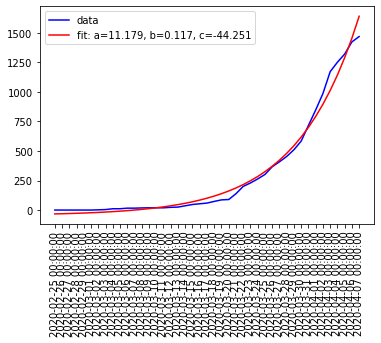

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

country = 'Algeria'
data = train_country.get_group(country)
data_start_pandemic = data[data['ConfirmedCases']>0]

counter = len(data_start_pandemic)
xdata = np.linspace(1, counter, counter)
ydata = data_start_pandemic['ConfirmedCases']

plt.plot(xdata, ydata, 'b-', label='data')
popt, pcov_ = curve_fit(exp_func, xdata, ydata)
plt.plot(xdata, exp_func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xticks(xdata, data_start_pandemic['Date'], rotation='vertical')

plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

country = 'Algeria'
data = train_country.get_group(country)
data_start_pandemic = data[data['ConfirmedCases']>0]

counter = len(data_start_pandemic)
xdata = np.linspace(1, counter, counter)
ydata = data_start_pandemic['ConfirmedCases']

plt.plot(xdata, ydata, 'b-', label='data')
popt, pcov_ = curve_fit(exp_func, xdata, ydata)
plt.plot(xdata, exp_func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xticks(xdata, data_start_pandemic['Date'], rotation='vertical')

plt.legend()
plt.show()

0.6808095431881995


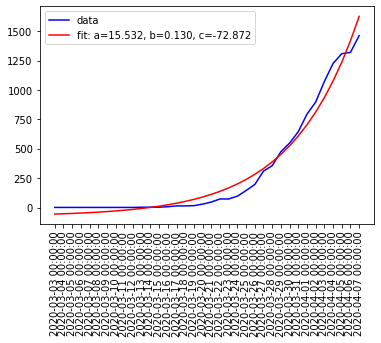

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_log_error

def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

country = 'Ukraine'
data = train_country.get_group(country)
data_start_pandemic = data[data['ConfirmedCases']>0]

counter = len(data_start_pandemic)
xdata = np.linspace(1, counter, counter)
ydata = data_start_pandemic['ConfirmedCases']

plt.plot(xdata, ydata, 'b-', label='data')
popt, pcov_ = curve_fit(exp_func, xdata, ydata)
plt.plot(xdata, exp_func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xticks(xdata, data_start_pandemic['Date'], rotation='vertical')

start = 12
print(np.sqrt(mean_squared_log_error(ydata[start:], exp_func(xdata, *popt)[start:])))

plt.legend()
plt.show()

TypeError: not enough arguments for format string

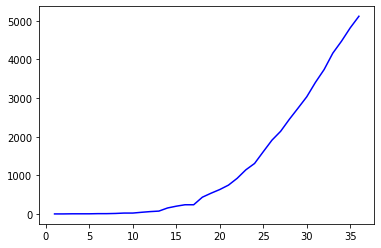

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_log_error

def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

country = 'Chile'
data = train_country.get_group(country)
data_start_pandemic = data[data['ConfirmedCases']>0]

counter = len(data_start_pandemic)
xdata = np.linspace(1, counter, counter)
ydata = data_start_pandemic['ConfirmedCases']

plt.plot(xdata, ydata, 'b-', label='data')
popt, pcov_ = curve_fit(linear_func, xdata, ydata)
plt.plot(xdata, linear_func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xticks(xdata, data_start_pandemic['Date'], rotation='vertical')

start = 15
print(np.sqrt(mean_squared_log_error(ydata[start:], exp_func(xdata, *popt)[start:])))

plt.legend()
plt.show()

TypeError: exp_func() missing 1 required positional argument: 'c'

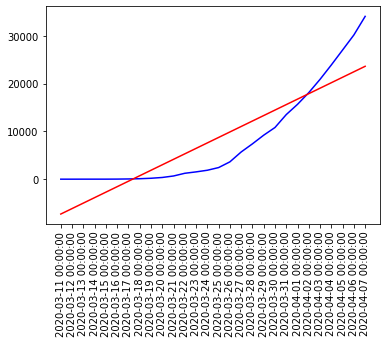

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_log_error

def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

country = 'Turkey'
data = train_country.get_group(country)
data_start_pandemic = data[data['ConfirmedCases']>0]

counter = len(data_start_pandemic)
xdata = np.linspace(1, counter, counter)
ydata = data_start_pandemic['ConfirmedCases']

plt.plot(xdata, ydata, 'b-', label='data')
popt, pcov_ = curve_fit(linear_func, xdata, ydata)
plt.plot(xdata, linear_func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.xticks(xdata, data_start_pandemic['Date'], rotation='vertical')

start = 15
print(np.sqrt(mean_squared_log_error(ydata[start:], exp_func(xdata, *popt)[start:])))

plt.legend()
plt.show()

In [77]:
popt

array([7.11230769, 2.82      ])

1.6417797521631194


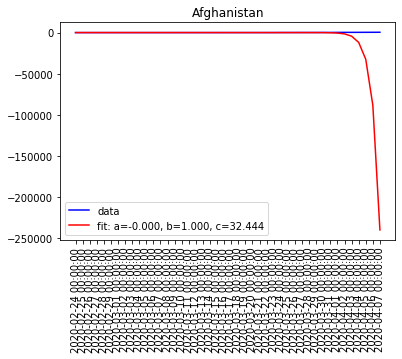

0.8650653524165038


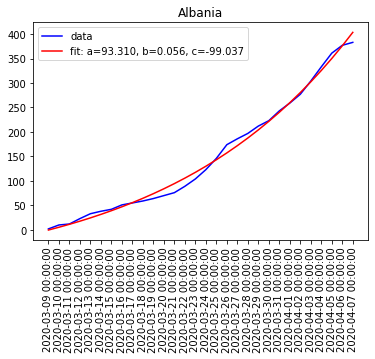

0.29172333871583206


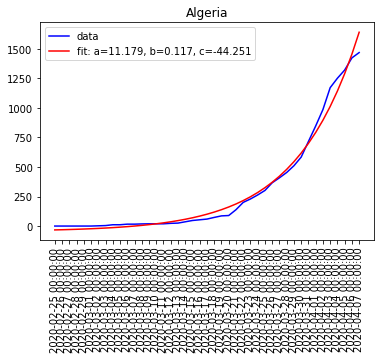

0.25182941743410747


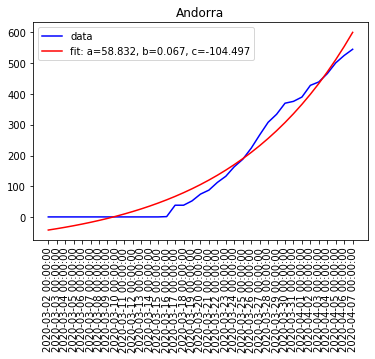

1.036352327722999


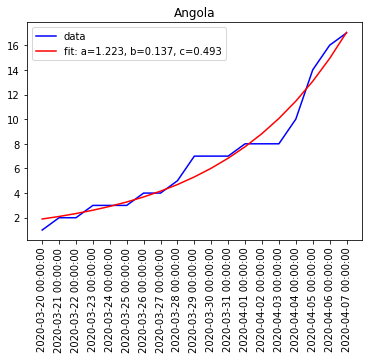

1.986592262481815


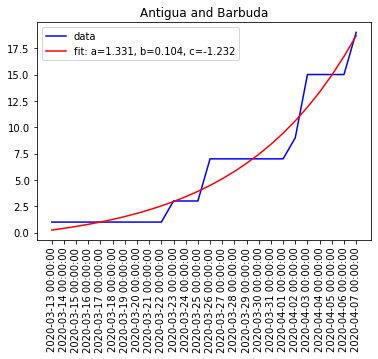

1.1440900504931206


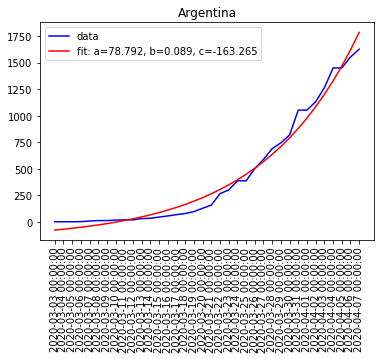

0.48165747726441627


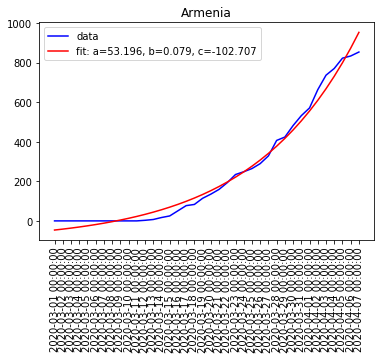

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:754: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


27.871441250490722


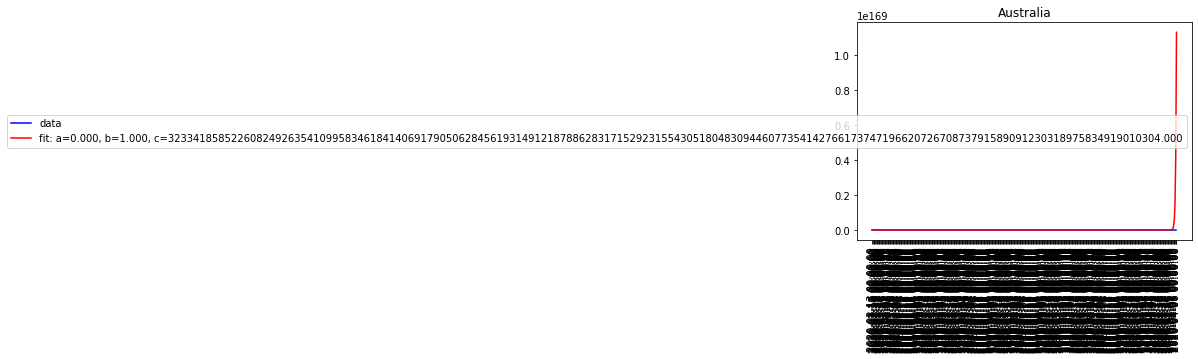

2.5766250318836783


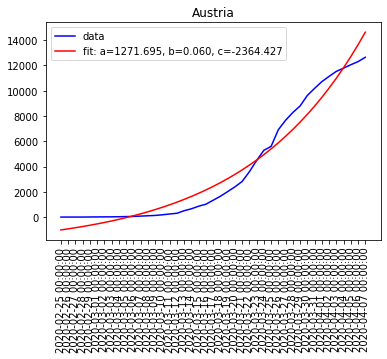

0.33533945801628107


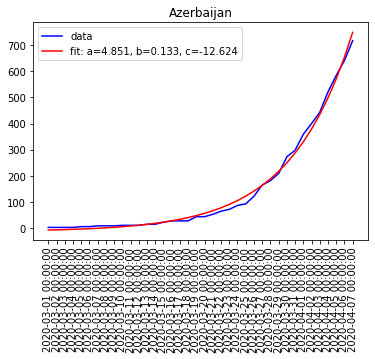

0.9360419960633488


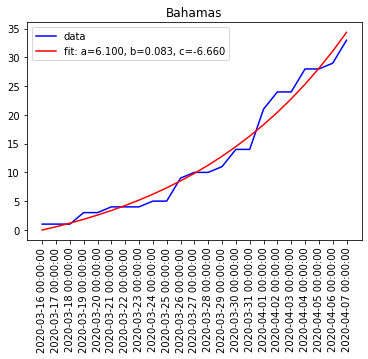

0.7240361242183977


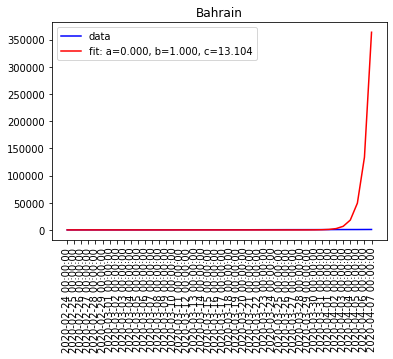

0.8524966583869522


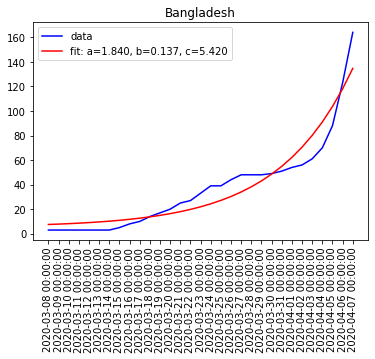

0.2653949074516135


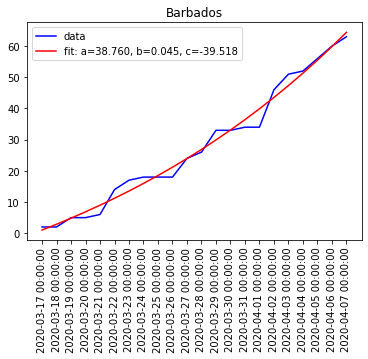

0.7672329550361892


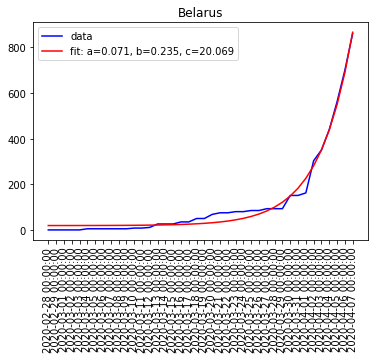

2.0908948978960127


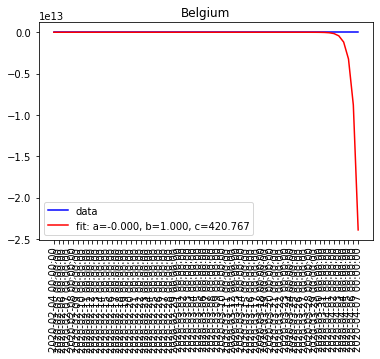

1.2876743683074667


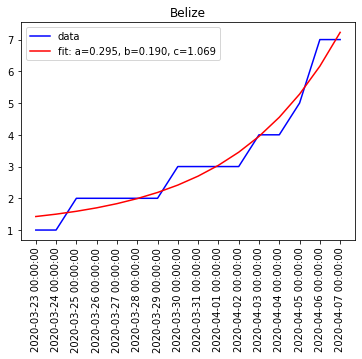

1.2762487558345783


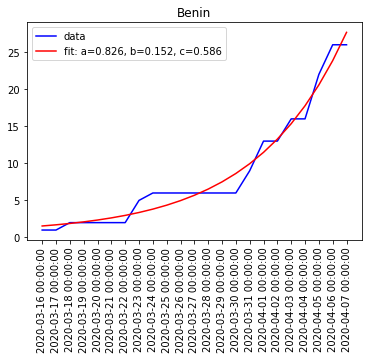

3.5077939303827166


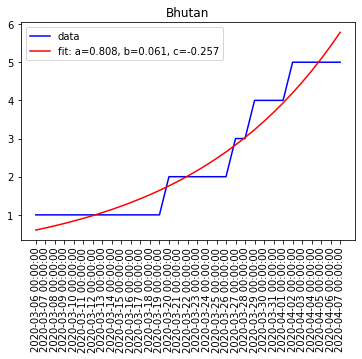

0.28153754233904044


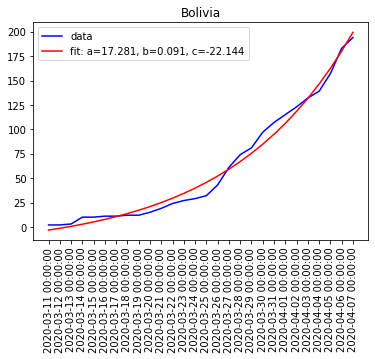

0.7019563870210382


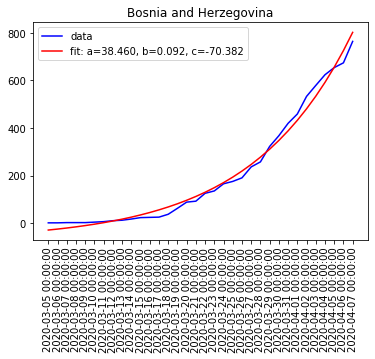

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

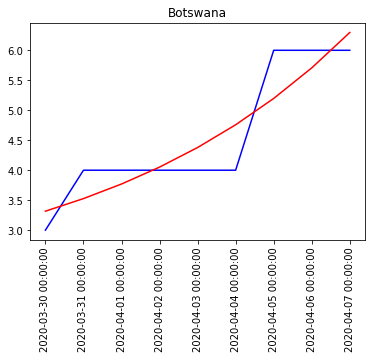

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_log_error

def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

for i,j in train_country:
    country = i
    data = train_country.get_group(country)
    data_start_pandemic = data[data['ConfirmedCases']>0]

    counter = len(data_start_pandemic)
    xdata = np.linspace(1, counter, counter)
    ydata = data_start_pandemic['ConfirmedCases']

    plt.plot(xdata, ydata, 'b-', label='data')
    popt, pcov_ = curve_fit(exp_func, xdata, ydata)
    plt.plot(xdata, exp_func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    plt.xticks(xdata, data_start_pandemic['Date'], rotation='vertical')
    plt.title(i)
    
    start = 15
    print(np.sqrt(mean_squared_log_error(ydata[start:], exp_func(xdata, *popt_)[start:])))

    plt.legend()
    plt.show()



Text(0.5, 1.0, 'Algeria Cases')

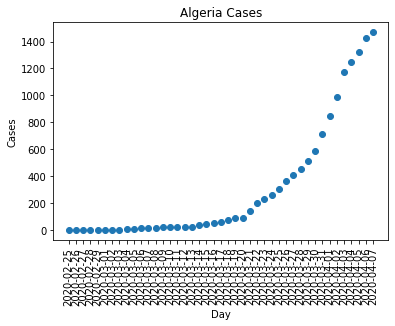

In [60]:
import matplotlib.pyplot as plt
country = 'Algeria'
data = train_country.get_group(country)
data_start_pandemic = data[data['ConfirmedCases']>0]

plt.plot_date(data_start_pandemic['Date'],data_start_pandemic['ConfirmedCases'])
plt.xlabel('Day')
plt.xticks(data_start_pandemic['Date'], rotation='vertical')
plt.ylabel('Cases')
plt.title(country + ' Cases')

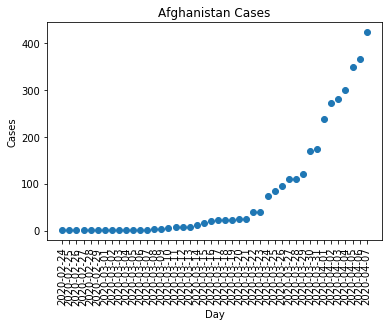

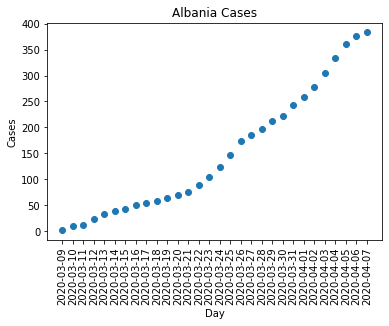

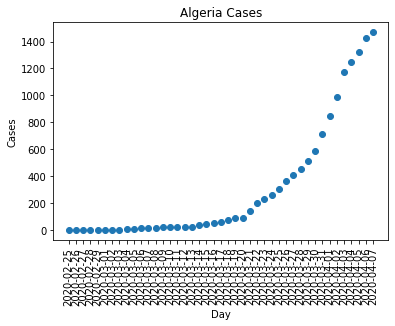

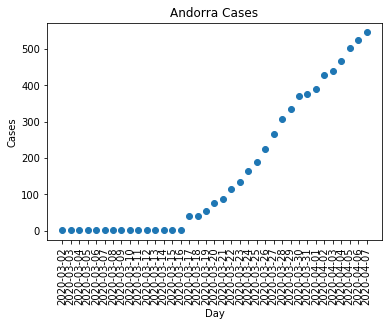

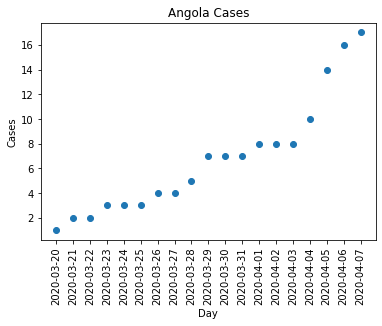

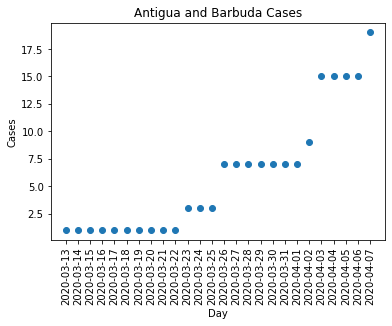

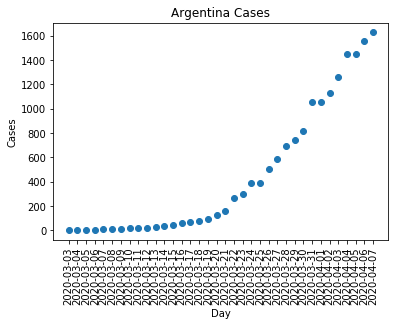

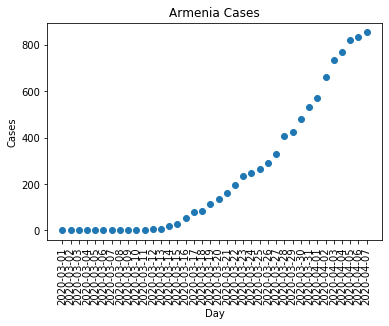

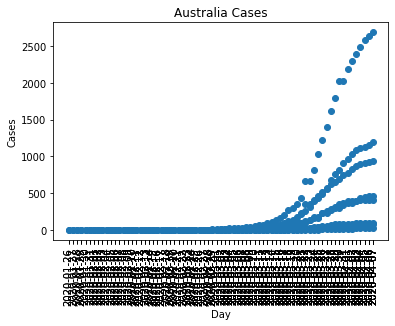

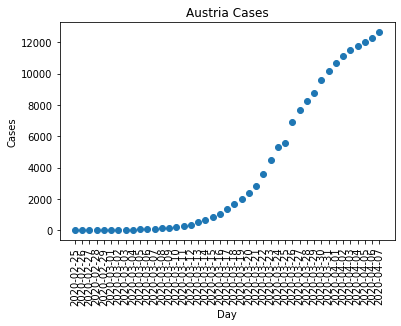

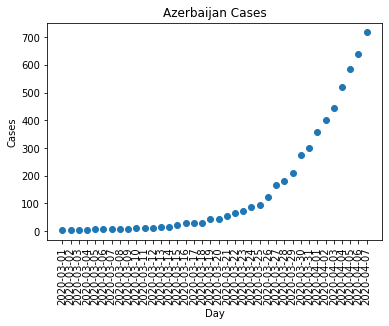

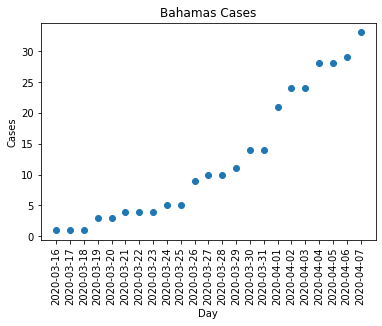

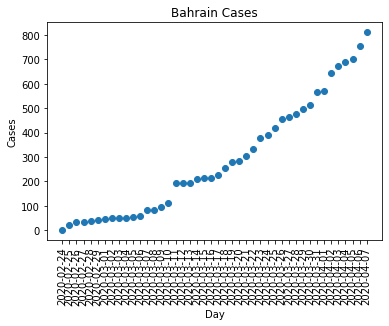

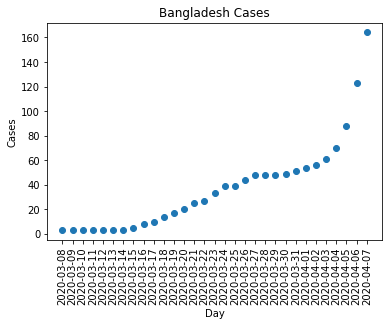

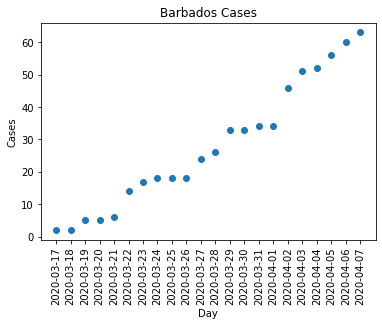

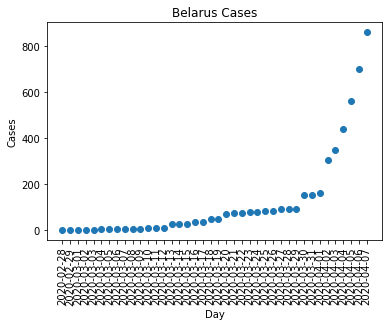

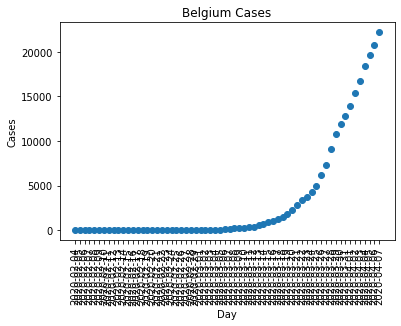

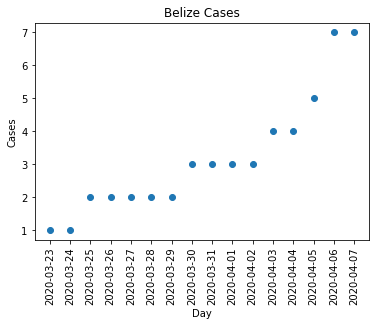

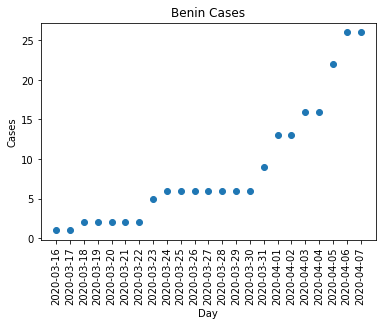

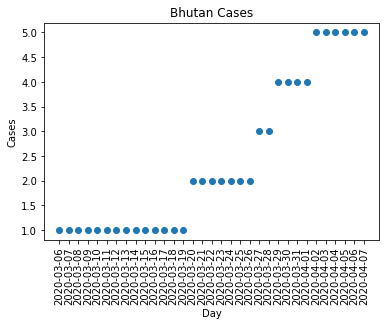

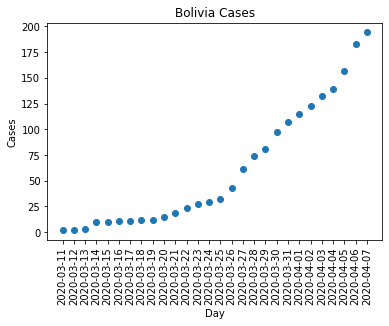

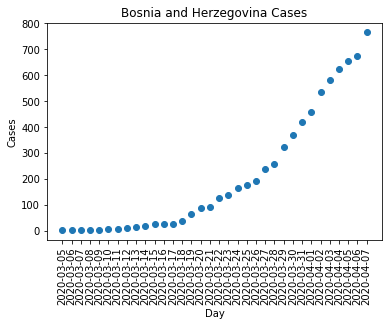

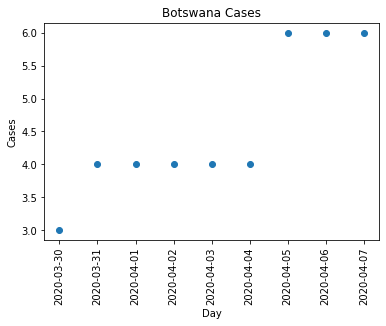

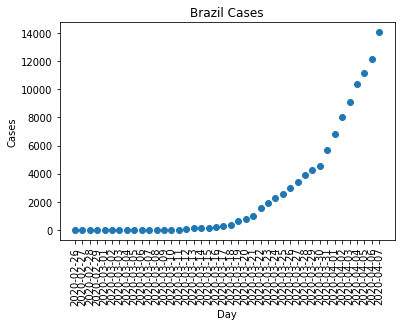

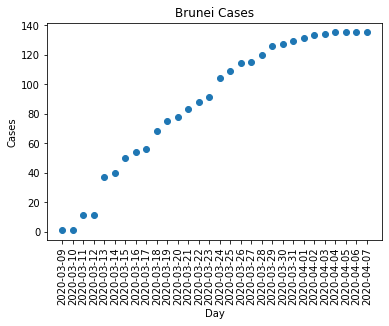

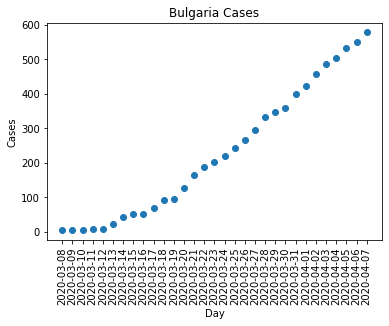

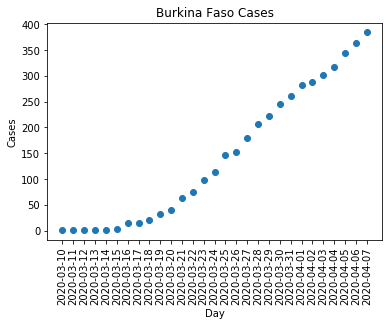

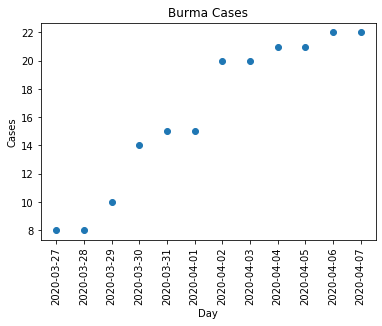

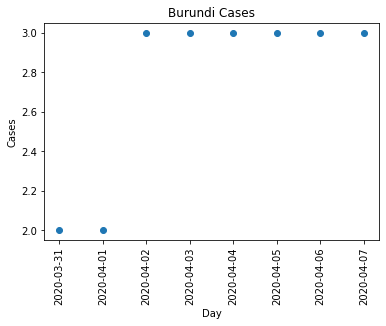

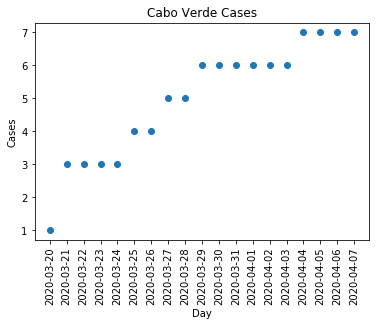

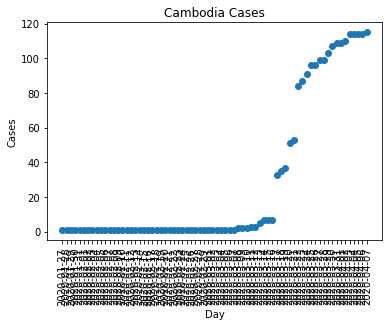

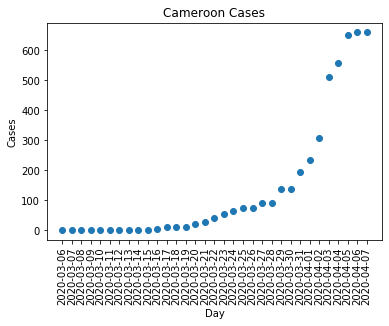

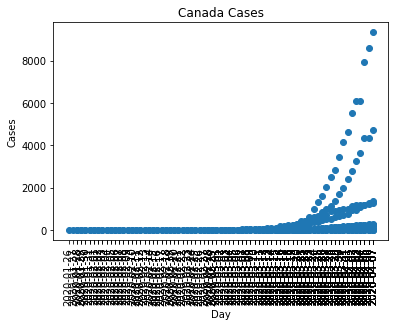

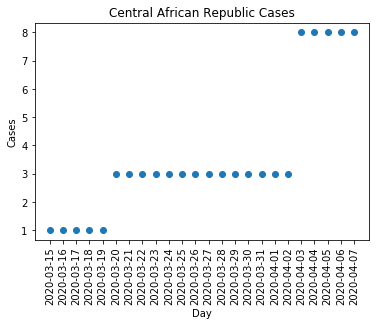

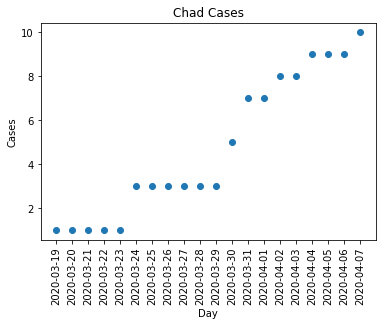

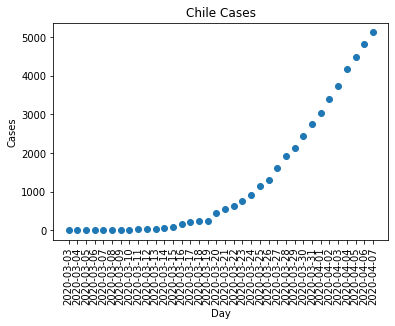

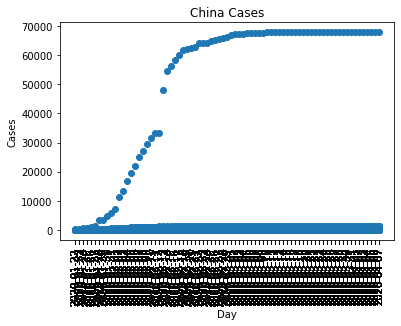

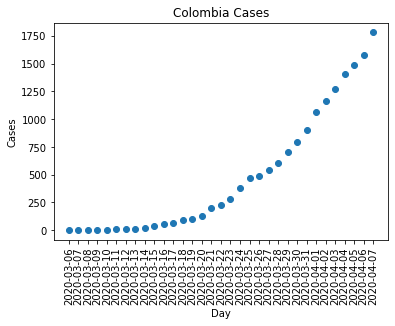

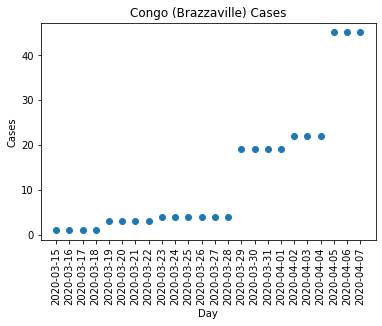

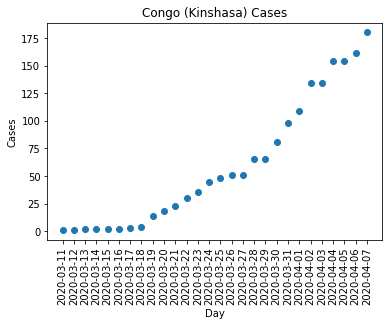

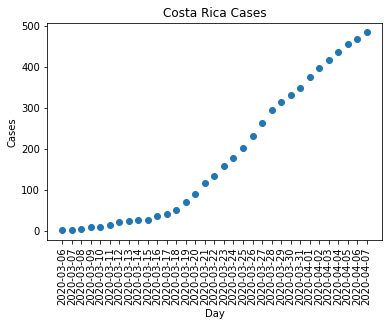

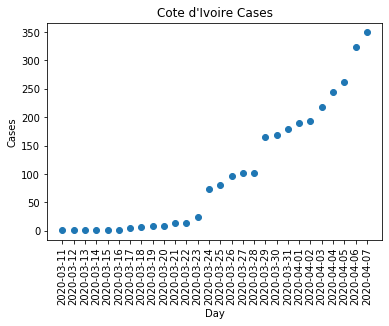

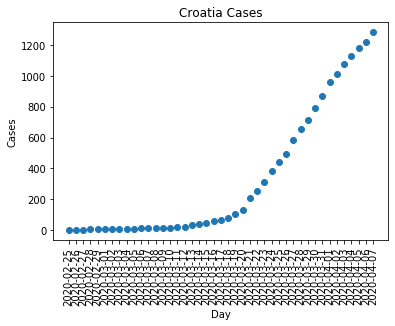

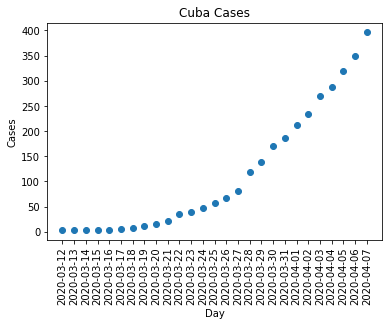

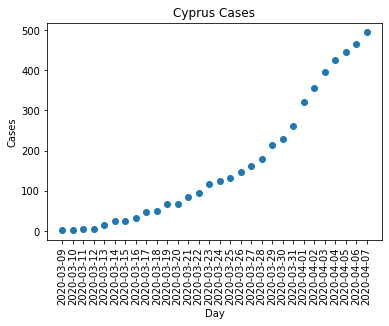

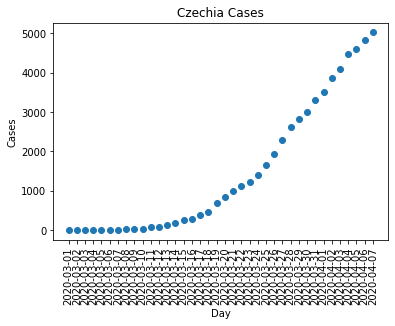

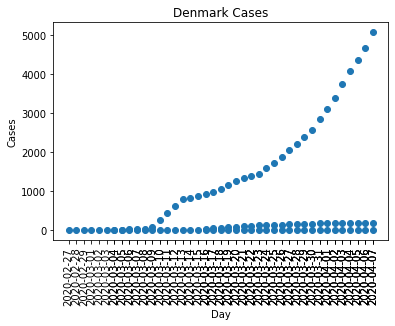

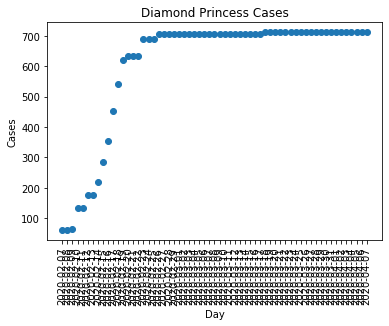

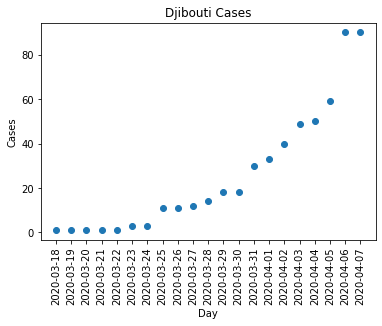

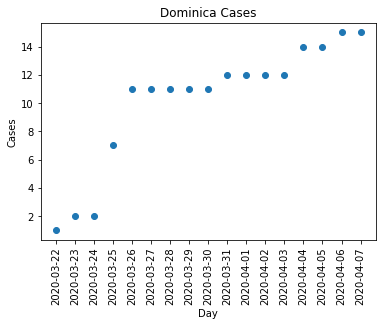

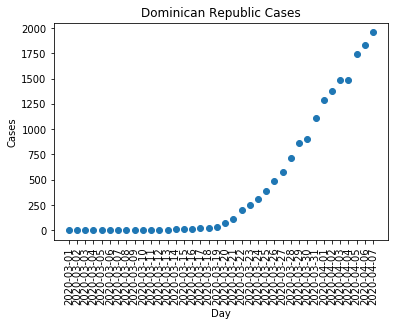

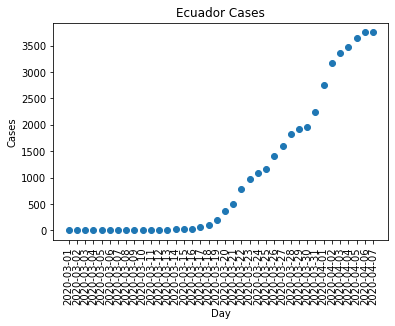

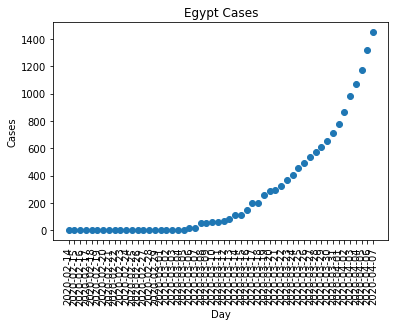

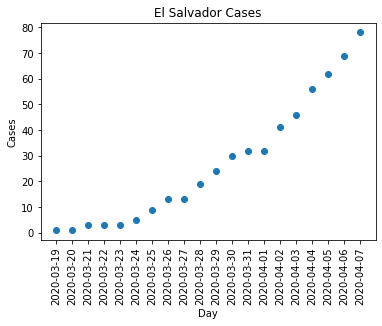

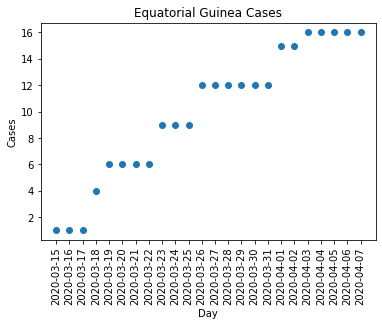

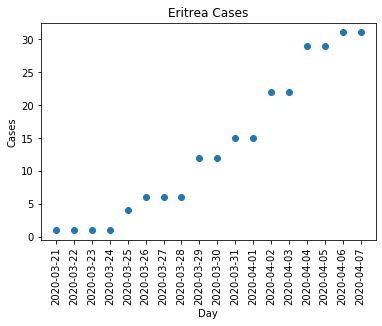

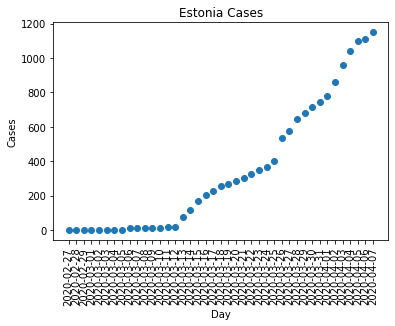

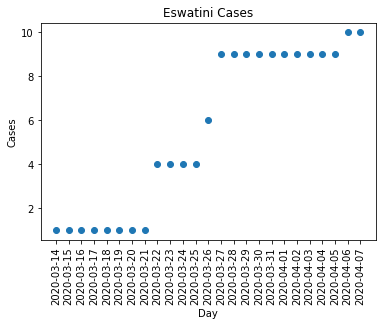

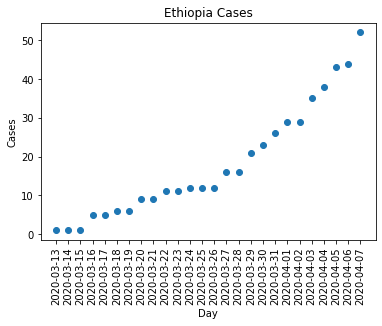

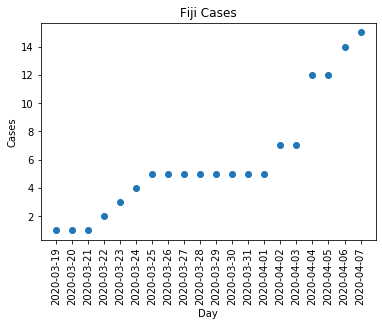

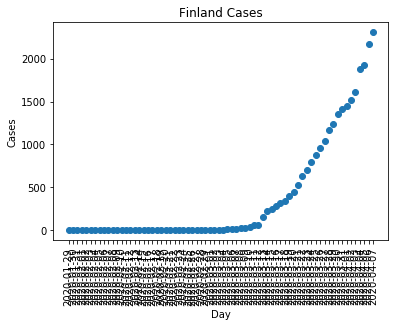

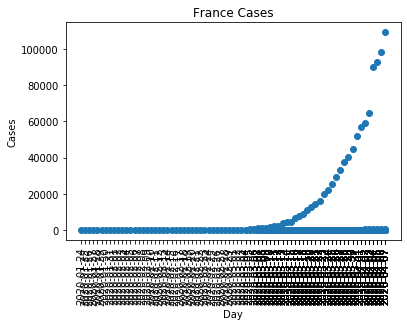

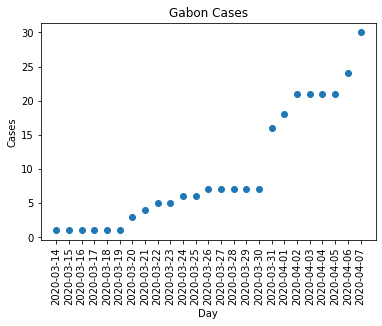

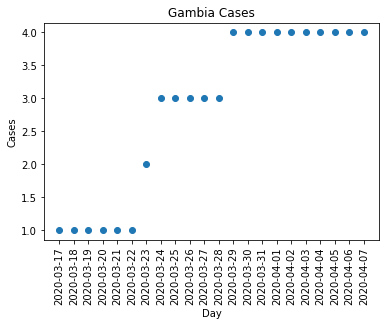

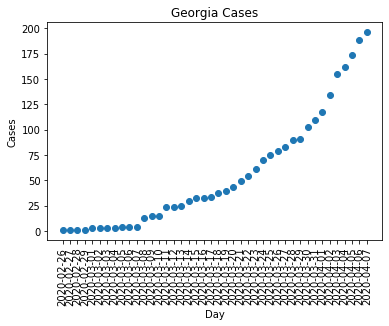

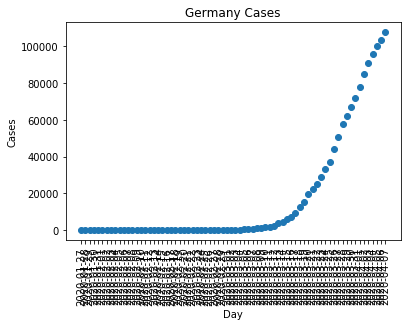

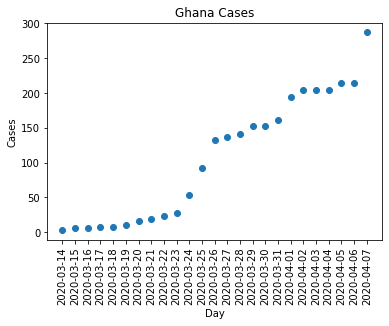

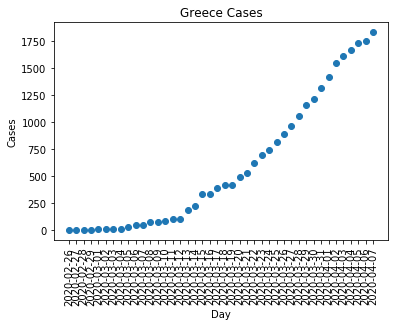

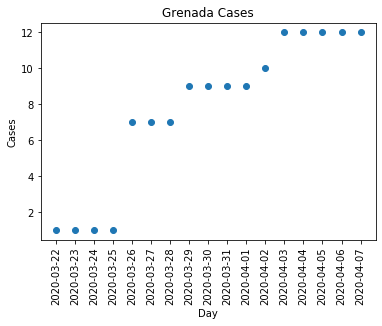

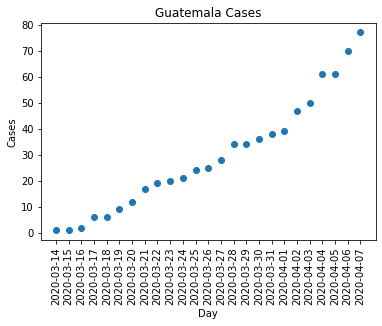

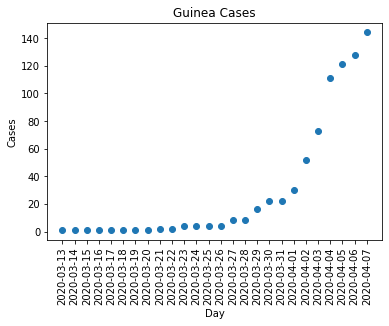

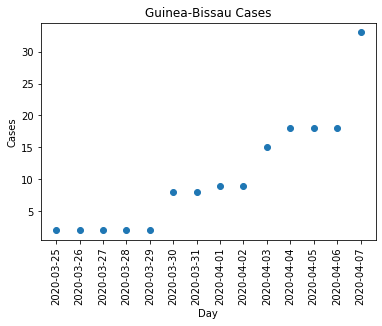

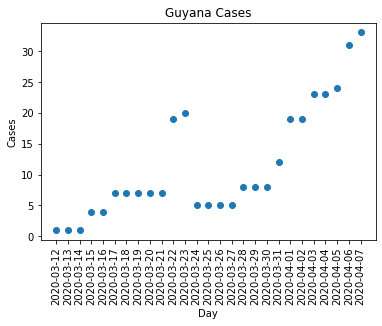

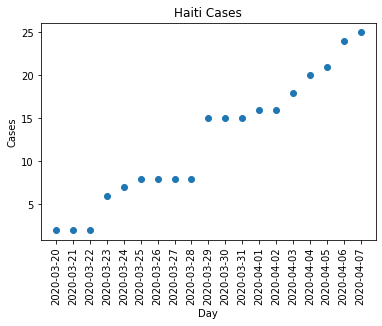

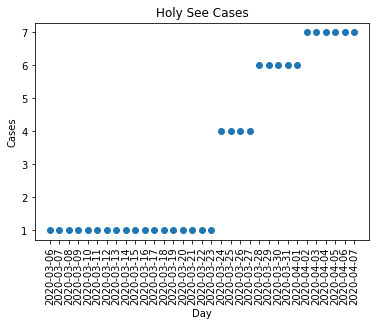

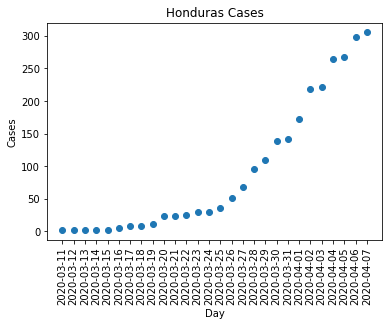

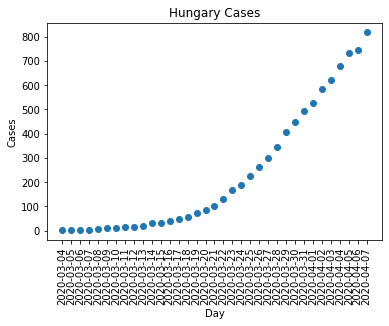

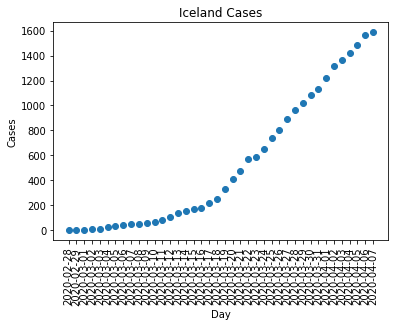

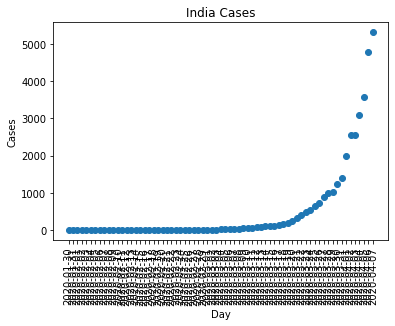

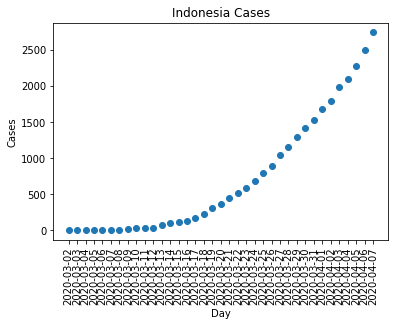

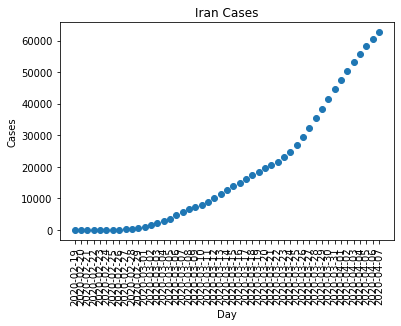

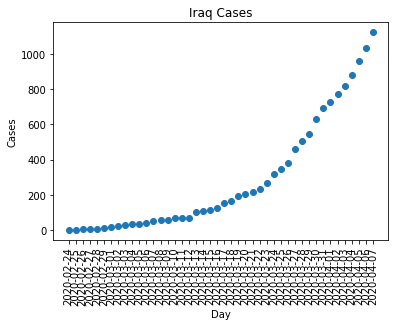

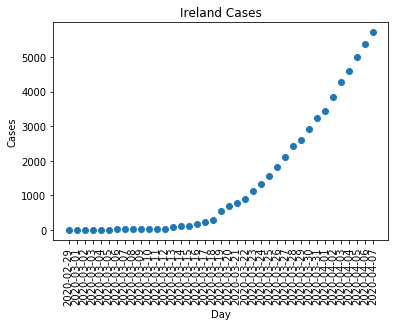

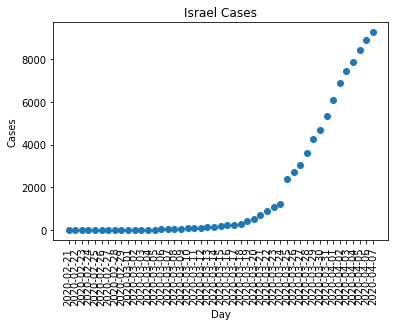

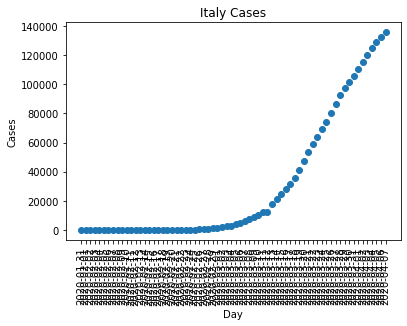

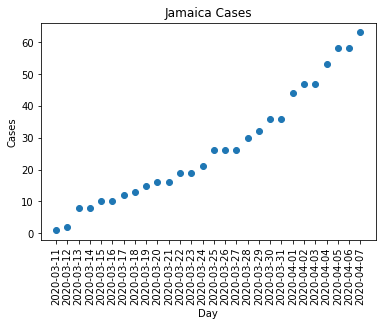

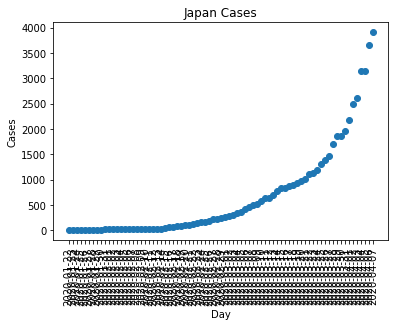

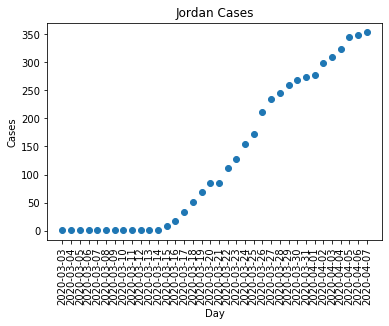

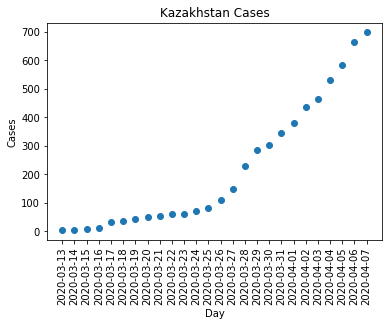

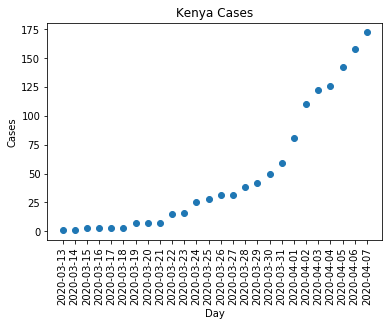

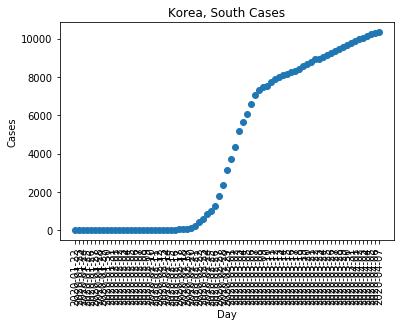

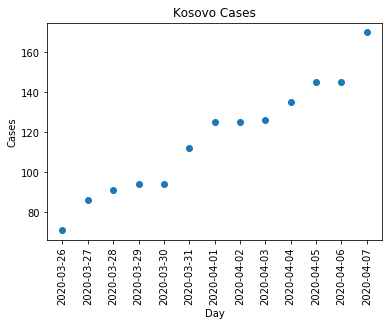

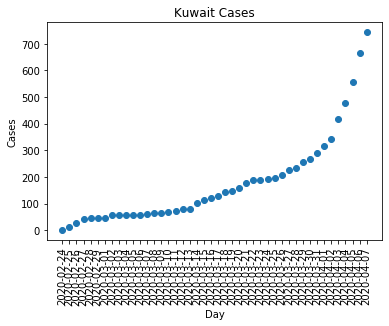

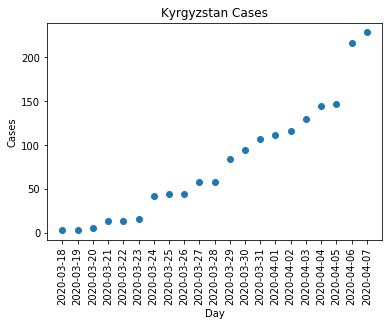

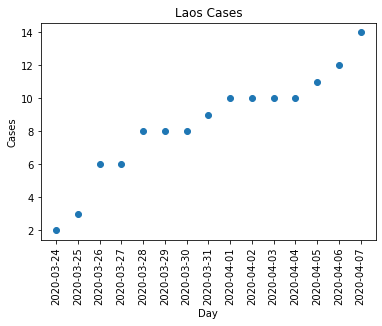

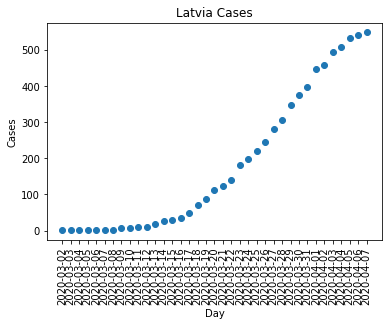

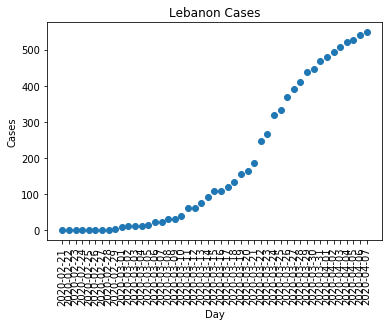

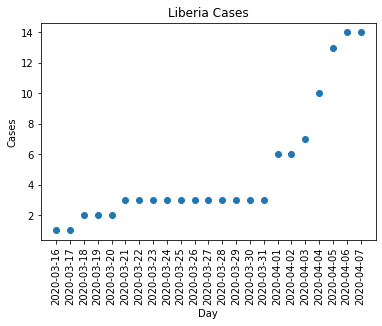

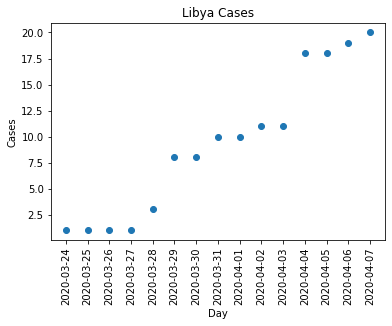

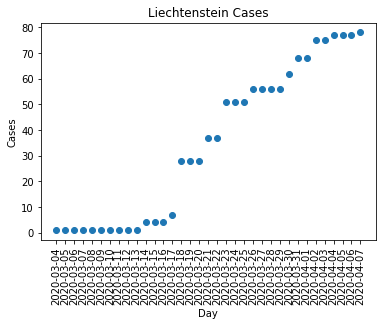

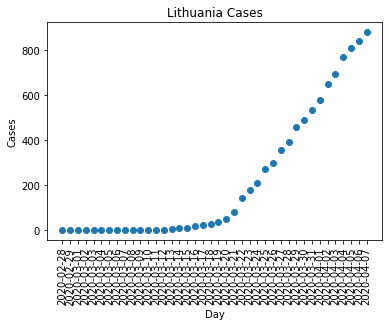

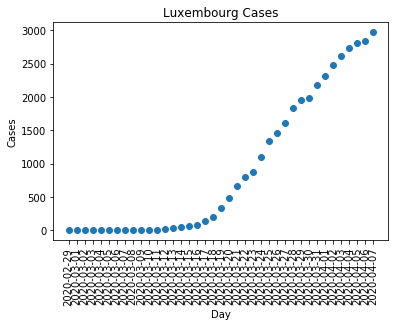

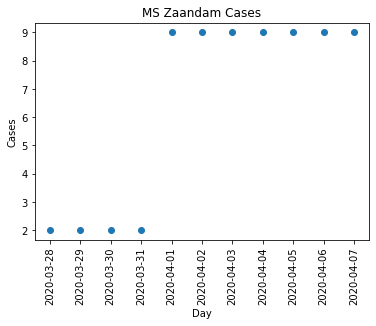

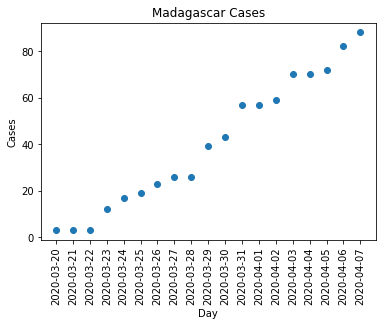

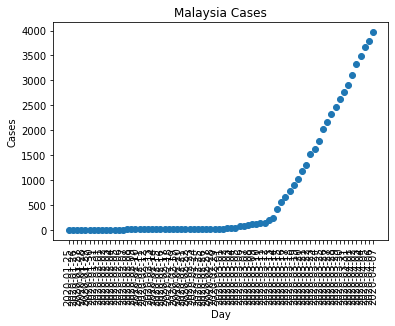

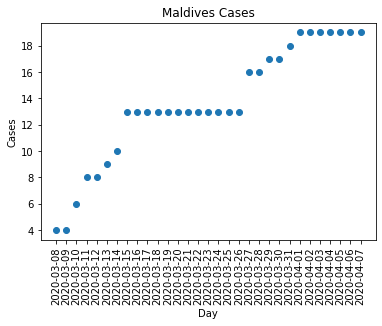

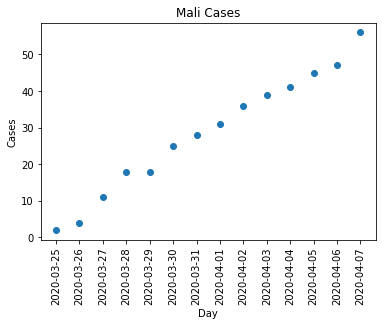

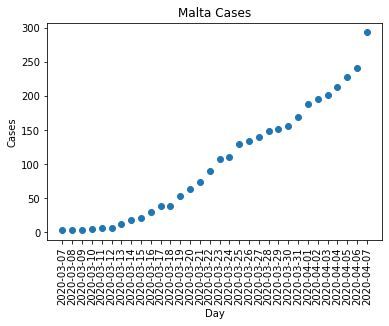

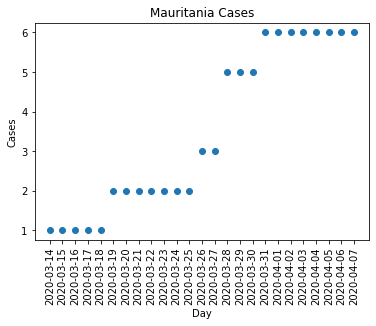

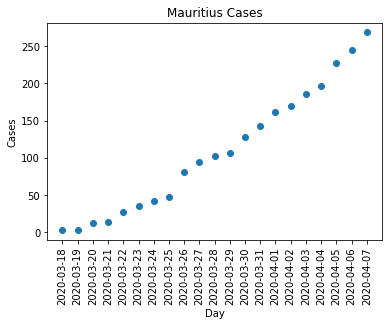

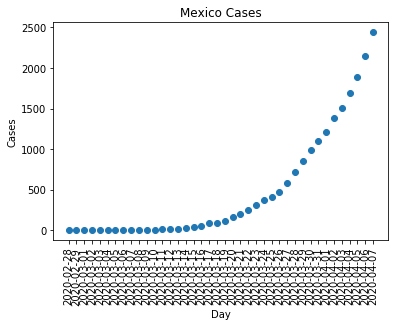

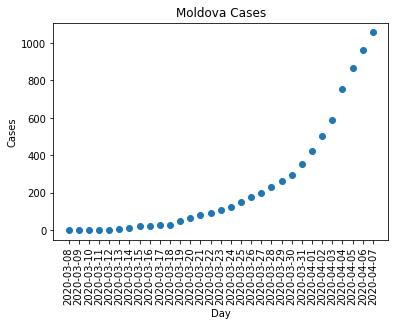

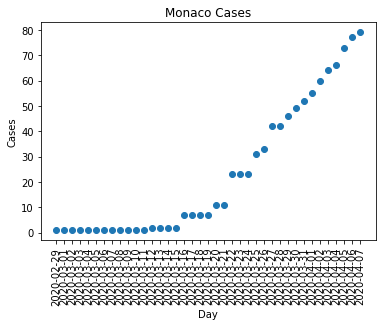

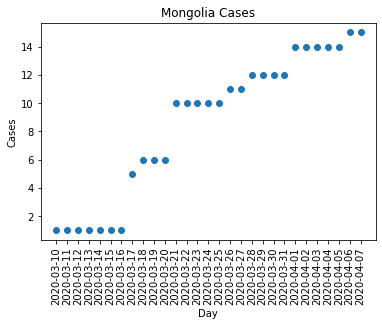

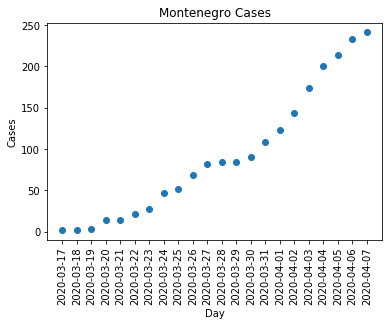

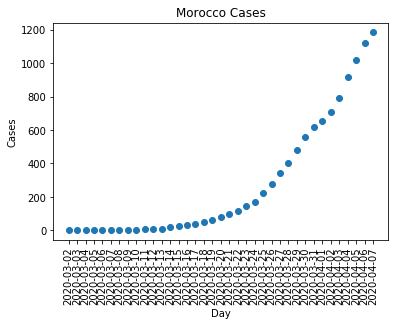

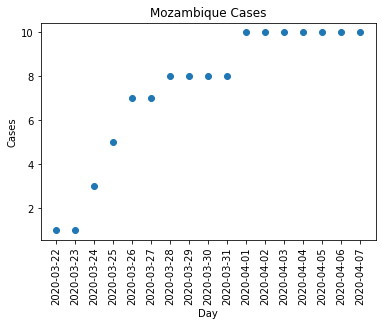

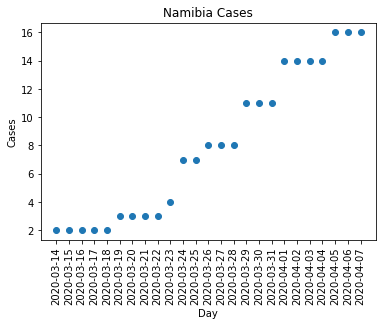

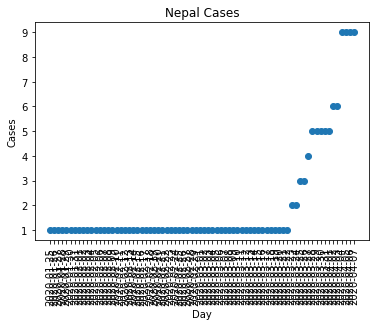

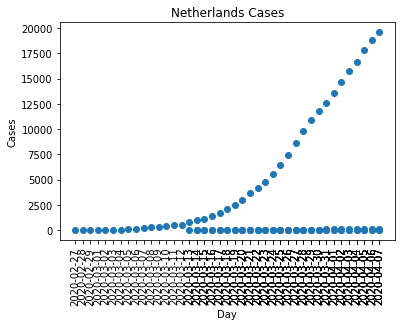

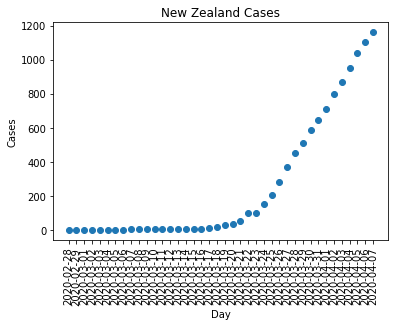

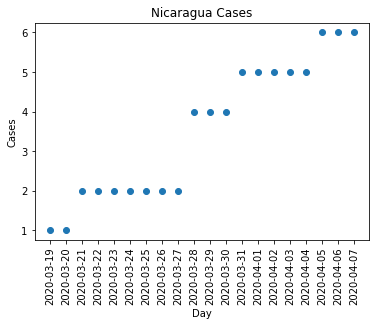

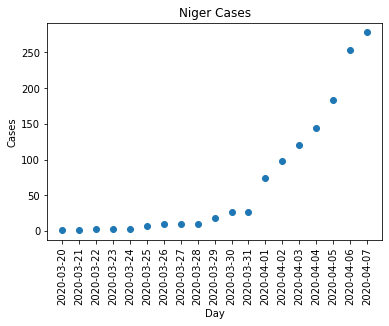

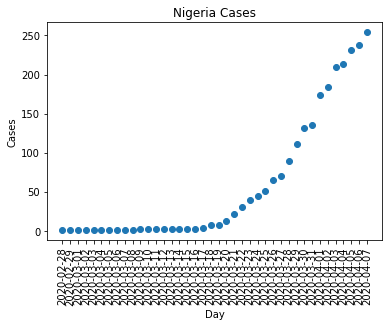

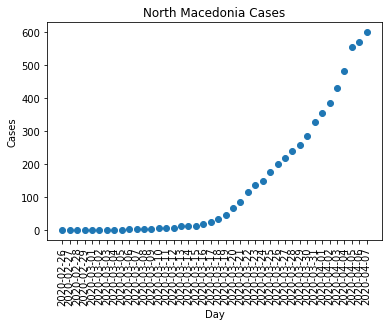

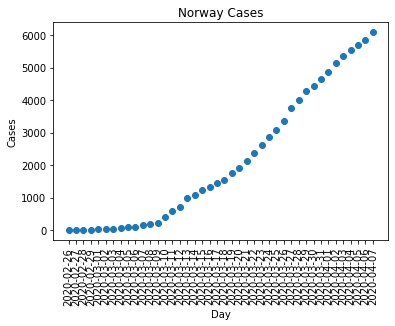

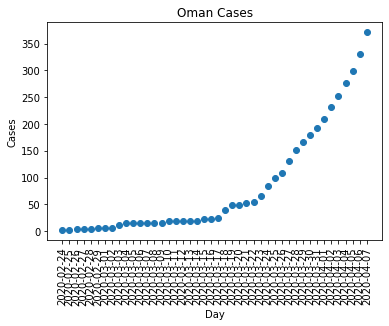

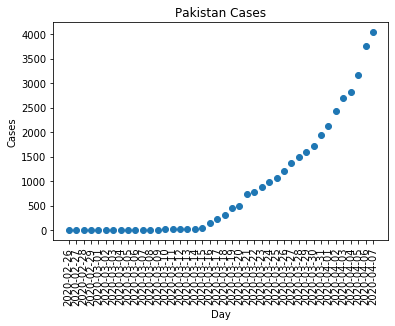

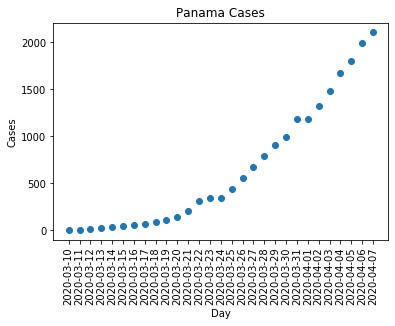

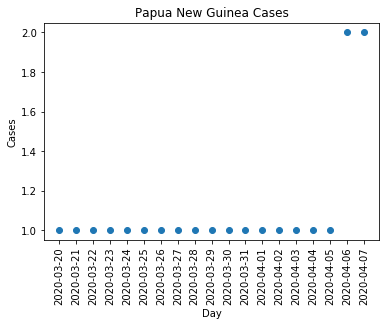

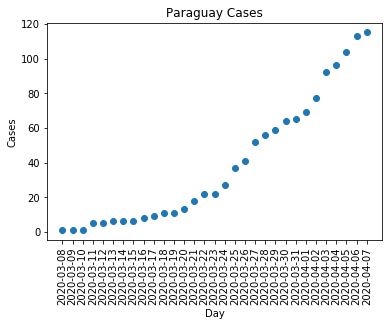

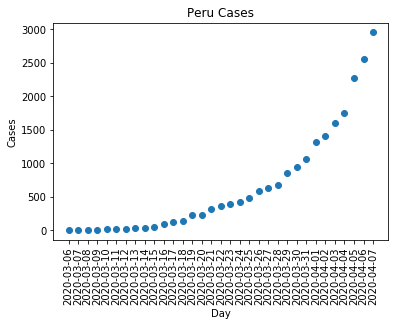

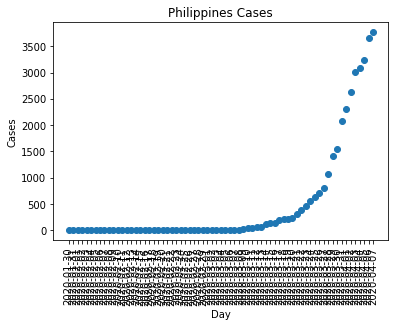

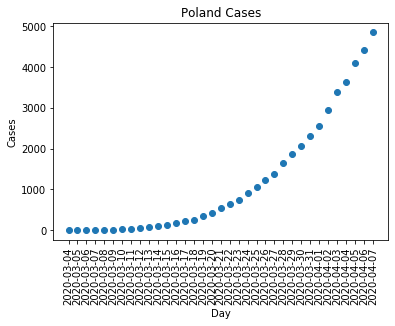

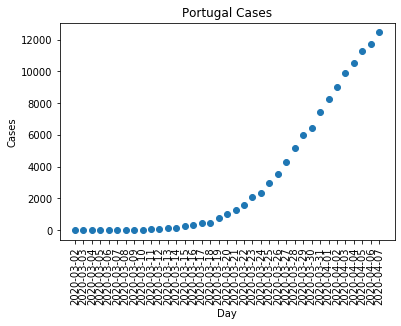

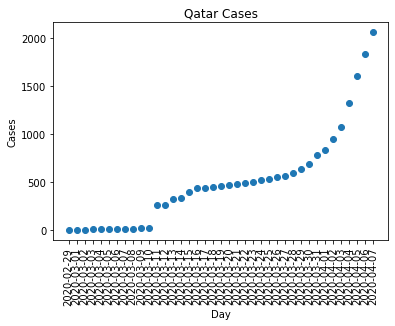

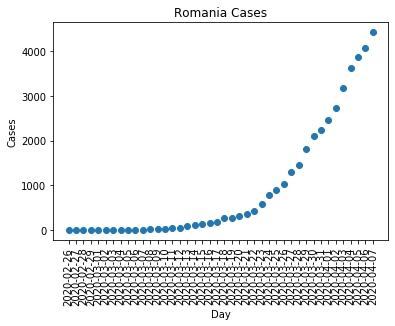

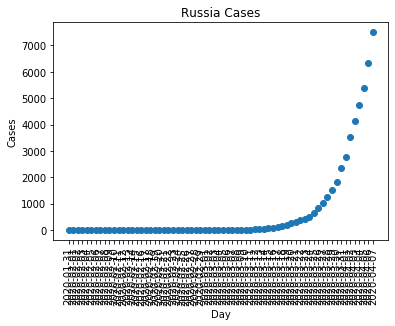

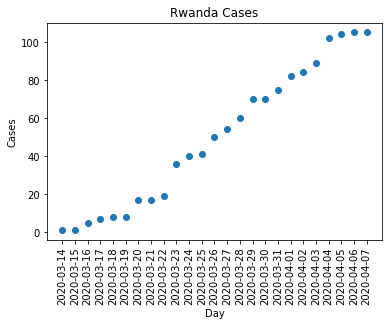

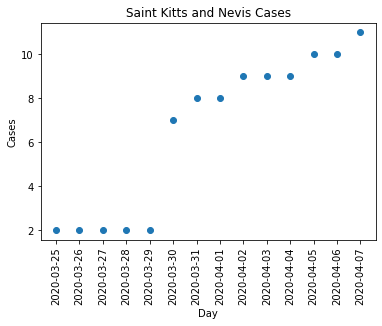

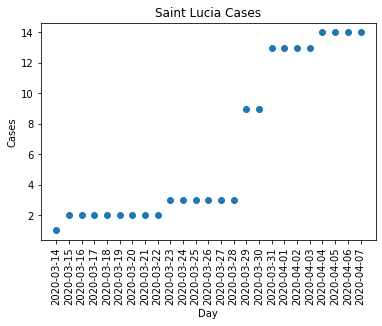

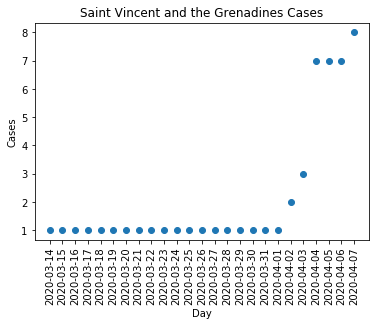

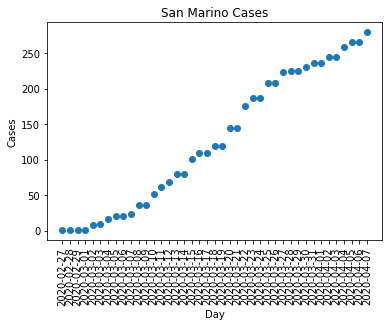

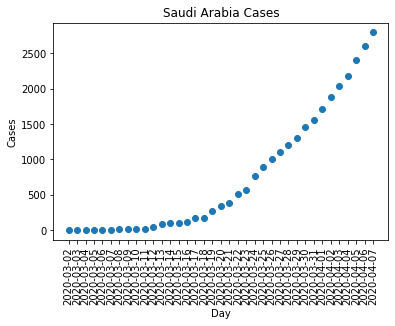

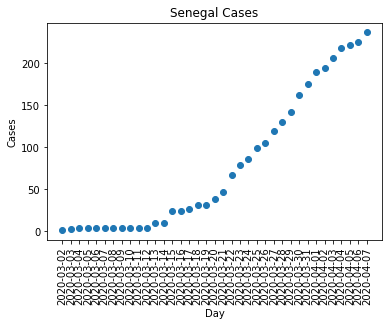

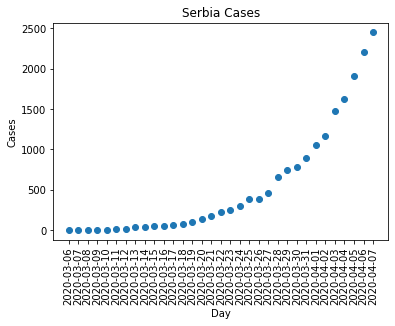

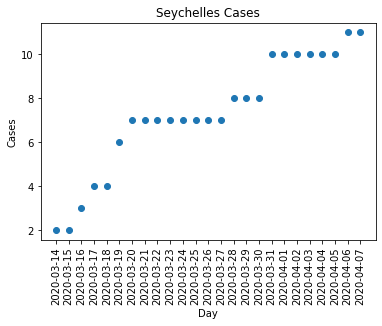

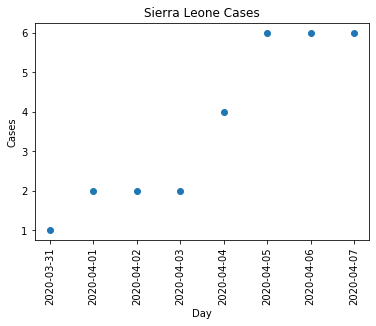

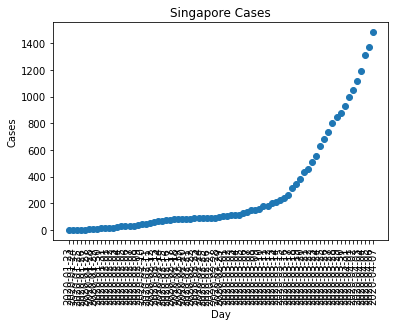

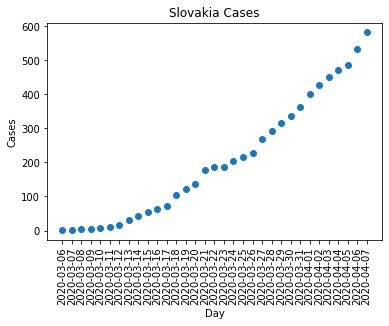

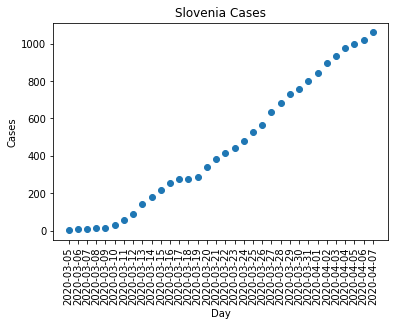

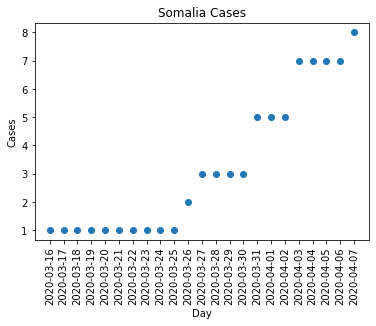

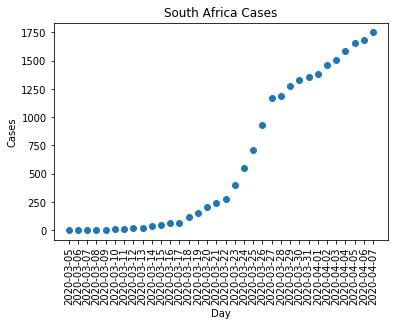

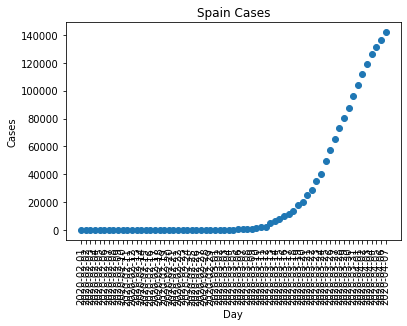

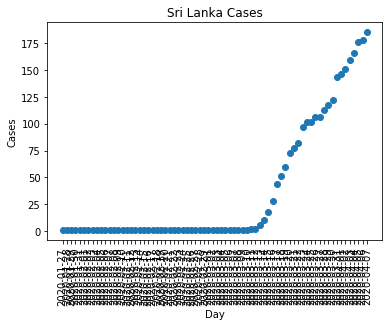

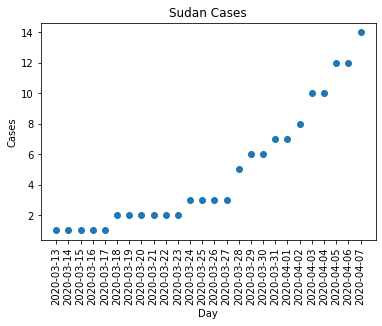

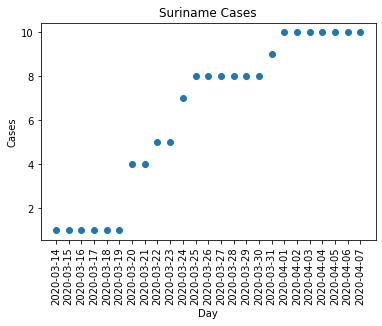

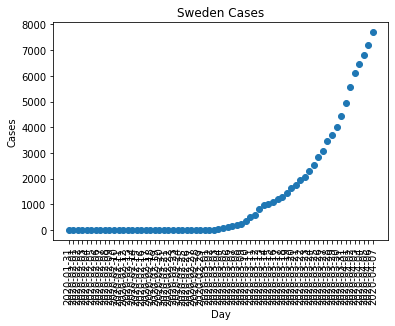

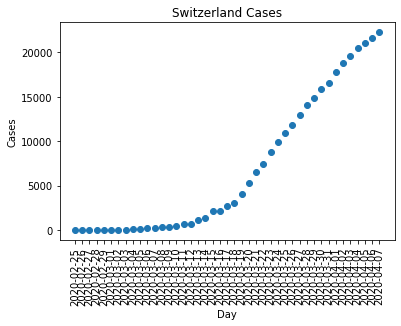

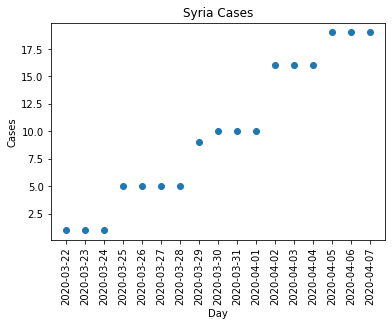

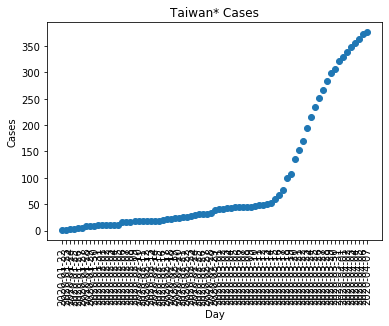

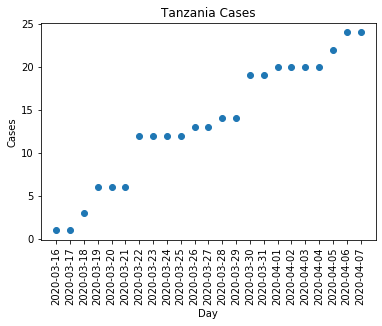

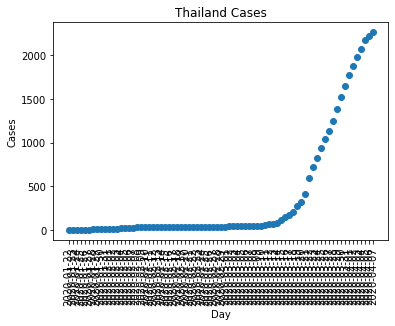

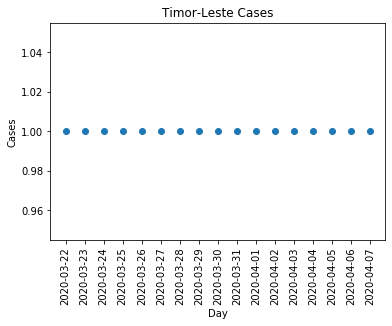

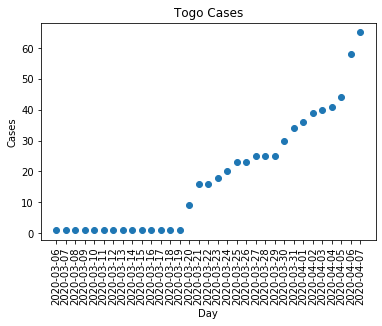

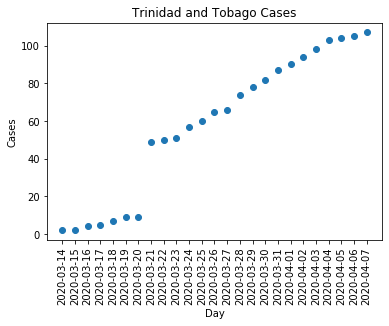

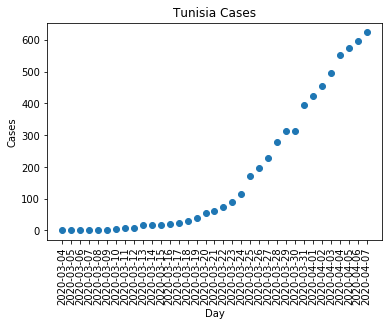

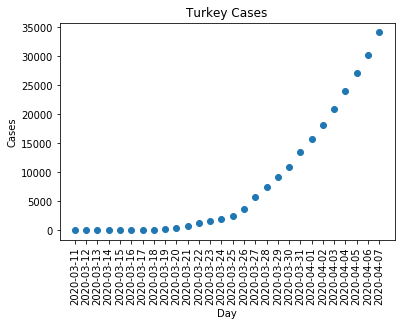

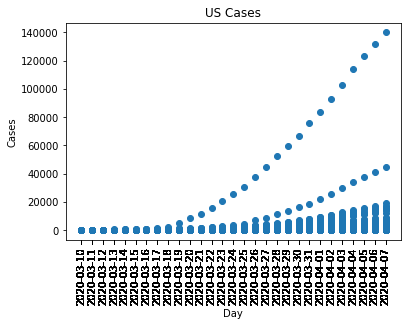

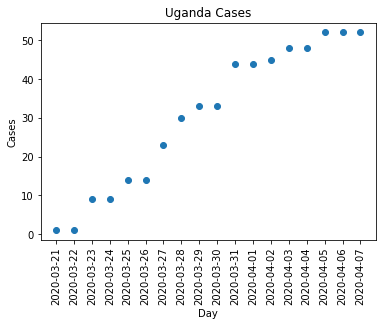

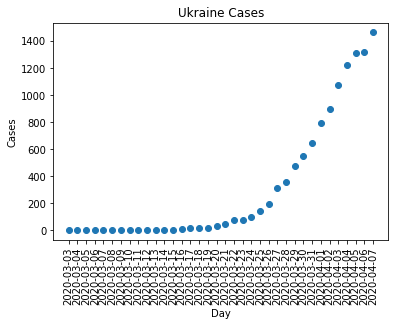

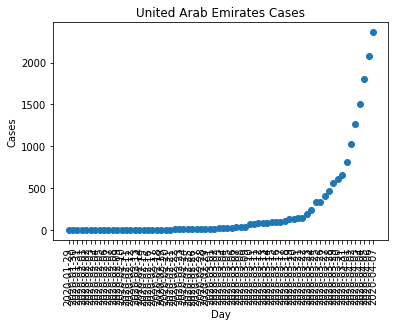

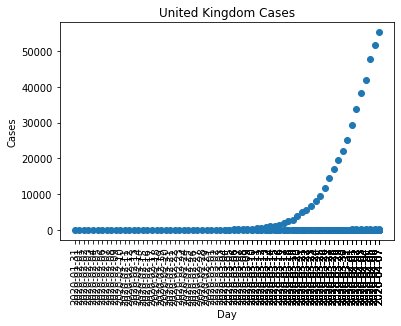

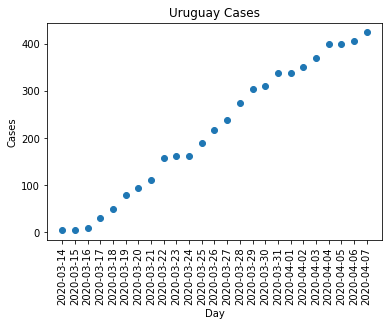

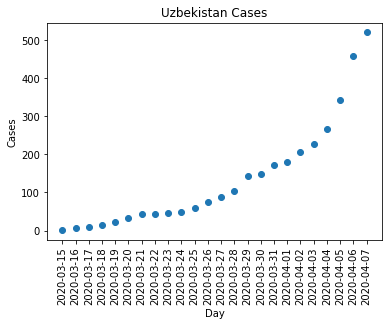

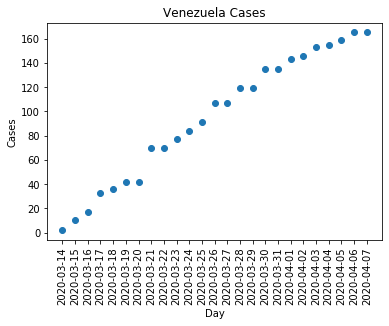

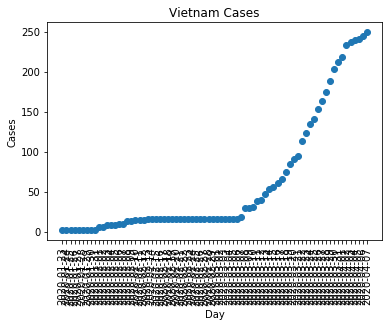

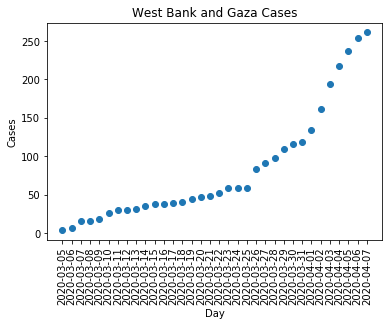

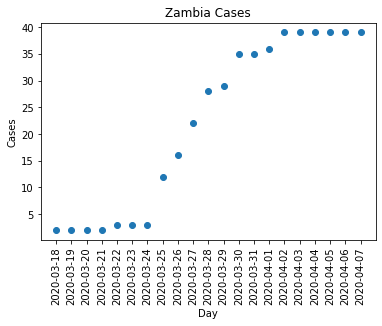

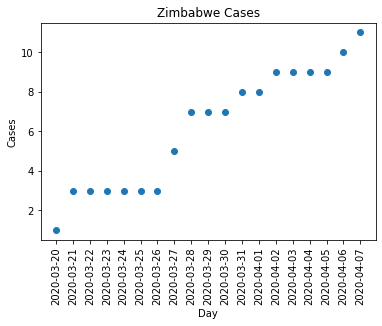

In [28]:
import matplotlib.pyplot as plt
for i,j in train_country:
    country = i
    data = train_country.get_group(country)
    data_start_pandemic = data[data['ConfirmedCases']>0]

    plt.plot_date(data_start_pandemic['Date'],data_start_pandemic['ConfirmedCases'])
    plt.xlabel('Day')
    plt.xticks(data_start_pandemic['Date'], rotation='vertical')
    plt.ylabel('Cases')
    plt.title(country + ' Cases')
    plt.show()

In [29]:
data['Date'][data_start_pandemic['Date'].head(1).index[0]], len(str(data_start_pandemic['Date'].head(1)))

(Timestamp('2020-03-20 00:00:00'), 52)

In [30]:
# str(data_start_pandemic['Date'].head(1)): '124    2020-03-09\nName: Date, dtype: object'

In [31]:
data_country_pandemic = pd.DataFrame()
for i,j in train_country:
    data = train_country.get_group(i)
    data_start_pandemic = data[data['ConfirmedCases']>0]
    data_country_pandemic[i] = [len(train_country.get_group(i)), len(str(data_start_pandemic['Date'].head(1))), data['Date'][data_start_pandemic['Date'].head(1).index[0]]]
    # i : Country
data_country_pandemic
data_info = data_country_pandemic.transpose()
data_info.columns = ['Case Number','Pandemic Cases','Date']
data_info

Case Number Pandemic Cases       Date
Afghanistan                 77             49 2020-02-24
Albania                     77             50 2020-03-09
Algeria                     77             50 2020-02-25
Andorra                     77             50 2020-03-02
Angola                      77             50 2020-03-20
...                        ...            ...        ...
Venezuela                   77             52 2020-03-14
Vietnam                     77             52 2020-01-23
West Bank and Gaza          77             52 2020-03-05
Zambia                      77             52 2020-03-18
Zimbabwe                    77             52 2020-03-20

[180 rows x 3 columns]

In [32]:
train_country.get_group('US')

Id Province_State       Date  ConfirmedCases  Fatalities
17864  24825        Alabama 2020-01-22             0.0         0.0
17865  24826        Alabama 2020-01-23             0.0         0.0
17866  24827        Alabama 2020-01-24             0.0         0.0
17867  24828        Alabama 2020-01-25             0.0         0.0
17868  24829        Alabama 2020-01-26             0.0         0.0
...      ...            ...        ...             ...         ...
22017  30568        Wyoming 2020-04-03           162.0         0.0
22018  30569        Wyoming 2020-04-04           187.0         0.0
22019  30570        Wyoming 2020-04-05           197.0         0.0
22020  30571        Wyoming 2020-04-06           210.0         0.0
22021  30572        Wyoming 2020-04-07           216.0         0.0

[4158 rows x 5 columns]

In [33]:
test_UK = train_country.get_group('United Kingdom')
test_UK.fillna(0)
test_UK

Id Province_State       Date  ConfirmedCases  Fatalities
22253  30924       Anguilla 2020-01-22             0.0         0.0
22254  30925       Anguilla 2020-01-23             0.0         0.0
22255  30926       Anguilla 2020-01-24             0.0         0.0
22256  30927       Anguilla 2020-01-25             0.0         0.0
22257  30928       Anguilla 2020-01-26             0.0         0.0
...      ...            ...        ...             ...         ...
23018  31959            NaN 2020-04-03         38168.0      3605.0
23019  31960            NaN 2020-04-04         41903.0      4313.0
23020  31961            NaN 2020-04-05         47806.0      4934.0
23021  31962            NaN 2020-04-06         51608.0      5373.0
23022  31963            NaN 2020-04-07         55242.0      6159.0

[770 rows x 5 columns]

In [34]:
train_country.get_group('Netherlands')

Id Province_State       Date  ConfirmedCases  Fatalities
13860  19261          Aruba 2020-01-22             0.0         0.0
13861  19262          Aruba 2020-01-23             0.0         0.0
13862  19263          Aruba 2020-01-24             0.0         0.0
13863  19264          Aruba 2020-01-25             0.0         0.0
13864  19265          Aruba 2020-01-26             0.0         0.0
...      ...            ...        ...             ...         ...
14163  19654            NaN 2020-04-03         15723.0      1487.0
14164  19655            NaN 2020-04-04         16627.0      1651.0
14165  19656            NaN 2020-04-05         17851.0      1766.0
14166  19657            NaN 2020-04-06         18803.0      1867.0
14167  19658            NaN 2020-04-07         19580.0      2101.0

[308 rows x 5 columns]

In [35]:
train_country.get_group('France')

Id Province_State       Date  ConfirmedCases  Fatalities
8701  12092  French Guiana 2020-01-22             0.0         0.0
8702  12093  French Guiana 2020-01-23             0.0         0.0
8703  12094  French Guiana 2020-01-24             0.0         0.0
8704  12095  French Guiana 2020-01-25             0.0         0.0
8705  12096  French Guiana 2020-01-26             0.0         0.0
...     ...            ...        ...             ...         ...
9466  13127            NaN 2020-04-03         64338.0      6507.0
9467  13128            NaN 2020-04-04         89953.0      7560.0
9468  13129            NaN 2020-04-05         92839.0      8078.0
9469  13130            NaN 2020-04-06         98010.0      8911.0
9470  13131            NaN 2020-04-07        109069.0     10328.0

[770 rows x 5 columns]

In [36]:
train_country.get_group('Denmark')

Id Province_State       Date  ConfirmedCases  Fatalities
7392  10273  Faroe Islands 2020-01-22             0.0         0.0
7393  10274  Faroe Islands 2020-01-23             0.0         0.0
7394  10275  Faroe Islands 2020-01-24             0.0         0.0
7395  10276  Faroe Islands 2020-01-25             0.0         0.0
7396  10277  Faroe Islands 2020-01-26             0.0         0.0
...     ...            ...        ...             ...         ...
7618  10559            NaN 2020-04-03          3757.0       139.0
7619  10560            NaN 2020-04-04          4077.0       161.0
7620  10561            NaN 2020-04-05          4369.0       179.0
7621  10562            NaN 2020-04-06          4681.0       187.0
7622  10563            NaN 2020-04-07          5071.0       203.0

[231 rows x 5 columns]

In [37]:
train_country.get_group('China')

Id Province_State       Date  ConfirmedCases  Fatalities
4158  5779          Anhui 2020-01-22             1.0         0.0
4159  5780          Anhui 2020-01-23             9.0         0.0
4160  5781          Anhui 2020-01-24            15.0         0.0
4161  5782          Anhui 2020-01-25            39.0         0.0
4162  5783          Anhui 2020-01-26            60.0         0.0
...    ...            ...        ...             ...         ...
6694  9275       Zhejiang 2020-04-03          1260.0         1.0
6695  9276       Zhejiang 2020-04-04          1262.0         1.0
6696  9277       Zhejiang 2020-04-05          1263.0         1.0
6697  9278       Zhejiang 2020-04-06          1264.0         1.0
6698  9279       Zhejiang 2020-04-07          1265.0         1.0

[2541 rows x 5 columns]

In [38]:
train_country.get_group('Canada')

Id Province_State       Date  ConfirmedCases  Fatalities
3003  4174        Alberta 2020-01-22             0.0         0.0
3004  4175        Alberta 2020-01-23             0.0         0.0
3005  4176        Alberta 2020-01-24             0.0         0.0
3006  4177        Alberta 2020-01-25             0.0         0.0
3007  4178        Alberta 2020-01-26             0.0         0.0
...    ...            ...        ...             ...         ...
3922  5423          Yukon 2020-04-03             6.0         0.0
3923  5424          Yukon 2020-04-04             6.0         0.0
3924  5425          Yukon 2020-04-05             6.0         0.0
3925  5426          Yukon 2020-04-06             6.0         0.0
3926  5427          Yukon 2020-04-07             7.0         0.0

[924 rows x 5 columns]

In [39]:
train_country.get_group('Australia')

Id                Province_State       Date  ConfirmedCases  \
616    857  Australian Capital Territory 2020-01-22             0.0   
617    858  Australian Capital Territory 2020-01-23             0.0   
618    859  Australian Capital Territory 2020-01-24             0.0   
619    860  Australian Capital Territory 2020-01-25             0.0   
620    861  Australian Capital Territory 2020-01-26             0.0   
...    ...                           ...        ...             ...   
1227  1678             Western Australia 2020-04-03           400.0   
1228  1679             Western Australia 2020-04-04           436.0   
1229  1680             Western Australia 2020-04-05           453.0   
1230  1681             Western Australia 2020-04-06           460.0   
1231  1682             Western Australia 2020-04-07           460.0   

      Fatalities  
616          0.0  
617          0.0  
618          0.0  
619          0.0  
620          0.0  
...          ...  
1227         2.0  
1228         2.0  
1229         3.0  
1230         4.0  
1231         4.0  

[616 rows x 5 columns]

In [40]:
train_country_AUS_province = train_country.get_group('Australia').groupby('Province_State')
train_country_CAN_province = train_country.get_group('Canada').groupby('Province_State')
train_country_China_province = train_country.get_group('China').groupby('Province_State')
train_country_DEN_province = train_country.get_group('Denmark').groupby('Province_State')
train_country_FRA_province = train_country.get_group('France').groupby('Province_State')
train_country_NED_province = train_country.get_group('Netherlands').groupby('Province_State')
train_country_US_province = train_country.get_group('US').groupby('Province_State')
train_country_UK_province = train_country.get_group('United Kingdom').groupby('Province_State')

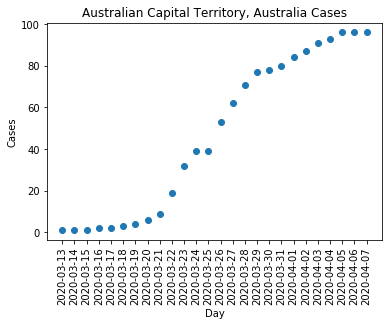

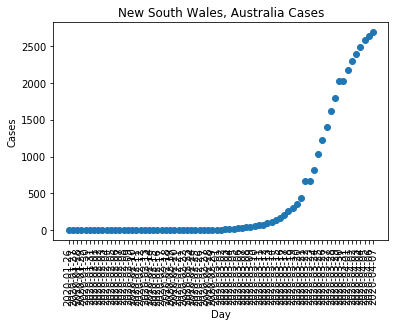

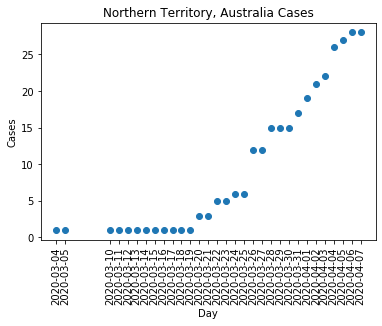

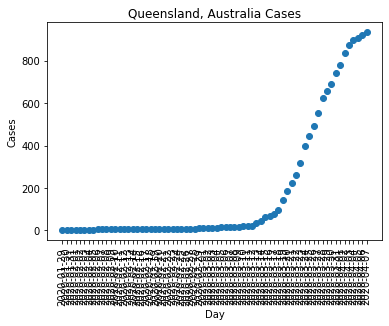

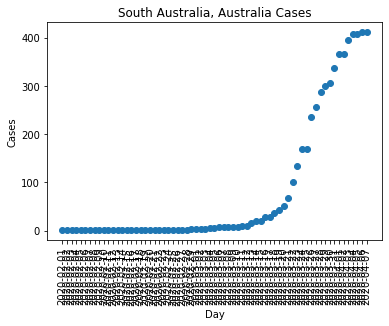

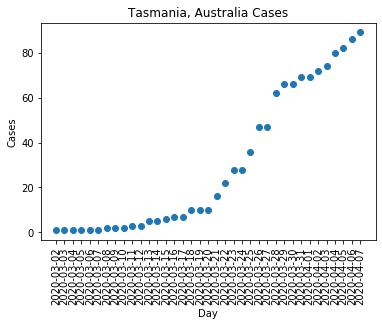

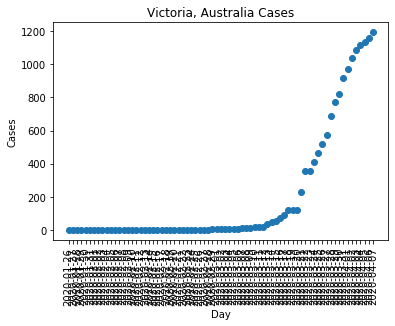

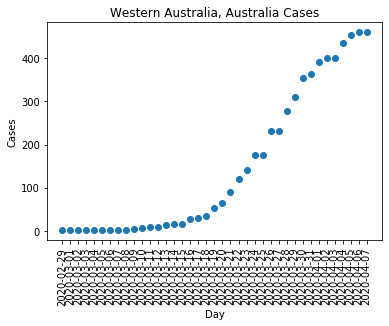

In [41]:
def provinces(dataset,country):
    import matplotlib.pyplot as plt
    for i,j in dataset:
        province = i
        data = dataset.get_group(province)
        data_start_pandemic = data[data['ConfirmedCases']>0]

        plt.plot_date(data_start_pandemic['Date'],data_start_pandemic['ConfirmedCases'])
        plt.xlabel('Day')
        plt.xticks(data_start_pandemic['Date'], rotation='vertical')
        plt.ylabel('Cases')
        plt.title(province + ', ' + str(country) + ' Cases')
        plt.show()
        
provinces(train_country_AUS_province,'Australia')

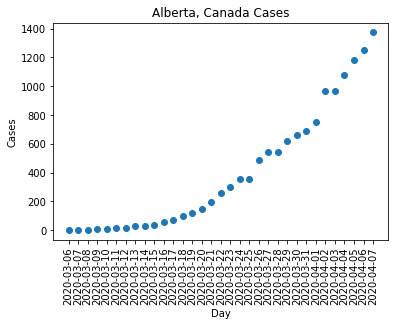

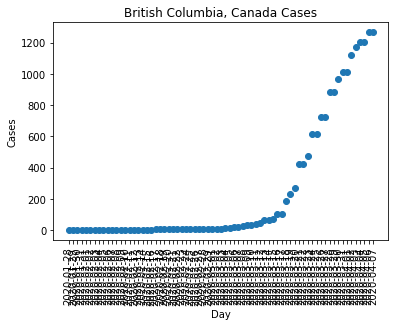

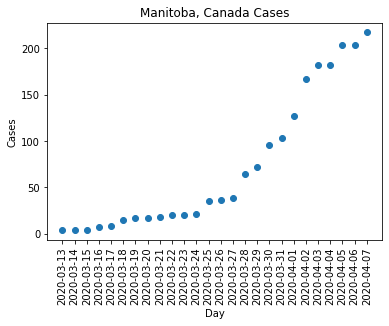

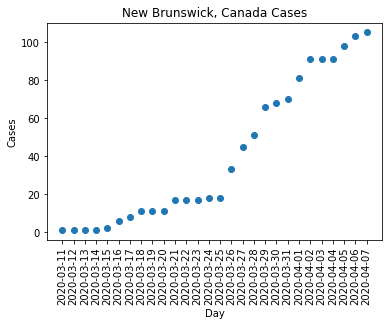

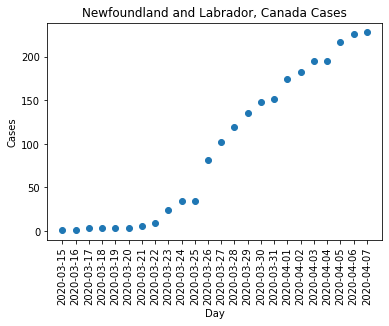

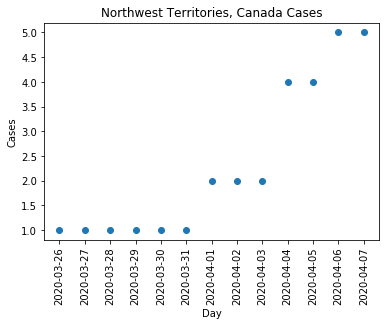

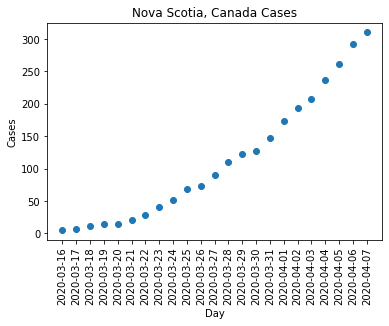

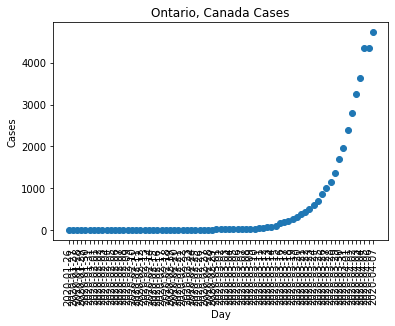

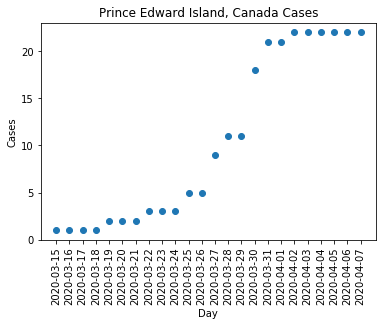

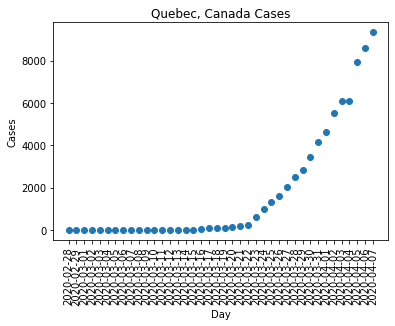

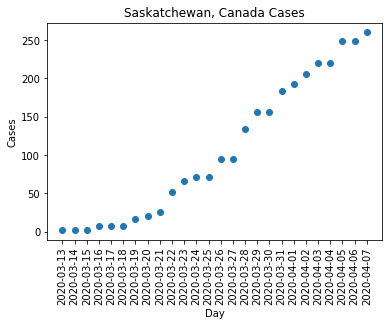

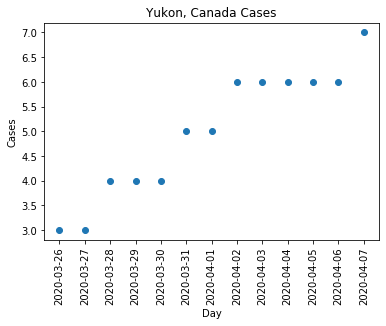

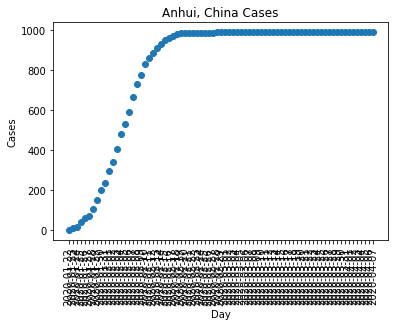

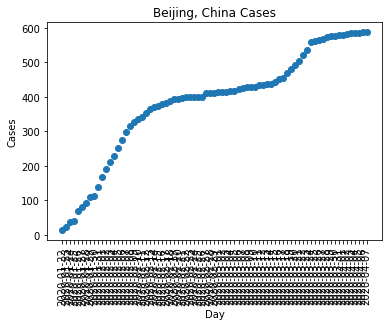

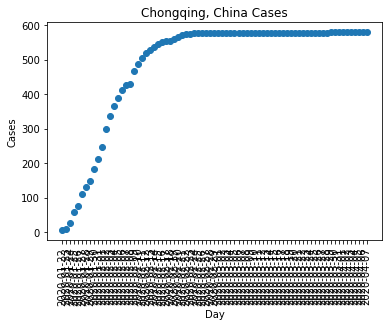

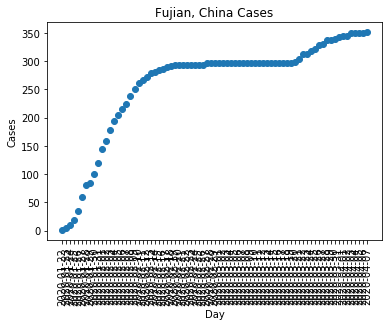

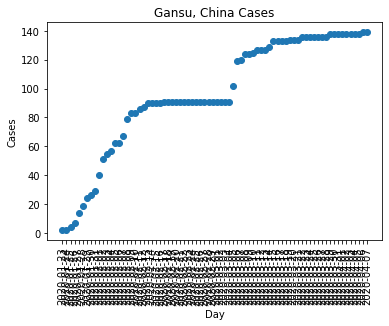

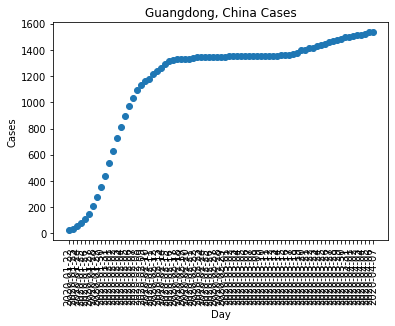

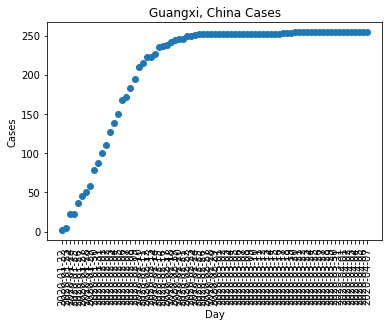

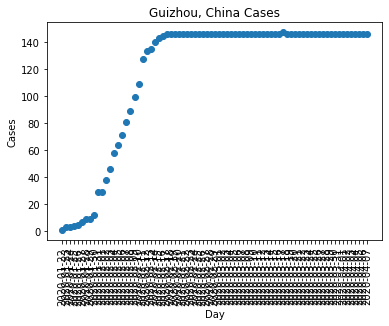

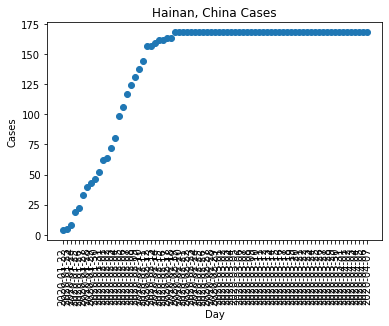

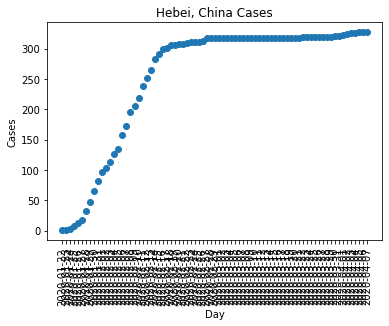

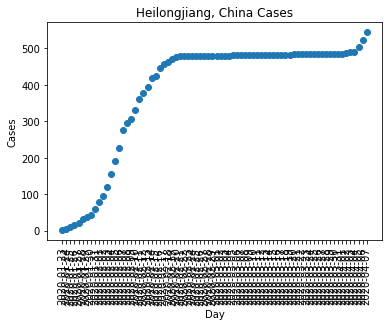

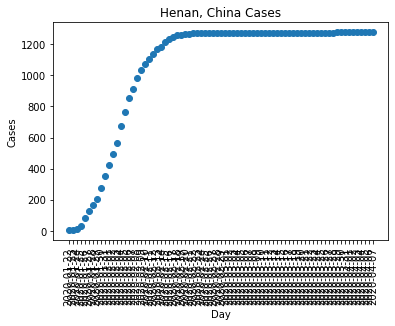

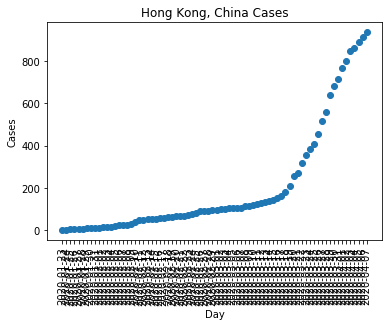

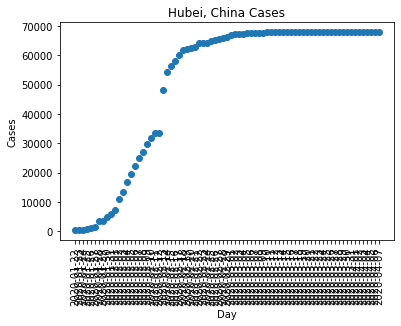

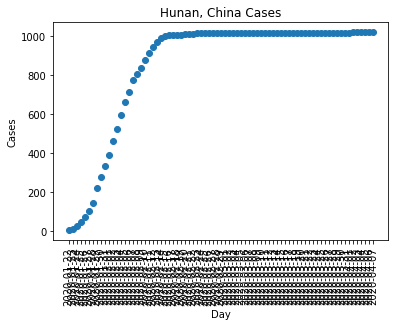

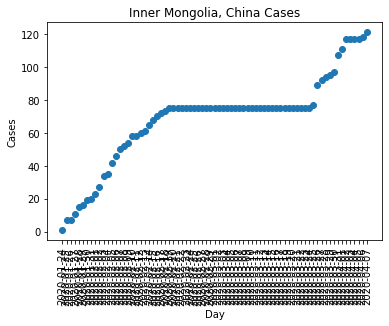

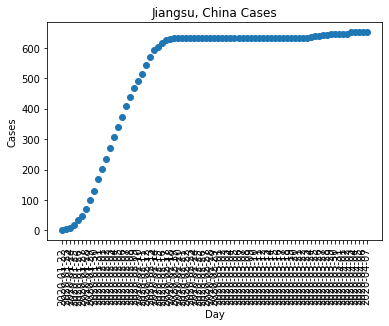

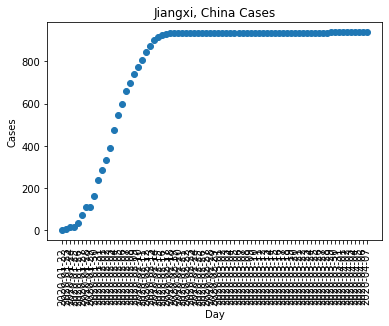

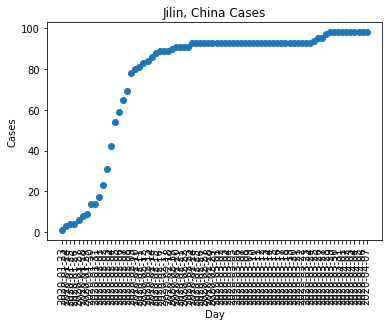

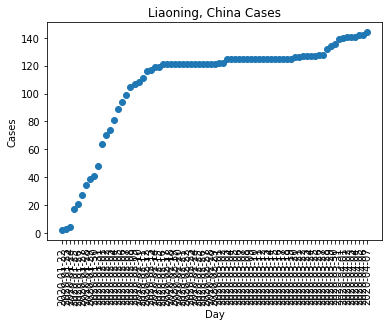

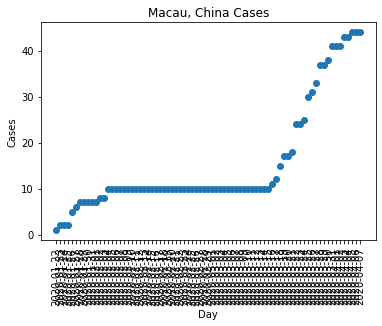

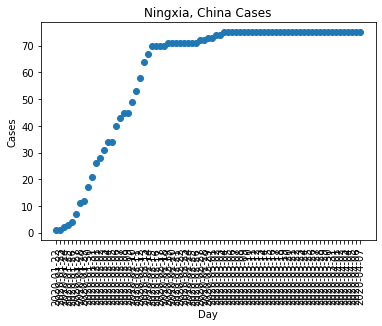

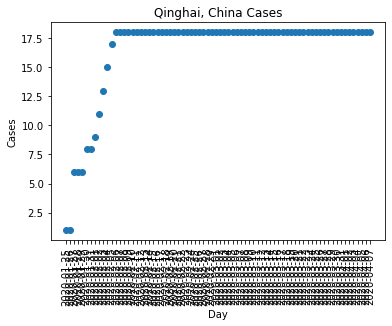

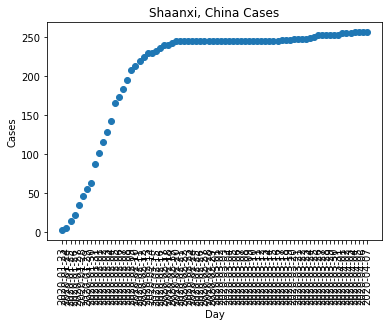

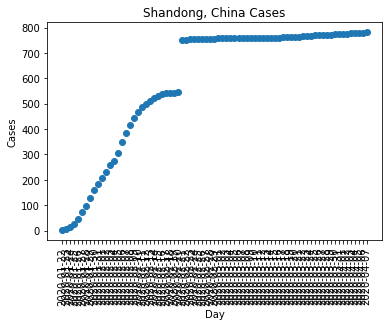

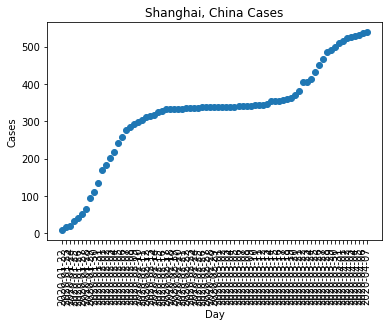

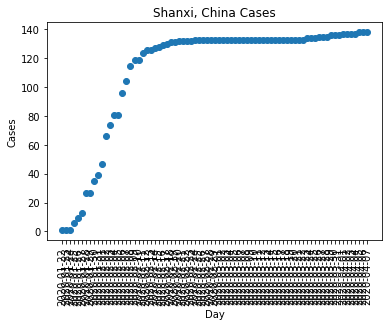

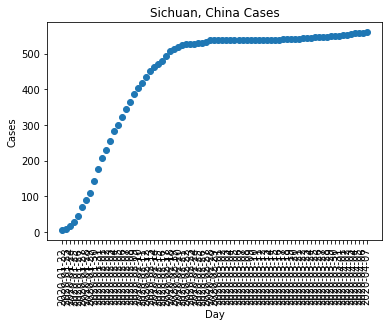

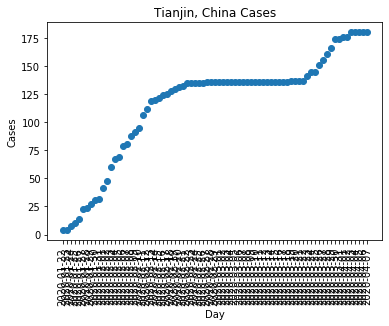

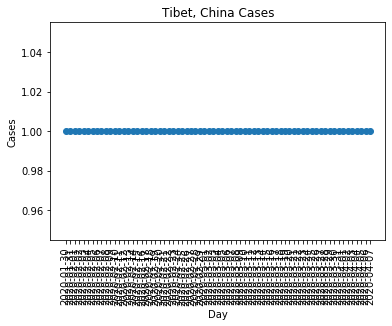

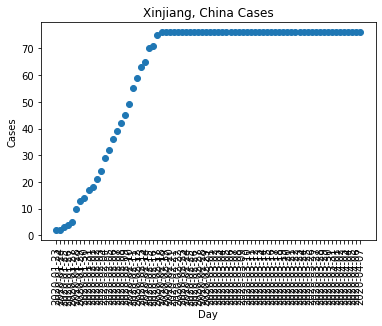

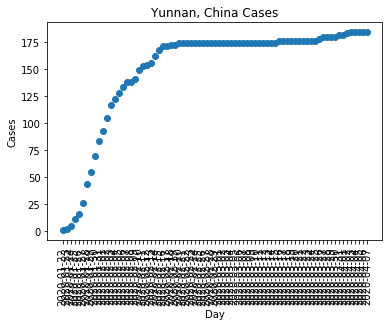

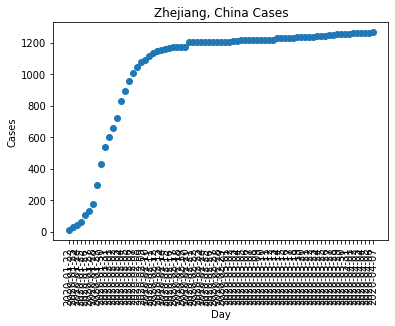

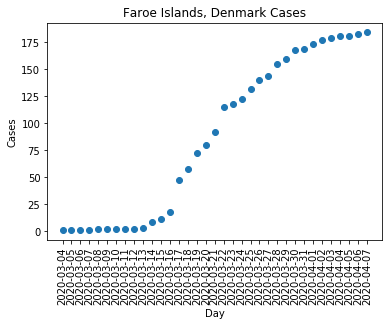

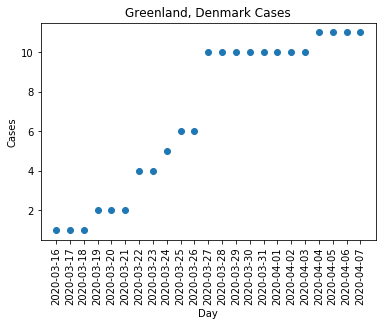

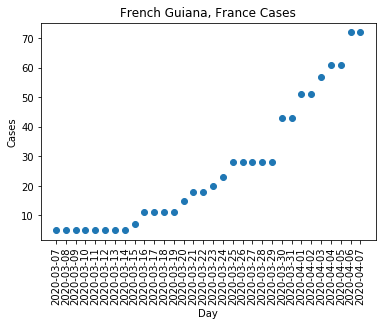

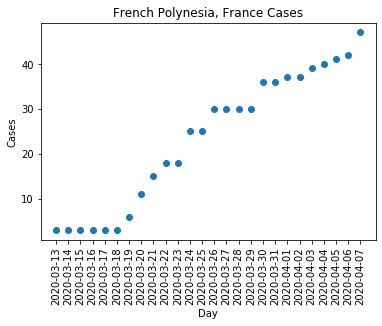

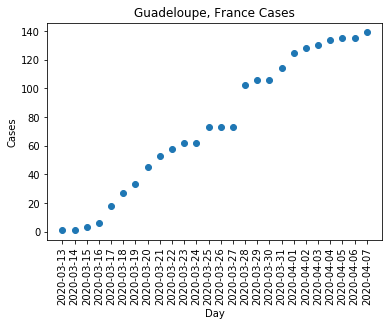

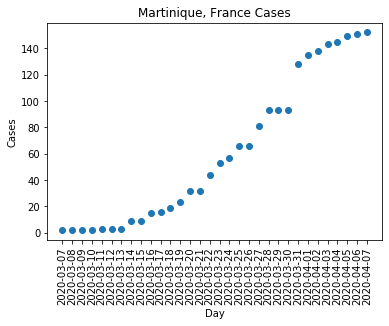

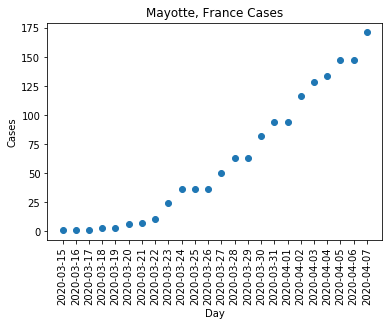

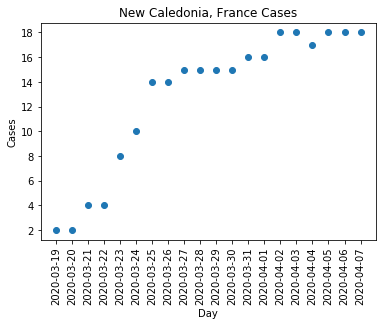

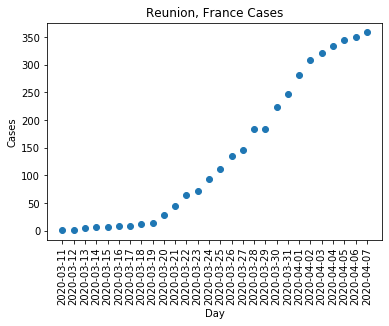

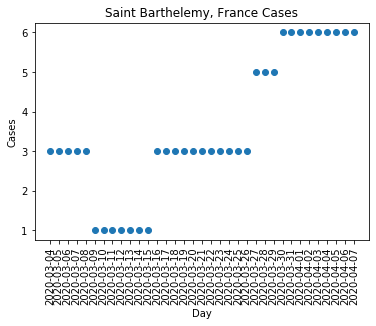

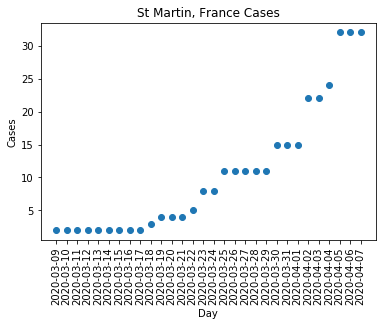

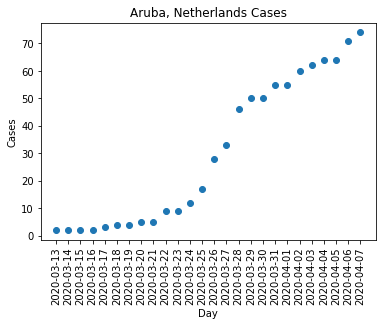

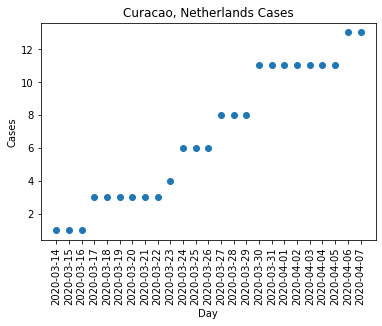

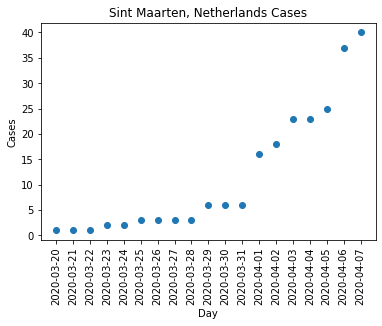

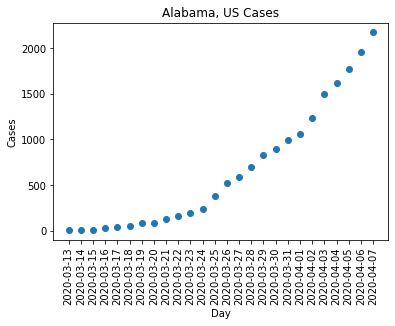

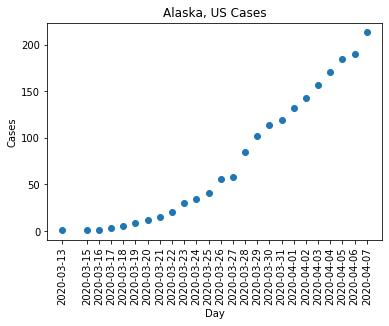

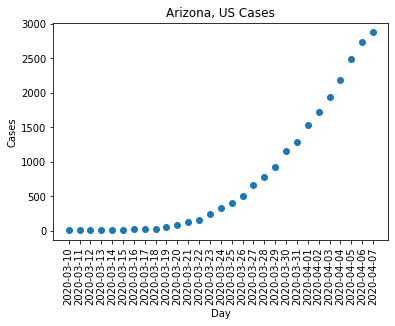

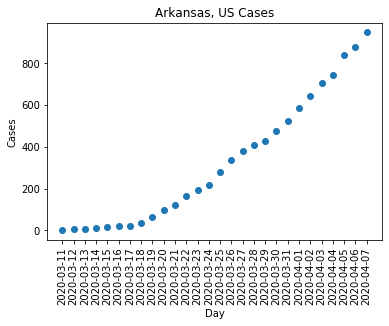

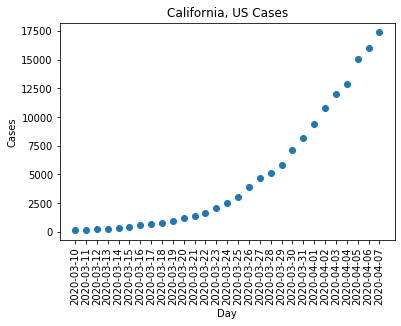

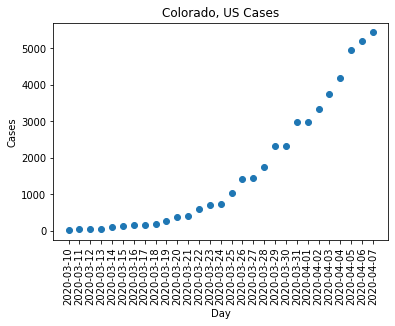

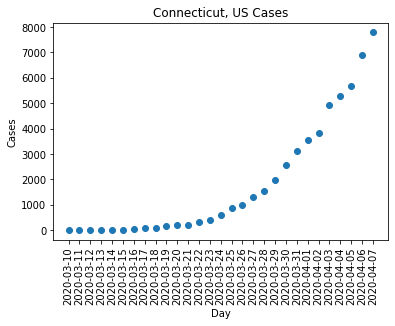

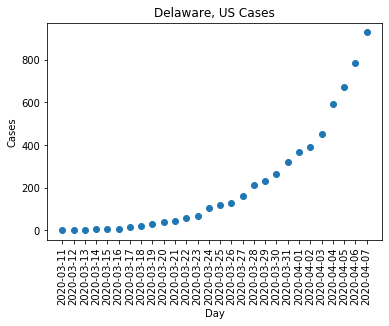

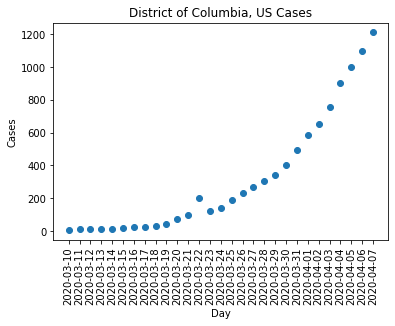

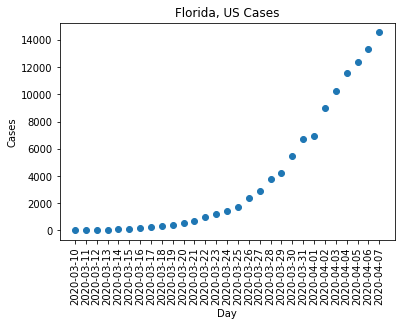

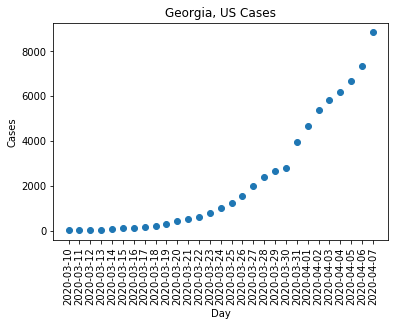

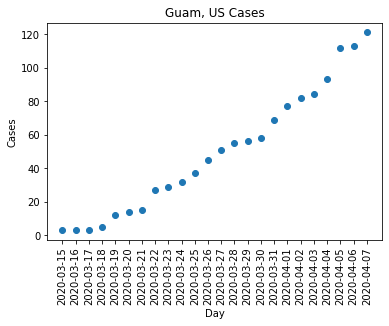

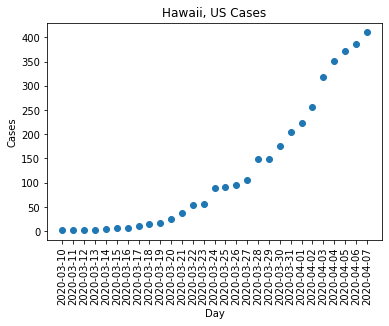

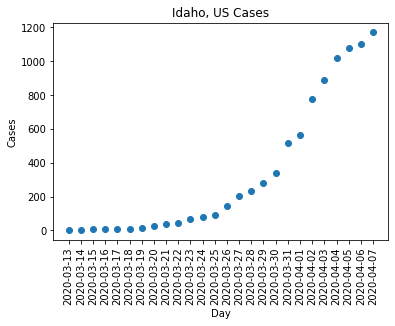

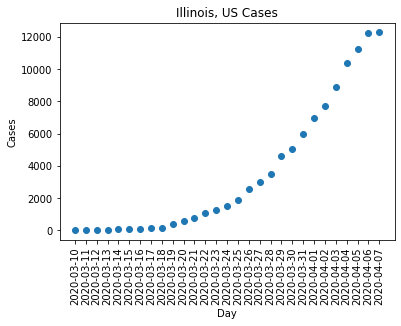

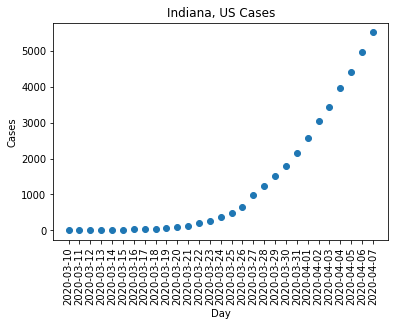

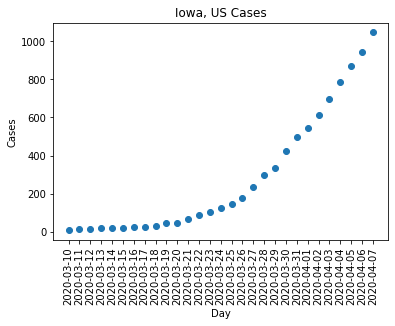

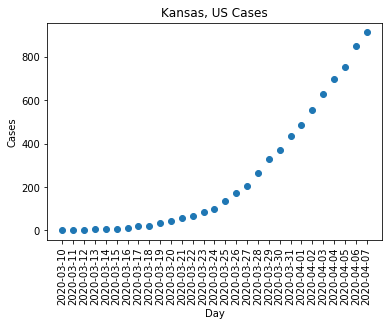

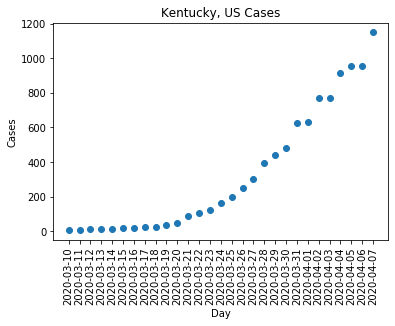

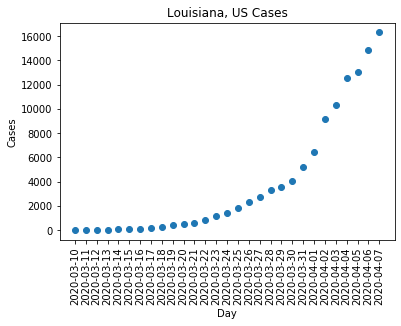

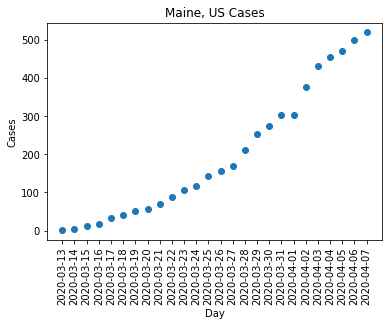

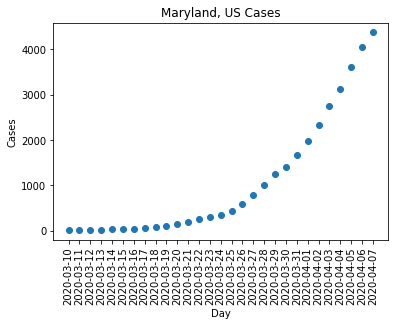

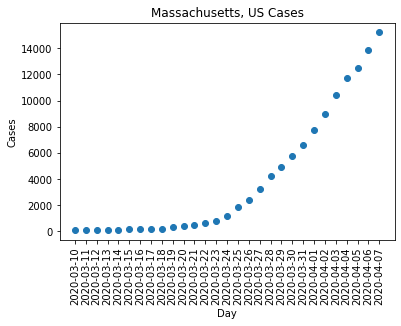

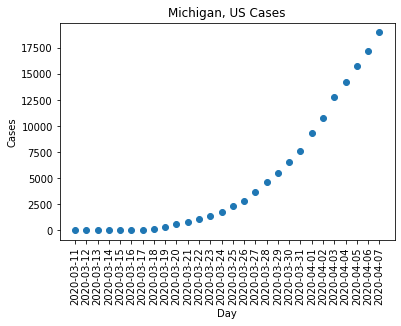

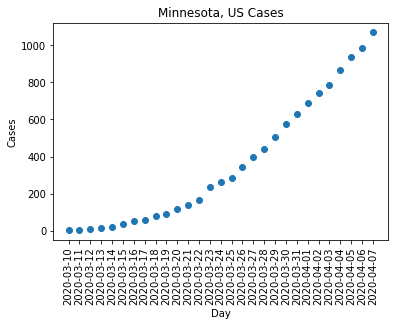

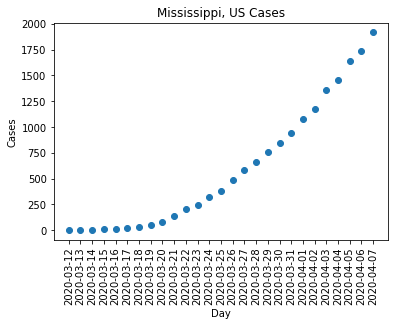

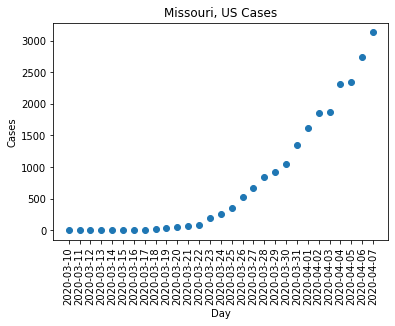

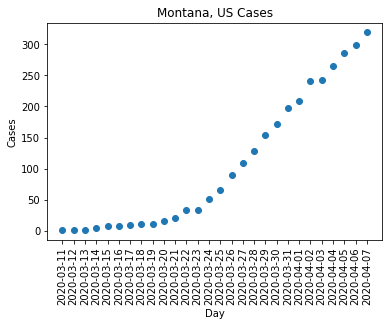

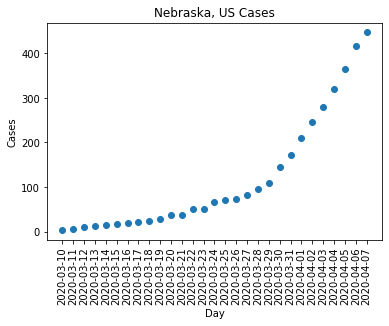

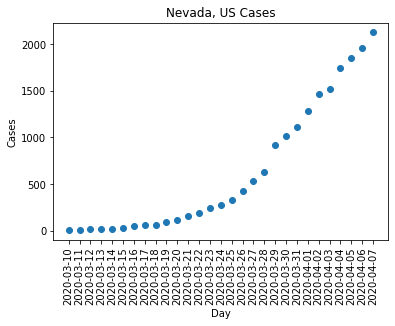

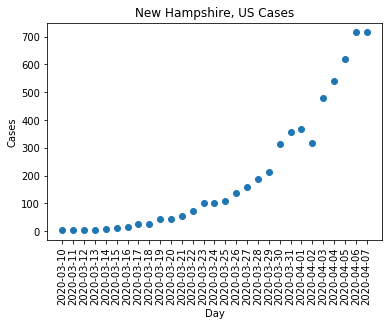

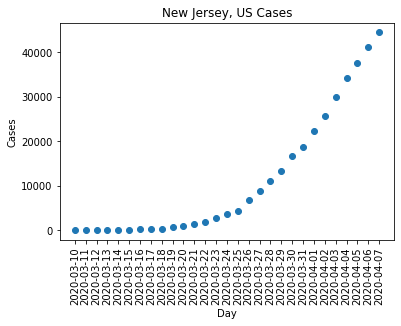

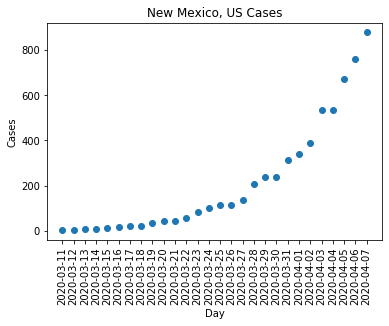

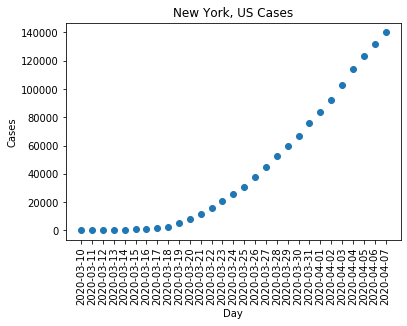

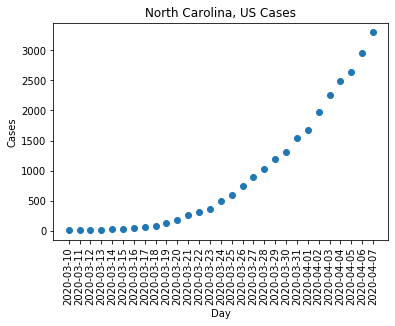

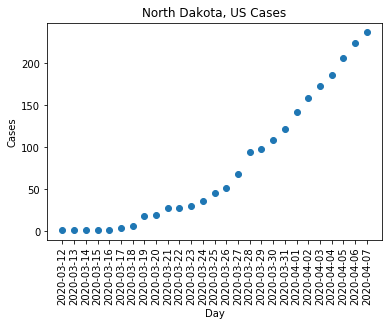

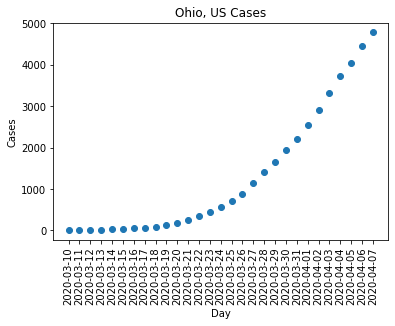

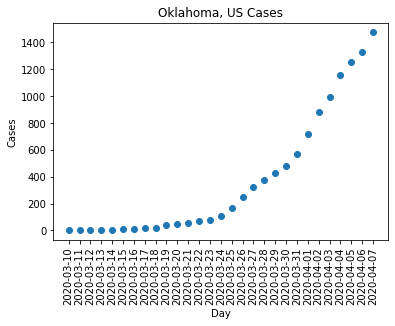

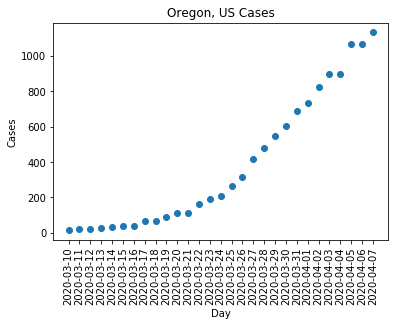

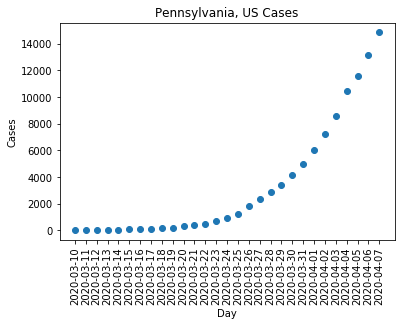

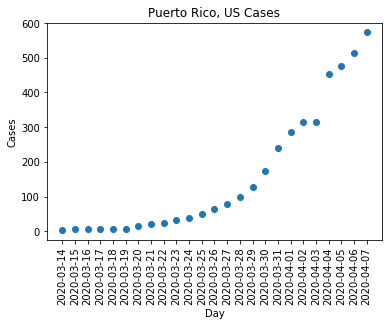

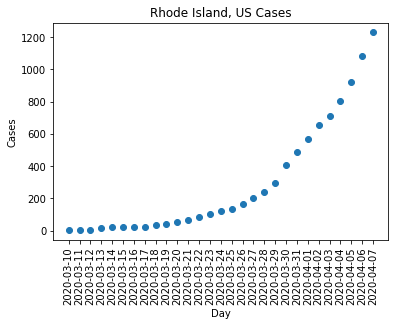

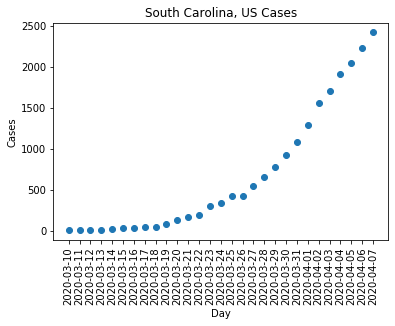

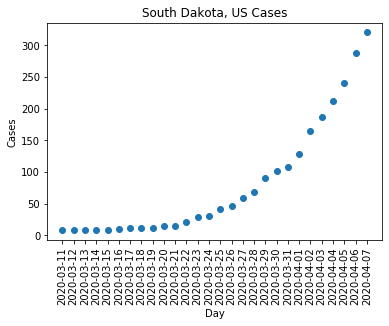

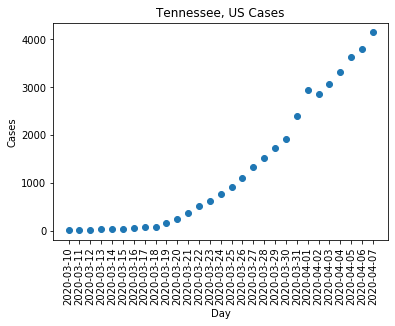

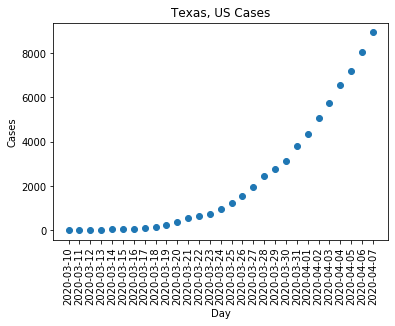

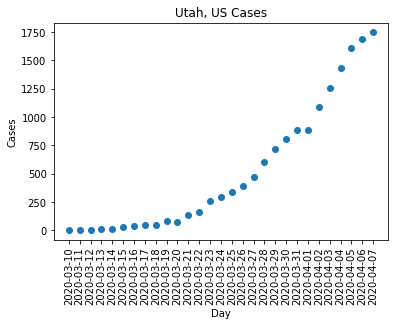

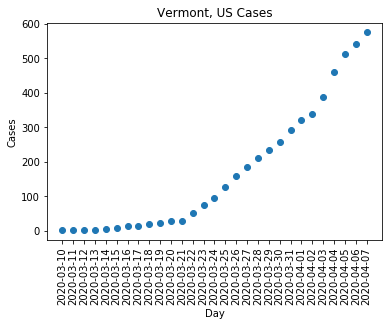

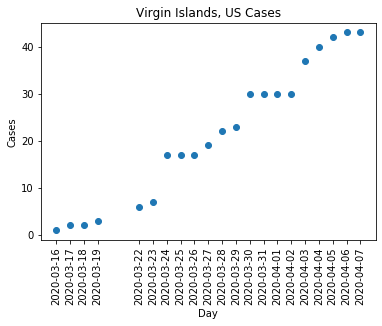

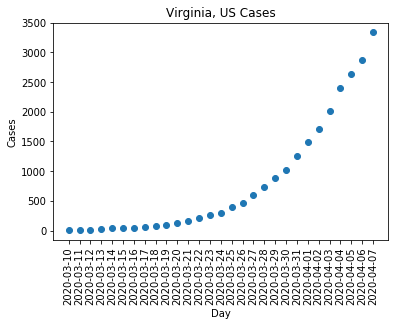

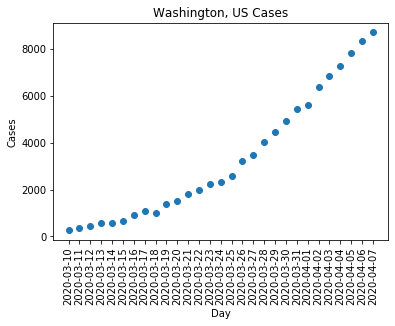

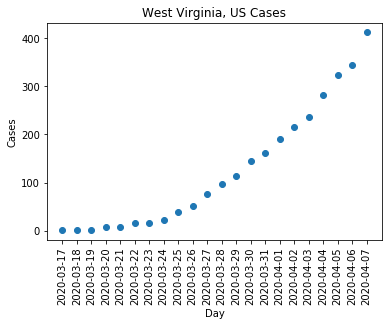

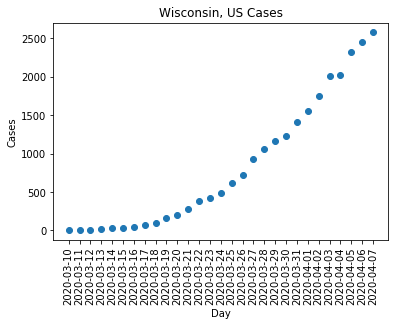

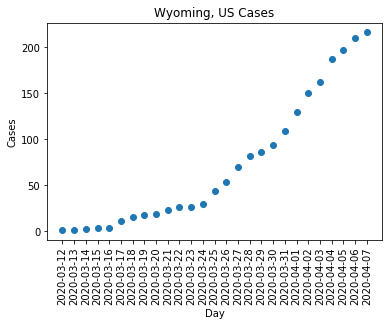

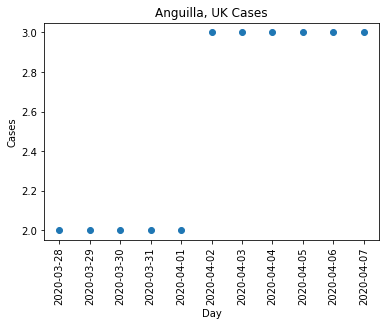

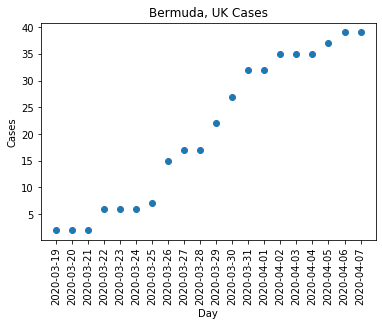

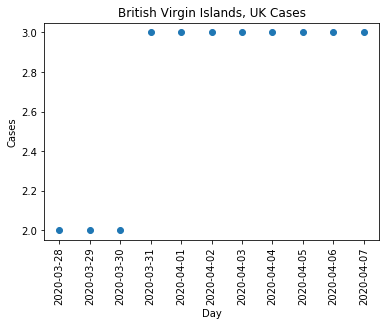

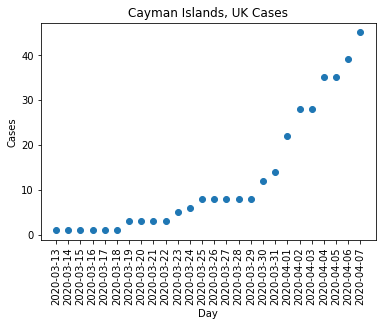

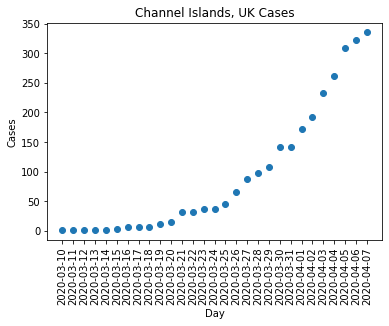

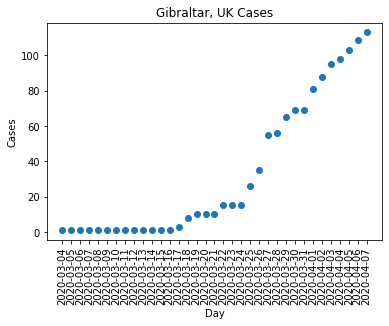

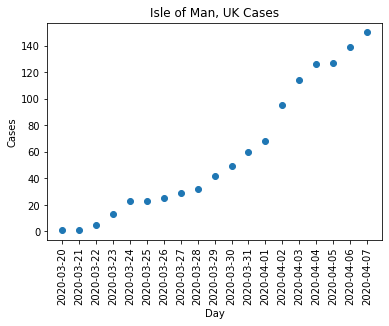

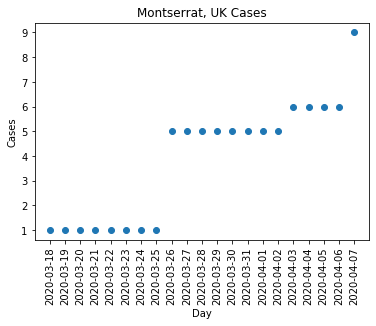

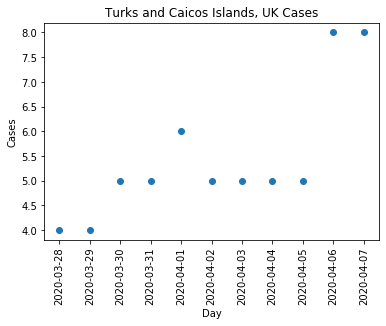

In [42]:
provinces(train_country_CAN_province,'Canada')
provinces(train_country_China_province,'China')
provinces(train_country_DEN_province,'Denmark')
provinces(train_country_FRA_province,'France')
provinces(train_country_NED_province,'Netherlands')
provinces(train_country_US_province,'US')
provinces(train_country_UK_province,'UK')

In [43]:
def dataset_by_country_province(dataset,country):
    data_country_province_pandemic = pd.DataFrame()
    for i,j in dataset:
        data = dataset.get_group(i)
        data_start_pandemic = data[data['ConfirmedCases']>0]
        data_country_province_pandemic[i] = [len(dataset.get_group(i)), len(str(data_start_pandemic['Date'].head(1))), data['Date'][data_start_pandemic['Date'].head(1).index[0]]]
        # i : Country
    data_info = data_country_province_pandemic.transpose()
    data_info.columns = ['Case Number','Pandemic Cases','Date']
    data_info['Country'] = [country for i in range(len(data_info))]
    return data_info


In [44]:
df1 = dataset_by_country_province(train_country_AUS_province,'Australia')
df2 = dataset_by_country_province(train_country_NED_province,'Netherlands')
df3 = dataset_by_country_province(train_country_UK_province, 'UK')
df4 = dataset_by_country_province(train_country_CAN_province,'Canada')
df5 = dataset_by_country_province(train_country_China_province,'China')
df6 = dataset_by_country_province(train_country_DEN_province,'Denmark')
df7 = dataset_by_country_province(train_country_FRA_province,'France')
df8 = dataset_by_country_province(train_country_US_province,'US')

In [45]:
df1.append([df2,df3,df4,df5,df6,df7,df8])

Case Number Pandemic Cases       Date    Country
Australian Capital Territory          77             50 2020-03-13  Australia
New South Wales                       77             50 2020-01-26  Australia
Northern Territory                    77             50 2020-03-04  Australia
Queensland                            77             50 2020-01-29  Australia
South Australia                       77             50 2020-02-01  Australia
...                                  ...            ...        ...        ...
Virginia                              77             52 2020-03-10         US
Washington                            77             52 2020-03-10         US
West Virginia                         77             52 2020-03-17         US
Wisconsin                             77             52 2020-03-10         US
Wyoming                               77             52 2020-03-12         US

[130 rows x 4 columns]

In [46]:
train_country.get_group('China').to_csv('test_data.csv')